In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Srikakulam']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
3041,3044,18.40,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,6.12,0.77,0.96,...,1.30,53.30,5.31,44.57,0.033310,0.031792,0.243958,0.102674,-0.048830,Paddy/G.gram
3042,3045,18.40,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,7.55,0.15,0.53,...,0.67,60.11,3.33,16.73,0.033310,0.031792,0.243958,0.102674,-0.048830,Paddy/G.gram
3043,3046,18.39,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,6.85,4.60,0.57,...,2.19,23.86,2.98,25.16,0.029043,0.032842,0.408615,0.098536,-0.046955,Paddy/G.gram
3044,3047,18.40,84.11,Srikakulam,Polaki,Ambeerupeta,Black soil,8.25,1.46,0.57,...,1.30,9.95,2.21,7.01,0.033558,0.018142,0.197793,0.104857,-0.049817,Paddy/G.gram
3045,3048,18.39,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,6.70,0.69,0.63,...,0.55,70.84,3.23,20.62,0.029043,0.032842,0.408615,0.098536,-0.046955,Paddy/G.gram


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'NDVI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,6.961472,0.413271,0.463808,14.602640,152.665888,1030.453271,356.135514,32.028154,1.252827,0.981846,54.822523,2.310654,26.856519,0.445997
std,1.173631,0.731511,0.252160,23.214154,172.273904,713.591398,281.083851,72.268100,1.357158,0.624377,57.255940,1.509037,21.778706,0.681315
min,4.740000,0.020000,0.060000,0.450000,16.000000,46.000000,4.000000,0.100000,0.100000,0.100000,2.580000,0.110000,1.650000,0.005616
25%,5.942500,0.130000,0.277500,4.760000,67.000000,617.000000,167.250000,6.220000,0.600000,0.527500,9.942500,1.180000,12.920000,0.096167
50%,6.965000,0.210000,0.420000,9.935000,107.500000,892.500000,283.000000,11.345000,0.900000,0.840000,33.730000,1.970000,20.060000,0.125425
75%,8.080000,0.392500,0.602500,17.795000,178.250000,1192.000000,456.250000,21.610000,1.500000,1.322500,84.330000,3.132500,33.885000,0.440000
max,9.040000,9.250000,2.260000,361.940000,2009.000000,5411.000000,1956.000000,648.540000,21.140000,3.660000,346.180000,9.520000,207.680000,4.043696


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black soil', 'Red soil', 'Sandy loam', 'Saline soil', 'red soil',
       'red sandy', 'black soil', 'sandy loam', 'res soil', 'Red Soil',
       'Redsoil', 'Red sandy', 'Saline Soil'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black soil', 'black soil'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Red soil', 'red soil', 'res soil', 'Redsoil'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy loam', 'sandy loam'], 'Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Saline soil', 'Saline Soil')
df['SoilType'] = df['SoilType'].replace(['Red sandy', 'red sandy'], 'Red Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Sandy Loam Soil', 'Saline Soil',
       'Red Sandy Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 279,
 'Black Soil': 79,
 'Sandy Loam Soil': 58,
 'Saline Soil': 10,
 'Red Sandy Soil': 2}

<BarContainer object of 5 artists>

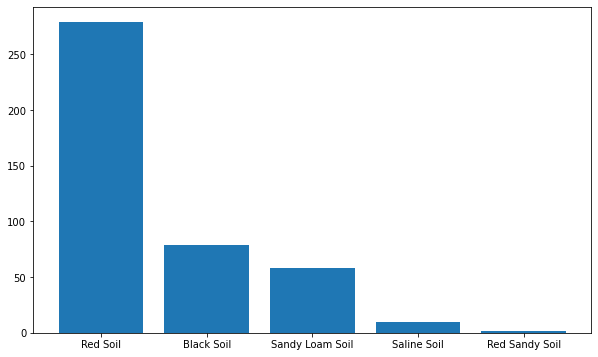

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy/G.gram', 'Cashew', 'Banana', 'banana/coconut',
       'Maize/paddy', 'coconut', 'Coconut', 'coconut/banana',
       'Paddy/Maize', 'Banana/coconut', 'cashew', 'Chilli Papaya',
       'Maize', 'banana', 'maize', 'paddy', 'Paddy Maize', 'Maize/Horti',
       'Cotton/Maize', 'paddy  ', 'Paddy', 'Paddy Sugercane',
       'Paddy/Ragi', 'Paddy/G.nut'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy/G.gram       177
Paddy               50
Maize               38
Coconut             35
banana/coconut      34
Cashew              20
Banana/coconut      17
Banana              11
Maize/paddy          7
paddy                7
Paddy/G.nut          5
maize                5
Paddy Maize          4
Paddy/Ragi           3
banana               3
Cotton/Maize         3
Paddy/Maize          2
coconut              1
coconut/banana       1
Paddy Sugercane      1
cashew               1
Maize/Horti          1
paddy                1
Chilli Papaya        1
Name: Crop, dtype: int64

Paddy + GreenGram    177
Paddy                 67
Banana + Coconut      52
Maize                 47
Coconut               36
Cashew                21
Name: Crop, dtype: int64


<BarContainer object of 6 artists>

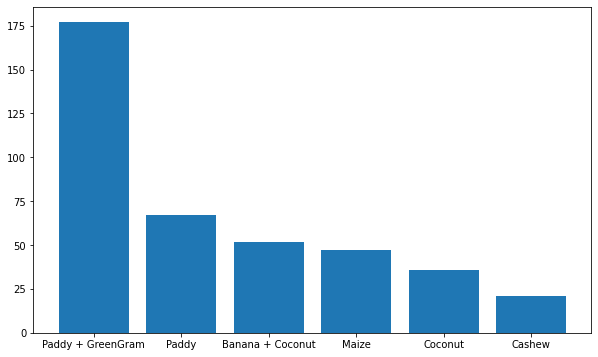

In [15]:
df['Crop'] = df['Crop'].replace(['Paddy/G.nut', 'Paddy/Ragi', 'Paddy Sugercane', 'paddy', 'paddy  '], 'Paddy')
df['Crop'] = df['Crop'].replace('Paddy/G.gram', 'Paddy + GreenGram')
df['Crop'] = df['Crop'].replace('cashew', 'Cashew')
df['Crop'] = df['Crop'].replace(['Maize/Horti', 'Cotton/Maize', 'maize'], 'Maize')
df['Crop'] = df['Crop'].replace(['Maize/paddy', 'Paddy/Maize', 'Paddy Maize'], 'Maize + Paddy')
df['Crop'] = df['Crop'].replace('banana', 'Banana')
df['Crop'] = df['Crop'].replace(['banana/coconut', 'coconut/banana', 'Banana/coconut'], 'Banana + Coconut')
df['Crop'] = df['Crop'].replace(['coconut', 'Coconut'], 'Coconut')
df = df[(df['Crop'] != 'Chilli Papaya') & (df['Crop'] != ' ') & (df['Crop'] != 'Banana') & (df['Crop'] != 'Maize + Paddy')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
pH,1.000000,0.036144,-0.173142,0.147631,0.212099,0.088177,0.248197,0.004609,0.056296,0.388219,-0.699983,-0.374378,-0.355627,0.094017
EC,0.036144,1.000000,0.294264,0.103024,0.281155,0.277983,0.345899,0.760315,0.079011,0.392242,-0.047530,0.174227,-0.070442,-0.111365
OC,-0.173142,0.294264,1.000000,0.428003,0.485155,0.535371,0.427264,0.247478,0.505206,0.471484,0.384226,0.686953,0.236073,0.073933
P,0.147631,0.103024,0.428003,1.000000,0.646969,0.158760,0.049023,0.068294,0.582799,0.225287,0.003291,0.053457,-0.047088,0.180154
K,0.212099,0.281155,0.485155,0.646969,1.000000,0.335424,0.288572,0.191091,0.403726,0.426516,-0.102368,0.157180,-0.012947,0.126970
Ca,0.088177,0.277983,0.535371,0.158760,0.335424,1.000000,0.853234,0.200946,0.197035,0.357904,0.143338,0.598291,0.133805,-0.044073
Mg,0.248197,0.345899,0.427264,0.049023,0.288572,0.853234,1.000000,0.227618,0.053939,0.596317,-0.014557,0.511157,0.027572,-0.025233
S,0.004609,0.760315,0.247478,0.068294,0.191091,0.200946,0.227618,1.000000,0.034358,0.418827,0.036341,0.165831,-0.080504,-0.122712
Zn,0.056296,0.079011,0.505206,0.582799,0.403726,0.197035,0.053939,0.034358,1.000000,0.136258,0.099621,0.169182,0.158456,0.281007
B,0.388219,0.392242,0.471484,0.225287,0.426516,0.357904,0.596317,0.418827,0.136258,1.000000,-0.146109,0.348940,-0.120227,0.062517


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)


Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Cu']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'Fe', 'Mn', 'GCI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Fe     Mn       GCI  Black Soil  \
3041  6.12  0.77  0.96  5.62  53.3  44.57  0.102674           1   

      Red Sandy Soil  Red Soil  Saline Soil  Sandy Loam Soil  
3041               0         0            0                0  
3041    Paddy + GreenGram
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:7] = sc1.fit_transform(X[:, 0:7])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.66


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 70.67 %
Standard Deviation: 5.73 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state = 0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 68.00 %
Standard Deviation: 7.33 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state = 0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.78


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.33 %
Standard Deviation: 5.54 %


In [36]:
pickle.dump(clf3, open('Srikakulam_model.pkl', 'wb'))
pickle.dump(sc1, open('Srikakulam_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state = 0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.00 %
Standard Deviation: 6.63 %


# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.81
Testing Accuracy:  0.76


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 71.67 %
Standard Deviation: 5.82 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.1351727	total: 151ms	remaining: 15s
1:	learn: 0.9779805	total: 152ms	remaining: 7.46s
2:	learn: 0.9088849	total: 153ms	remaining: 4.96s
3:	learn: 0.8336807	total: 154ms	remaining: 3.7s
4:	learn: 0.7586990	total: 155ms	remaining: 2.94s
5:	learn: 0.7375650	total: 156ms	remaining: 2.44s
6:	learn: 0.7259255	total: 156ms	remaining: 2.08s
7:	learn: 0.7052856	total: 157ms	remaining: 1.81s
8:	learn: 0.6941061	total: 158ms	remaining: 1.6s
9:	learn: 0.6639966	total: 159ms	remaining: 1.43s
10:	learn: 0.6430491	total: 159ms	remaining: 1.29s
11:	learn: 0.6394773	total: 160ms	remaining: 1.17s
12:	learn: 0.6315062	total: 161ms	remaining: 1.07s
13:	learn: 0.6197890	total: 161ms	remaining: 991ms
14:	learn: 0.6151624	total: 162ms	remaining: 919ms
15:	learn: 0.5975376	total: 163ms	remaining: 855ms
16:	learn: 0.5737324	total: 164ms	remaining: 799ms
17:	learn: 0.5513652	total: 164ms	remaining: 748ms
18:	learn: 0.5374565	total: 165ms	remaining: 703ms
19:	learn: 0.5230038	total: 166ms	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.983633048
bestIteration = 99

Training on fold [1/5]

bestTest = 0.9195610712
bestIteration = 99

Training on fold [2/5]

bestTest = 0.928573975
bestIteration = 99

Training on fold [3/5]

bestTest = 0.9730027314
bestIteration = 99

Training on fold [4/5]

bestTest = 0.954905491
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.7499581	test: 1.7475809	best: 1.7475809 (0)	total: 2.03ms	remaining: 2.03s
1:	learn: 1.7170775	test: 1.7126148	best: 1.7126148 (1)	total: 3.76ms	remaining: 1.88s
2:	learn: 1.6788062	test: 1.6667170	best: 1.6667170 (2)	total: 5.47ms	remaining: 1.82s
3:	learn: 1.6469331	test: 1.6361627	best: 1.6361627 (3)	total: 7.08ms	remaining: 1.76s
4:	learn: 1.6208372	test: 1.6033594	best: 1.6033594 (4)	total: 10.4ms	remaining: 2.06s
5:	learn: 1.5888541	test: 1.5676192	best: 1.5676192 (5)	total: 12.4ms	remaining: 2.06s
6:	learn: 1.5673845	test: 1.5426748	best: 1.5426748 (6)	total: 14.3ms	remaining: 2.03s
7:	learn: 1.5426491	test: 1.5133911	best: 1.5133911 (7)	total: 15.9ms	remaining: 1.97s
8:	learn: 1.5178343	test: 1.4893830	best: 1.4893830 (8)	total: 17.6ms	remaining: 1.93s
9:	learn: 1.4914724	test: 1.4604778	best: 1.4604778 (9)	total: 19.3ms	remaining: 1.91s
10:	learn: 1.4700697	test: 1.4374472	best: 1.4374472 (10)	total: 20.9ms	remaining: 1.88s
11:	learn: 1.4475593	test: 1.4125839	best

103:	learn: 0.7605351	test: 0.7583810	best: 0.7583810 (103)	total: 172ms	remaining: 1.49s
104:	learn: 0.7569550	test: 0.7561326	best: 0.7561326 (104)	total: 174ms	remaining: 1.49s
105:	learn: 0.7533279	test: 0.7548979	best: 0.7548979 (105)	total: 176ms	remaining: 1.48s
106:	learn: 0.7494625	test: 0.7516383	best: 0.7516383 (106)	total: 178ms	remaining: 1.48s
107:	learn: 0.7463456	test: 0.7490199	best: 0.7490199 (107)	total: 179ms	remaining: 1.48s
108:	learn: 0.7438560	test: 0.7477424	best: 0.7477424 (108)	total: 181ms	remaining: 1.48s
109:	learn: 0.7412896	test: 0.7465087	best: 0.7465087 (109)	total: 182ms	remaining: 1.48s
110:	learn: 0.7389607	test: 0.7438441	best: 0.7438441 (110)	total: 184ms	remaining: 1.47s
111:	learn: 0.7360359	test: 0.7421210	best: 0.7421210 (111)	total: 187ms	remaining: 1.48s
112:	learn: 0.7345909	test: 0.7412314	best: 0.7412314 (112)	total: 189ms	remaining: 1.48s
113:	learn: 0.7319837	test: 0.7398561	best: 0.7398561 (113)	total: 191ms	remaining: 1.48s
114:	learn

195:	learn: 0.5826084	test: 0.6571537	best: 0.6571537 (195)	total: 334ms	remaining: 1.37s
196:	learn: 0.5814146	test: 0.6563402	best: 0.6563402 (196)	total: 336ms	remaining: 1.37s
197:	learn: 0.5798689	test: 0.6559679	best: 0.6559679 (197)	total: 338ms	remaining: 1.37s
198:	learn: 0.5788711	test: 0.6555422	best: 0.6555422 (198)	total: 339ms	remaining: 1.36s
199:	learn: 0.5772088	test: 0.6545952	best: 0.6545952 (199)	total: 341ms	remaining: 1.36s
200:	learn: 0.5760521	test: 0.6540087	best: 0.6540087 (200)	total: 342ms	remaining: 1.36s
201:	learn: 0.5744815	test: 0.6537214	best: 0.6537214 (201)	total: 344ms	remaining: 1.36s
202:	learn: 0.5730337	test: 0.6536944	best: 0.6536944 (202)	total: 345ms	remaining: 1.36s
203:	learn: 0.5712511	test: 0.6526679	best: 0.6526679 (203)	total: 347ms	remaining: 1.35s
204:	learn: 0.5698784	test: 0.6521958	best: 0.6521958 (204)	total: 350ms	remaining: 1.35s
205:	learn: 0.5693285	test: 0.6522705	best: 0.6521958 (204)	total: 351ms	remaining: 1.35s
206:	learn

301:	learn: 0.4552271	test: 0.6047165	best: 0.6043449 (300)	total: 510ms	remaining: 1.18s
302:	learn: 0.4545310	test: 0.6046669	best: 0.6043449 (300)	total: 511ms	remaining: 1.18s
303:	learn: 0.4537963	test: 0.6041669	best: 0.6041669 (303)	total: 513ms	remaining: 1.17s
304:	learn: 0.4530484	test: 0.6045356	best: 0.6041669 (303)	total: 515ms	remaining: 1.17s
305:	learn: 0.4525163	test: 0.6043696	best: 0.6041669 (303)	total: 516ms	remaining: 1.17s
306:	learn: 0.4511889	test: 0.6048612	best: 0.6041669 (303)	total: 518ms	remaining: 1.17s
307:	learn: 0.4498917	test: 0.6047344	best: 0.6041669 (303)	total: 519ms	remaining: 1.17s
308:	learn: 0.4488915	test: 0.6047712	best: 0.6041669 (303)	total: 521ms	remaining: 1.17s
309:	learn: 0.4479797	test: 0.6041538	best: 0.6041538 (309)	total: 523ms	remaining: 1.16s
310:	learn: 0.4472955	test: 0.6037888	best: 0.6037888 (310)	total: 526ms	remaining: 1.16s
311:	learn: 0.4465771	test: 0.6032440	best: 0.6032440 (311)	total: 529ms	remaining: 1.17s
312:	learn

399:	learn: 0.3800248	test: 0.5885409	best: 0.5884610 (392)	total: 686ms	remaining: 1.03s
400:	learn: 0.3795174	test: 0.5884432	best: 0.5884432 (400)	total: 688ms	remaining: 1.03s
401:	learn: 0.3792544	test: 0.5885995	best: 0.5884432 (400)	total: 690ms	remaining: 1.03s
402:	learn: 0.3784507	test: 0.5885533	best: 0.5884432 (400)	total: 692ms	remaining: 1.02s
403:	learn: 0.3777315	test: 0.5881407	best: 0.5881407 (403)	total: 694ms	remaining: 1.02s
404:	learn: 0.3772252	test: 0.5877675	best: 0.5877675 (404)	total: 695ms	remaining: 1.02s
405:	learn: 0.3767743	test: 0.5874945	best: 0.5874945 (405)	total: 697ms	remaining: 1.02s
406:	learn: 0.3763192	test: 0.5876448	best: 0.5874945 (405)	total: 700ms	remaining: 1.02s
407:	learn: 0.3755696	test: 0.5881971	best: 0.5874945 (405)	total: 702ms	remaining: 1.02s
408:	learn: 0.3746506	test: 0.5882269	best: 0.5874945 (405)	total: 704ms	remaining: 1.02s
409:	learn: 0.3743437	test: 0.5881589	best: 0.5874945 (405)	total: 705ms	remaining: 1.01s
410:	learn

494:	learn: 0.3273634	test: 0.5876307	best: 0.5863591 (439)	total: 860ms	remaining: 878ms
495:	learn: 0.3267859	test: 0.5878050	best: 0.5863591 (439)	total: 862ms	remaining: 876ms
496:	learn: 0.3265311	test: 0.5873576	best: 0.5863591 (439)	total: 864ms	remaining: 874ms
497:	learn: 0.3257714	test: 0.5871910	best: 0.5863591 (439)	total: 866ms	remaining: 873ms
498:	learn: 0.3249707	test: 0.5866812	best: 0.5863591 (439)	total: 867ms	remaining: 871ms
499:	learn: 0.3245483	test: 0.5865382	best: 0.5863591 (439)	total: 869ms	remaining: 869ms
500:	learn: 0.3238656	test: 0.5864815	best: 0.5863591 (439)	total: 871ms	remaining: 868ms
501:	learn: 0.3230499	test: 0.5856312	best: 0.5856312 (501)	total: 873ms	remaining: 866ms
502:	learn: 0.3226371	test: 0.5857820	best: 0.5856312 (501)	total: 875ms	remaining: 865ms
503:	learn: 0.3222463	test: 0.5860033	best: 0.5856312 (501)	total: 877ms	remaining: 863ms
504:	learn: 0.3217732	test: 0.5856228	best: 0.5856228 (504)	total: 879ms	remaining: 861ms
505:	learn

597:	learn: 0.2841762	test: 0.5772228	best: 0.5772228 (597)	total: 1.03s	remaining: 696ms
598:	learn: 0.2838958	test: 0.5769879	best: 0.5769879 (598)	total: 1.04s	remaining: 695ms
599:	learn: 0.2837683	test: 0.5771788	best: 0.5769879 (598)	total: 1.04s	remaining: 693ms
600:	learn: 0.2832998	test: 0.5771027	best: 0.5769879 (598)	total: 1.04s	remaining: 691ms
601:	learn: 0.2830573	test: 0.5772706	best: 0.5769879 (598)	total: 1.04s	remaining: 690ms
602:	learn: 0.2826473	test: 0.5771210	best: 0.5769879 (598)	total: 1.04s	remaining: 688ms
603:	learn: 0.2821464	test: 0.5767475	best: 0.5767475 (603)	total: 1.05s	remaining: 686ms
604:	learn: 0.2818747	test: 0.5767703	best: 0.5767475 (603)	total: 1.05s	remaining: 684ms
605:	learn: 0.2816727	test: 0.5769533	best: 0.5767475 (603)	total: 1.05s	remaining: 683ms
606:	learn: 0.2811887	test: 0.5770300	best: 0.5767475 (603)	total: 1.05s	remaining: 681ms
607:	learn: 0.2807065	test: 0.5768697	best: 0.5767475 (603)	total: 1.05s	remaining: 680ms
608:	learn

698:	learn: 0.2488021	test: 0.5723127	best: 0.5718751 (697)	total: 1.21s	remaining: 521ms
699:	learn: 0.2485707	test: 0.5723261	best: 0.5718751 (697)	total: 1.21s	remaining: 520ms
700:	learn: 0.2483284	test: 0.5725922	best: 0.5718751 (697)	total: 1.21s	remaining: 518ms
701:	learn: 0.2481093	test: 0.5724584	best: 0.5718751 (697)	total: 1.22s	remaining: 516ms
702:	learn: 0.2479174	test: 0.5723655	best: 0.5718751 (697)	total: 1.22s	remaining: 515ms
703:	learn: 0.2475398	test: 0.5726090	best: 0.5718751 (697)	total: 1.22s	remaining: 513ms
704:	learn: 0.2472334	test: 0.5726431	best: 0.5718751 (697)	total: 1.22s	remaining: 511ms
705:	learn: 0.2467353	test: 0.5730186	best: 0.5718751 (697)	total: 1.22s	remaining: 509ms
706:	learn: 0.2463584	test: 0.5731627	best: 0.5718751 (697)	total: 1.22s	remaining: 508ms
707:	learn: 0.2460665	test: 0.5731860	best: 0.5718751 (697)	total: 1.23s	remaining: 506ms
708:	learn: 0.2455556	test: 0.5727721	best: 0.5718751 (697)	total: 1.23s	remaining: 504ms
709:	learn

790:	learn: 0.2227053	test: 0.5726681	best: 0.5718032 (779)	total: 1.39s	remaining: 367ms
791:	learn: 0.2224943	test: 0.5724289	best: 0.5718032 (779)	total: 1.39s	remaining: 365ms
792:	learn: 0.2223879	test: 0.5725534	best: 0.5718032 (779)	total: 1.39s	remaining: 363ms
793:	learn: 0.2219842	test: 0.5725428	best: 0.5718032 (779)	total: 1.39s	remaining: 361ms
794:	learn: 0.2218412	test: 0.5725967	best: 0.5718032 (779)	total: 1.39s	remaining: 360ms
795:	learn: 0.2214974	test: 0.5722454	best: 0.5718032 (779)	total: 1.4s	remaining: 358ms
796:	learn: 0.2213931	test: 0.5724468	best: 0.5718032 (779)	total: 1.4s	remaining: 356ms
797:	learn: 0.2208694	test: 0.5732523	best: 0.5718032 (779)	total: 1.4s	remaining: 355ms
798:	learn: 0.2205758	test: 0.5732949	best: 0.5718032 (779)	total: 1.4s	remaining: 353ms
799:	learn: 0.2202133	test: 0.5729934	best: 0.5718032 (779)	total: 1.41s	remaining: 351ms
800:	learn: 0.2199792	test: 0.5729840	best: 0.5718032 (779)	total: 1.41s	remaining: 350ms
801:	learn: 0.

901:	learn: 0.1972405	test: 0.5718610	best: 0.5714979 (899)	total: 1.57s	remaining: 171ms
902:	learn: 0.1969723	test: 0.5716825	best: 0.5714979 (899)	total: 1.57s	remaining: 169ms
903:	learn: 0.1967655	test: 0.5716214	best: 0.5714979 (899)	total: 1.57s	remaining: 167ms
904:	learn: 0.1965660	test: 0.5719285	best: 0.5714979 (899)	total: 1.57s	remaining: 165ms
905:	learn: 0.1963905	test: 0.5719482	best: 0.5714979 (899)	total: 1.58s	remaining: 164ms
906:	learn: 0.1960945	test: 0.5717787	best: 0.5714979 (899)	total: 1.58s	remaining: 162ms
907:	learn: 0.1958655	test: 0.5716135	best: 0.5714979 (899)	total: 1.58s	remaining: 160ms
908:	learn: 0.1957558	test: 0.5715555	best: 0.5714979 (899)	total: 1.58s	remaining: 158ms
909:	learn: 0.1955894	test: 0.5715011	best: 0.5714979 (899)	total: 1.58s	remaining: 157ms
910:	learn: 0.1952891	test: 0.5714955	best: 0.5714955 (910)	total: 1.58s	remaining: 155ms
911:	learn: 0.1950983	test: 0.5716056	best: 0.5714955 (910)	total: 1.59s	remaining: 153ms
912:	learn

0:	learn: 1.6559324	test: 1.6485201	best: 1.6485201 (0)	total: 2.65ms	remaining: 2.65s
1:	learn: 1.5646697	test: 1.5520577	best: 1.5520577 (1)	total: 4.4ms	remaining: 2.19s
2:	learn: 1.4721577	test: 1.4451831	best: 1.4451831 (2)	total: 6.1ms	remaining: 2.03s
3:	learn: 1.3989297	test: 1.3783622	best: 1.3783622 (3)	total: 7.77ms	remaining: 1.93s
4:	learn: 1.3451262	test: 1.3130216	best: 1.3130216 (4)	total: 9.4ms	remaining: 1.87s
5:	learn: 1.2841505	test: 1.2491957	best: 1.2491957 (5)	total: 11.6ms	remaining: 1.92s
6:	learn: 1.2361112	test: 1.1955574	best: 1.1955574 (6)	total: 13.4ms	remaining: 1.89s
7:	learn: 1.1952561	test: 1.1509720	best: 1.1509720 (7)	total: 15ms	remaining: 1.86s
8:	learn: 1.1542286	test: 1.1169749	best: 1.1169749 (8)	total: 16.9ms	remaining: 1.86s
9:	learn: 1.1200057	test: 1.0864149	best: 1.0864149 (9)	total: 18.6ms	remaining: 1.84s
10:	learn: 1.0902599	test: 1.0577746	best: 1.0577746 (10)	total: 20.3ms	remaining: 1.83s
11:	learn: 1.0576669	test: 1.0227862	best: 1.0

98:	learn: 0.4424608	test: 0.6120553	best: 0.6120553 (98)	total: 172ms	remaining: 1.57s
99:	learn: 0.4394312	test: 0.6139750	best: 0.6120553 (98)	total: 174ms	remaining: 1.56s
100:	learn: 0.4366893	test: 0.6131055	best: 0.6120553 (98)	total: 176ms	remaining: 1.56s
101:	learn: 0.4334682	test: 0.6105831	best: 0.6105831 (101)	total: 177ms	remaining: 1.56s
102:	learn: 0.4314778	test: 0.6096808	best: 0.6096808 (102)	total: 179ms	remaining: 1.56s
103:	learn: 0.4298107	test: 0.6085774	best: 0.6085774 (103)	total: 181ms	remaining: 1.56s
104:	learn: 0.4261685	test: 0.6041796	best: 0.6041796 (104)	total: 182ms	remaining: 1.55s
105:	learn: 0.4238340	test: 0.6039880	best: 0.6039880 (105)	total: 184ms	remaining: 1.55s
106:	learn: 0.4190725	test: 0.6016475	best: 0.6016475 (106)	total: 186ms	remaining: 1.55s
107:	learn: 0.4165250	test: 0.6010452	best: 0.6010452 (107)	total: 188ms	remaining: 1.55s
108:	learn: 0.4144825	test: 0.5996705	best: 0.5996705 (108)	total: 190ms	remaining: 1.55s
109:	learn: 0.4

213:	learn: 0.2471172	test: 0.5634628	best: 0.5603018 (198)	total: 354ms	remaining: 1.3s
214:	learn: 0.2457630	test: 0.5629978	best: 0.5603018 (198)	total: 356ms	remaining: 1.3s
215:	learn: 0.2448094	test: 0.5641653	best: 0.5603018 (198)	total: 358ms	remaining: 1.3s
216:	learn: 0.2435413	test: 0.5644518	best: 0.5603018 (198)	total: 361ms	remaining: 1.3s
217:	learn: 0.2413035	test: 0.5659501	best: 0.5603018 (198)	total: 363ms	remaining: 1.3s
218:	learn: 0.2401099	test: 0.5664254	best: 0.5603018 (198)	total: 365ms	remaining: 1.3s
219:	learn: 0.2391365	test: 0.5673293	best: 0.5603018 (198)	total: 366ms	remaining: 1.3s
220:	learn: 0.2381182	test: 0.5669253	best: 0.5603018 (198)	total: 368ms	remaining: 1.3s
221:	learn: 0.2368141	test: 0.5674907	best: 0.5603018 (198)	total: 370ms	remaining: 1.29s
222:	learn: 0.2359741	test: 0.5687414	best: 0.5603018 (198)	total: 371ms	remaining: 1.29s
223:	learn: 0.2347957	test: 0.5685788	best: 0.5603018 (198)	total: 373ms	remaining: 1.29s
224:	learn: 0.2339

325:	learn: 0.1633261	test: 0.5783984	best: 0.5603018 (198)	total: 529ms	remaining: 1.09s
326:	learn: 0.1627552	test: 0.5787065	best: 0.5603018 (198)	total: 530ms	remaining: 1.09s
327:	learn: 0.1619132	test: 0.5795461	best: 0.5603018 (198)	total: 532ms	remaining: 1.09s
328:	learn: 0.1614447	test: 0.5792451	best: 0.5603018 (198)	total: 534ms	remaining: 1.09s
329:	learn: 0.1608263	test: 0.5792006	best: 0.5603018 (198)	total: 536ms	remaining: 1.09s
330:	learn: 0.1604414	test: 0.5796012	best: 0.5603018 (198)	total: 537ms	remaining: 1.08s
331:	learn: 0.1599730	test: 0.5788984	best: 0.5603018 (198)	total: 539ms	remaining: 1.08s
332:	learn: 0.1594355	test: 0.5792200	best: 0.5603018 (198)	total: 541ms	remaining: 1.08s
333:	learn: 0.1589327	test: 0.5798708	best: 0.5603018 (198)	total: 543ms	remaining: 1.08s
334:	learn: 0.1584416	test: 0.5799300	best: 0.5603018 (198)	total: 545ms	remaining: 1.08s
335:	learn: 0.1578283	test: 0.5803829	best: 0.5603018 (198)	total: 546ms	remaining: 1.08s
336:	learn

432:	learn: 0.1200697	test: 0.5860307	best: 0.5603018 (198)	total: 702ms	remaining: 920ms
433:	learn: 0.1199028	test: 0.5862039	best: 0.5603018 (198)	total: 704ms	remaining: 918ms
434:	learn: 0.1196352	test: 0.5862261	best: 0.5603018 (198)	total: 706ms	remaining: 917ms
435:	learn: 0.1188873	test: 0.5868883	best: 0.5603018 (198)	total: 708ms	remaining: 915ms
436:	learn: 0.1186423	test: 0.5866867	best: 0.5603018 (198)	total: 709ms	remaining: 913ms
437:	learn: 0.1183354	test: 0.5864900	best: 0.5603018 (198)	total: 711ms	remaining: 912ms
438:	learn: 0.1182062	test: 0.5866511	best: 0.5603018 (198)	total: 712ms	remaining: 910ms
439:	learn: 0.1178360	test: 0.5859425	best: 0.5603018 (198)	total: 714ms	remaining: 909ms
440:	learn: 0.1174986	test: 0.5863450	best: 0.5603018 (198)	total: 716ms	remaining: 908ms
441:	learn: 0.1172914	test: 0.5864503	best: 0.5603018 (198)	total: 718ms	remaining: 906ms
442:	learn: 0.1168143	test: 0.5885252	best: 0.5603018 (198)	total: 719ms	remaining: 904ms
443:	learn

553:	learn: 0.0901443	test: 0.5998462	best: 0.5603018 (198)	total: 887ms	remaining: 714ms
554:	learn: 0.0899193	test: 0.5996776	best: 0.5603018 (198)	total: 889ms	remaining: 713ms
555:	learn: 0.0897306	test: 0.5997874	best: 0.5603018 (198)	total: 891ms	remaining: 711ms
556:	learn: 0.0894360	test: 0.5999176	best: 0.5603018 (198)	total: 893ms	remaining: 710ms
557:	learn: 0.0892206	test: 0.5998423	best: 0.5603018 (198)	total: 895ms	remaining: 709ms
558:	learn: 0.0891327	test: 0.5999644	best: 0.5603018 (198)	total: 896ms	remaining: 707ms
559:	learn: 0.0888887	test: 0.6005971	best: 0.5603018 (198)	total: 898ms	remaining: 705ms
560:	learn: 0.0885727	test: 0.6005871	best: 0.5603018 (198)	total: 899ms	remaining: 704ms
561:	learn: 0.0883803	test: 0.6003769	best: 0.5603018 (198)	total: 901ms	remaining: 702ms
562:	learn: 0.0882083	test: 0.6004172	best: 0.5603018 (198)	total: 902ms	remaining: 700ms
563:	learn: 0.0879119	test: 0.6001303	best: 0.5603018 (198)	total: 904ms	remaining: 699ms
564:	learn

665:	learn: 0.0711793	test: 0.6083023	best: 0.5603018 (198)	total: 1.06s	remaining: 532ms
666:	learn: 0.0711263	test: 0.6080319	best: 0.5603018 (198)	total: 1.06s	remaining: 531ms
667:	learn: 0.0710163	test: 0.6081195	best: 0.5603018 (198)	total: 1.06s	remaining: 529ms
668:	learn: 0.0708668	test: 0.6083361	best: 0.5603018 (198)	total: 1.07s	remaining: 528ms
669:	learn: 0.0707416	test: 0.6081591	best: 0.5603018 (198)	total: 1.07s	remaining: 526ms
670:	learn: 0.0706198	test: 0.6088127	best: 0.5603018 (198)	total: 1.07s	remaining: 525ms
671:	learn: 0.0705044	test: 0.6088319	best: 0.5603018 (198)	total: 1.07s	remaining: 523ms
672:	learn: 0.0704249	test: 0.6089643	best: 0.5603018 (198)	total: 1.07s	remaining: 522ms
673:	learn: 0.0703296	test: 0.6091727	best: 0.5603018 (198)	total: 1.07s	remaining: 520ms
674:	learn: 0.0702431	test: 0.6091684	best: 0.5603018 (198)	total: 1.08s	remaining: 519ms
675:	learn: 0.0701209	test: 0.6097286	best: 0.5603018 (198)	total: 1.08s	remaining: 517ms
676:	learn

776:	learn: 0.0586262	test: 0.6172590	best: 0.5603018 (198)	total: 1.23s	remaining: 354ms
777:	learn: 0.0585312	test: 0.6171897	best: 0.5603018 (198)	total: 1.23s	remaining: 352ms
778:	learn: 0.0584836	test: 0.6170744	best: 0.5603018 (198)	total: 1.24s	remaining: 351ms
779:	learn: 0.0584272	test: 0.6173168	best: 0.5603018 (198)	total: 1.24s	remaining: 349ms
780:	learn: 0.0583059	test: 0.6173541	best: 0.5603018 (198)	total: 1.24s	remaining: 348ms
781:	learn: 0.0582411	test: 0.6175378	best: 0.5603018 (198)	total: 1.24s	remaining: 346ms
782:	learn: 0.0581343	test: 0.6177944	best: 0.5603018 (198)	total: 1.24s	remaining: 345ms
783:	learn: 0.0580697	test: 0.6181847	best: 0.5603018 (198)	total: 1.25s	remaining: 343ms
784:	learn: 0.0579651	test: 0.6187285	best: 0.5603018 (198)	total: 1.25s	remaining: 341ms
785:	learn: 0.0578402	test: 0.6188681	best: 0.5603018 (198)	total: 1.25s	remaining: 340ms
786:	learn: 0.0576911	test: 0.6192506	best: 0.5603018 (198)	total: 1.25s	remaining: 338ms
787:	learn

883:	learn: 0.0499362	test: 0.6287238	best: 0.5603018 (198)	total: 1.41s	remaining: 184ms
884:	learn: 0.0498742	test: 0.6290855	best: 0.5603018 (198)	total: 1.41s	remaining: 183ms
885:	learn: 0.0498454	test: 0.6293091	best: 0.5603018 (198)	total: 1.41s	remaining: 181ms
886:	learn: 0.0497611	test: 0.6291478	best: 0.5603018 (198)	total: 1.41s	remaining: 180ms
887:	learn: 0.0497072	test: 0.6295680	best: 0.5603018 (198)	total: 1.41s	remaining: 178ms
888:	learn: 0.0495768	test: 0.6296460	best: 0.5603018 (198)	total: 1.41s	remaining: 177ms
889:	learn: 0.0494645	test: 0.6293736	best: 0.5603018 (198)	total: 1.42s	remaining: 175ms
890:	learn: 0.0494208	test: 0.6292978	best: 0.5603018 (198)	total: 1.42s	remaining: 173ms
891:	learn: 0.0493965	test: 0.6290801	best: 0.5603018 (198)	total: 1.42s	remaining: 172ms
892:	learn: 0.0493250	test: 0.6289608	best: 0.5603018 (198)	total: 1.42s	remaining: 170ms
893:	learn: 0.0492894	test: 0.6287771	best: 0.5603018 (198)	total: 1.42s	remaining: 169ms
894:	learn

999:	learn: 0.0431789	test: 0.6352857	best: 0.5603018 (198)	total: 1.59s	remaining: 0us

bestTest = 0.5603018263
bestIteration = 198

1:	loss: 0.5603018	best: 0.5603018 (1)	total: 3.57s	remaining: 7.14s
0:	learn: 1.7558631	test: 1.7575688	best: 1.7575688 (0)	total: 5.97ms	remaining: 5.97s
1:	learn: 1.7245999	test: 1.7283261	best: 1.7283261 (1)	total: 11.3ms	remaining: 5.66s
2:	learn: 1.6875970	test: 1.6880369	best: 1.6880369 (2)	total: 18.1ms	remaining: 6.01s
3:	learn: 1.6579660	test: 1.6565643	best: 1.6565643 (3)	total: 23.4ms	remaining: 5.84s
4:	learn: 1.6361675	test: 1.6353613	best: 1.6353613 (4)	total: 28.3ms	remaining: 5.64s
5:	learn: 1.6133396	test: 1.6108016	best: 1.6108016 (5)	total: 35ms	remaining: 5.8s
6:	learn: 1.5864526	test: 1.5844753	best: 1.5844753 (6)	total: 39.9ms	remaining: 5.66s
7:	learn: 1.5622467	test: 1.5565730	best: 1.5565730 (7)	total: 44.8ms	remaining: 5.56s
8:	learn: 1.5332115	test: 1.5279688	best: 1.5279688 (8)	total: 50.8ms	remaining: 5.59s
9:	learn: 1.50868

105:	learn: 0.6949137	test: 0.7638404	best: 0.7638404 (105)	total: 548ms	remaining: 4.62s
106:	learn: 0.6909126	test: 0.7628658	best: 0.7628658 (106)	total: 554ms	remaining: 4.62s
107:	learn: 0.6873623	test: 0.7608406	best: 0.7608406 (107)	total: 559ms	remaining: 4.62s
108:	learn: 0.6840020	test: 0.7583835	best: 0.7583835 (108)	total: 566ms	remaining: 4.62s
109:	learn: 0.6816097	test: 0.7569386	best: 0.7569386 (109)	total: 571ms	remaining: 4.62s
110:	learn: 0.6776754	test: 0.7532145	best: 0.7532145 (110)	total: 576ms	remaining: 4.61s
111:	learn: 0.6742411	test: 0.7499086	best: 0.7499086 (111)	total: 582ms	remaining: 4.61s
112:	learn: 0.6714938	test: 0.7473644	best: 0.7473644 (112)	total: 587ms	remaining: 4.61s
113:	learn: 0.6680684	test: 0.7445697	best: 0.7445697 (113)	total: 592ms	remaining: 4.6s
114:	learn: 0.6642780	test: 0.7419917	best: 0.7419917 (114)	total: 597ms	remaining: 4.59s
115:	learn: 0.6617592	test: 0.7410819	best: 0.7410819 (115)	total: 602ms	remaining: 4.59s
116:	learn:

216:	learn: 0.4549859	test: 0.6306505	best: 0.6306505 (216)	total: 1.13s	remaining: 4.09s
217:	learn: 0.4539104	test: 0.6302471	best: 0.6302471 (217)	total: 1.14s	remaining: 4.08s
218:	learn: 0.4525953	test: 0.6293489	best: 0.6293489 (218)	total: 1.14s	remaining: 4.08s
219:	learn: 0.4512705	test: 0.6283785	best: 0.6283785 (219)	total: 1.15s	remaining: 4.08s
220:	learn: 0.4501263	test: 0.6277598	best: 0.6277598 (220)	total: 1.16s	remaining: 4.08s
221:	learn: 0.4488864	test: 0.6275674	best: 0.6275674 (221)	total: 1.16s	remaining: 4.07s
222:	learn: 0.4472821	test: 0.6259445	best: 0.6259445 (222)	total: 1.17s	remaining: 4.07s
223:	learn: 0.4455420	test: 0.6252952	best: 0.6252952 (223)	total: 1.17s	remaining: 4.06s
224:	learn: 0.4441089	test: 0.6247922	best: 0.6247922 (224)	total: 1.18s	remaining: 4.06s
225:	learn: 0.4423192	test: 0.6241612	best: 0.6241612 (225)	total: 1.18s	remaining: 4.05s
226:	learn: 0.4410053	test: 0.6232011	best: 0.6232011 (226)	total: 1.19s	remaining: 4.05s
227:	learn

326:	learn: 0.3283679	test: 0.5884330	best: 0.5884330 (326)	total: 1.7s	remaining: 3.49s
327:	learn: 0.3276902	test: 0.5881481	best: 0.5881481 (327)	total: 1.7s	remaining: 3.48s
328:	learn: 0.3265662	test: 0.5876586	best: 0.5876586 (328)	total: 1.71s	remaining: 3.48s
329:	learn: 0.3256616	test: 0.5872423	best: 0.5872423 (329)	total: 1.71s	remaining: 3.47s
330:	learn: 0.3250720	test: 0.5870923	best: 0.5870923 (330)	total: 1.72s	remaining: 3.47s
331:	learn: 0.3243979	test: 0.5868504	best: 0.5868504 (331)	total: 1.72s	remaining: 3.46s
332:	learn: 0.3235704	test: 0.5859800	best: 0.5859800 (332)	total: 1.73s	remaining: 3.46s
333:	learn: 0.3228886	test: 0.5860207	best: 0.5859800 (332)	total: 1.73s	remaining: 3.45s
334:	learn: 0.3220543	test: 0.5857584	best: 0.5857584 (334)	total: 1.74s	remaining: 3.45s
335:	learn: 0.3216316	test: 0.5859078	best: 0.5857584 (334)	total: 1.74s	remaining: 3.44s
336:	learn: 0.3207579	test: 0.5854678	best: 0.5854678 (336)	total: 1.75s	remaining: 3.44s
337:	learn: 

438:	learn: 0.2496836	test: 0.5681629	best: 0.5681629 (438)	total: 2.27s	remaining: 2.9s
439:	learn: 0.2492203	test: 0.5677721	best: 0.5677721 (439)	total: 2.27s	remaining: 2.89s
440:	learn: 0.2484740	test: 0.5670214	best: 0.5670214 (440)	total: 2.28s	remaining: 2.88s
441:	learn: 0.2478962	test: 0.5671685	best: 0.5670214 (440)	total: 2.28s	remaining: 2.88s
442:	learn: 0.2472037	test: 0.5671418	best: 0.5670214 (440)	total: 2.29s	remaining: 2.88s
443:	learn: 0.2467393	test: 0.5672059	best: 0.5670214 (440)	total: 2.29s	remaining: 2.87s
444:	learn: 0.2460960	test: 0.5671012	best: 0.5670214 (440)	total: 2.3s	remaining: 2.87s
445:	learn: 0.2454739	test: 0.5671953	best: 0.5670214 (440)	total: 2.3s	remaining: 2.86s
446:	learn: 0.2450457	test: 0.5673334	best: 0.5670214 (440)	total: 2.31s	remaining: 2.86s
447:	learn: 0.2445920	test: 0.5671607	best: 0.5670214 (440)	total: 2.31s	remaining: 2.85s
448:	learn: 0.2442053	test: 0.5671232	best: 0.5670214 (440)	total: 2.32s	remaining: 2.85s
449:	learn: 0

548:	learn: 0.2013430	test: 0.5607077	best: 0.5607077 (548)	total: 2.83s	remaining: 2.32s
549:	learn: 0.2007984	test: 0.5611740	best: 0.5607077 (548)	total: 2.83s	remaining: 2.32s
550:	learn: 0.2004870	test: 0.5614369	best: 0.5607077 (548)	total: 2.84s	remaining: 2.31s
551:	learn: 0.2000823	test: 0.5614186	best: 0.5607077 (548)	total: 2.84s	remaining: 2.31s
552:	learn: 0.1997594	test: 0.5610414	best: 0.5607077 (548)	total: 2.85s	remaining: 2.3s
553:	learn: 0.1995652	test: 0.5611001	best: 0.5607077 (548)	total: 2.85s	remaining: 2.3s
554:	learn: 0.1991976	test: 0.5607880	best: 0.5607077 (548)	total: 2.86s	remaining: 2.29s
555:	learn: 0.1987981	test: 0.5605557	best: 0.5605557 (555)	total: 2.87s	remaining: 2.29s
556:	learn: 0.1984170	test: 0.5603876	best: 0.5603876 (556)	total: 2.87s	remaining: 2.28s
557:	learn: 0.1979146	test: 0.5603178	best: 0.5603178 (557)	total: 2.88s	remaining: 2.28s
558:	learn: 0.1976659	test: 0.5607228	best: 0.5603178 (557)	total: 2.88s	remaining: 2.27s
559:	learn: 

658:	learn: 0.1659994	test: 0.5571176	best: 0.5562920 (647)	total: 3.39s	remaining: 1.75s
659:	learn: 0.1656619	test: 0.5571683	best: 0.5562920 (647)	total: 3.4s	remaining: 1.75s
660:	learn: 0.1652990	test: 0.5573179	best: 0.5562920 (647)	total: 3.4s	remaining: 1.75s
661:	learn: 0.1650970	test: 0.5573539	best: 0.5562920 (647)	total: 3.41s	remaining: 1.74s
662:	learn: 0.1649491	test: 0.5574301	best: 0.5562920 (647)	total: 3.42s	remaining: 1.74s
663:	learn: 0.1646999	test: 0.5573853	best: 0.5562920 (647)	total: 3.42s	remaining: 1.73s
664:	learn: 0.1645500	test: 0.5575251	best: 0.5562920 (647)	total: 3.42s	remaining: 1.73s
665:	learn: 0.1642458	test: 0.5576903	best: 0.5562920 (647)	total: 3.43s	remaining: 1.72s
666:	learn: 0.1639669	test: 0.5575580	best: 0.5562920 (647)	total: 3.44s	remaining: 1.72s
667:	learn: 0.1637536	test: 0.5574574	best: 0.5562920 (647)	total: 3.44s	remaining: 1.71s
668:	learn: 0.1635265	test: 0.5577508	best: 0.5562920 (647)	total: 3.45s	remaining: 1.71s
669:	learn: 

766:	learn: 0.1390897	test: 0.5528157	best: 0.5528157 (766)	total: 3.96s	remaining: 1.2s
767:	learn: 0.1388816	test: 0.5526626	best: 0.5526626 (767)	total: 3.97s	remaining: 1.2s
768:	learn: 0.1386680	test: 0.5526088	best: 0.5526088 (768)	total: 3.98s	remaining: 1.19s
769:	learn: 0.1384822	test: 0.5526104	best: 0.5526088 (768)	total: 3.98s	remaining: 1.19s
770:	learn: 0.1382832	test: 0.5525280	best: 0.5525280 (770)	total: 3.99s	remaining: 1.18s
771:	learn: 0.1381430	test: 0.5523865	best: 0.5523865 (771)	total: 3.99s	remaining: 1.18s
772:	learn: 0.1379275	test: 0.5523901	best: 0.5523865 (771)	total: 4s	remaining: 1.17s
773:	learn: 0.1376974	test: 0.5524324	best: 0.5523865 (771)	total: 4s	remaining: 1.17s
774:	learn: 0.1375921	test: 0.5522870	best: 0.5522870 (774)	total: 4.01s	remaining: 1.16s
775:	learn: 0.1374529	test: 0.5524767	best: 0.5522870 (774)	total: 4.02s	remaining: 1.16s
776:	learn: 0.1372135	test: 0.5528481	best: 0.5522870 (774)	total: 4.02s	remaining: 1.15s
777:	learn: 0.1370

879:	learn: 0.1189297	test: 0.5579968	best: 0.5522870 (774)	total: 4.54s	remaining: 619ms
880:	learn: 0.1187766	test: 0.5580044	best: 0.5522870 (774)	total: 4.55s	remaining: 614ms
881:	learn: 0.1186195	test: 0.5582027	best: 0.5522870 (774)	total: 4.55s	remaining: 609ms
882:	learn: 0.1184413	test: 0.5582230	best: 0.5522870 (774)	total: 4.56s	remaining: 604ms
883:	learn: 0.1182535	test: 0.5582863	best: 0.5522870 (774)	total: 4.56s	remaining: 599ms
884:	learn: 0.1181207	test: 0.5583546	best: 0.5522870 (774)	total: 4.57s	remaining: 594ms
885:	learn: 0.1179545	test: 0.5584331	best: 0.5522870 (774)	total: 4.57s	remaining: 589ms
886:	learn: 0.1177322	test: 0.5583926	best: 0.5522870 (774)	total: 4.58s	remaining: 584ms
887:	learn: 0.1175609	test: 0.5584794	best: 0.5522870 (774)	total: 4.58s	remaining: 578ms
888:	learn: 0.1173572	test: 0.5583766	best: 0.5522870 (774)	total: 4.59s	remaining: 573ms
889:	learn: 0.1172370	test: 0.5581762	best: 0.5522870 (774)	total: 4.59s	remaining: 568ms
890:	learn

986:	learn: 0.1031127	test: 0.5570875	best: 0.5522870 (774)	total: 5.11s	remaining: 67.3ms
987:	learn: 0.1030234	test: 0.5571302	best: 0.5522870 (774)	total: 5.12s	remaining: 62.1ms
988:	learn: 0.1028715	test: 0.5571626	best: 0.5522870 (774)	total: 5.12s	remaining: 57ms
989:	learn: 0.1027311	test: 0.5572436	best: 0.5522870 (774)	total: 5.13s	remaining: 51.8ms
990:	learn: 0.1025216	test: 0.5575501	best: 0.5522870 (774)	total: 5.13s	remaining: 46.6ms
991:	learn: 0.1024295	test: 0.5575688	best: 0.5522870 (774)	total: 5.14s	remaining: 41.4ms
992:	learn: 0.1023181	test: 0.5572805	best: 0.5522870 (774)	total: 5.14s	remaining: 36.3ms
993:	learn: 0.1022563	test: 0.5572715	best: 0.5522870 (774)	total: 5.15s	remaining: 31.1ms
994:	learn: 0.1021270	test: 0.5573175	best: 0.5522870 (774)	total: 5.16s	remaining: 25.9ms
995:	learn: 0.1020016	test: 0.5572108	best: 0.5522870 (774)	total: 5.16s	remaining: 20.7ms
996:	learn: 0.1019361	test: 0.5574309	best: 0.5522870 (774)	total: 5.17s	remaining: 15.5ms
9

91:	learn: 0.3445194	test: 0.6036837	best: 0.6035129 (90)	total: 485ms	remaining: 4.78s
92:	learn: 0.3414258	test: 0.6020667	best: 0.6020667 (92)	total: 490ms	remaining: 4.78s
93:	learn: 0.3378108	test: 0.6015954	best: 0.6015954 (93)	total: 496ms	remaining: 4.78s
94:	learn: 0.3340887	test: 0.5994134	best: 0.5994134 (94)	total: 501ms	remaining: 4.77s
95:	learn: 0.3307683	test: 0.5985949	best: 0.5985949 (95)	total: 507ms	remaining: 4.77s
96:	learn: 0.3276338	test: 0.5959521	best: 0.5959521 (96)	total: 512ms	remaining: 4.76s
97:	learn: 0.3242075	test: 0.5942663	best: 0.5942663 (97)	total: 517ms	remaining: 4.75s
98:	learn: 0.3214208	test: 0.5940182	best: 0.5940182 (98)	total: 522ms	remaining: 4.75s
99:	learn: 0.3188658	test: 0.5931408	best: 0.5931408 (99)	total: 527ms	remaining: 4.74s
100:	learn: 0.3167527	test: 0.5923896	best: 0.5923896 (100)	total: 532ms	remaining: 4.74s
101:	learn: 0.3139716	test: 0.5923206	best: 0.5923206 (101)	total: 538ms	remaining: 4.73s
102:	learn: 0.3120851	test: 

198:	learn: 0.1658220	test: 0.5770658	best: 0.5762317 (194)	total: 1.05s	remaining: 4.25s
199:	learn: 0.1649048	test: 0.5773316	best: 0.5762317 (194)	total: 1.06s	remaining: 4.24s
200:	learn: 0.1642199	test: 0.5777025	best: 0.5762317 (194)	total: 1.07s	remaining: 4.24s
201:	learn: 0.1633859	test: 0.5769476	best: 0.5762317 (194)	total: 1.07s	remaining: 4.24s
202:	learn: 0.1624216	test: 0.5771044	best: 0.5762317 (194)	total: 1.08s	remaining: 4.23s
203:	learn: 0.1618987	test: 0.5767502	best: 0.5762317 (194)	total: 1.08s	remaining: 4.22s
204:	learn: 0.1612282	test: 0.5765721	best: 0.5762317 (194)	total: 1.09s	remaining: 4.22s
205:	learn: 0.1601539	test: 0.5767424	best: 0.5762317 (194)	total: 1.09s	remaining: 4.21s
206:	learn: 0.1590925	test: 0.5770124	best: 0.5762317 (194)	total: 1.1s	remaining: 4.21s
207:	learn: 0.1581575	test: 0.5763489	best: 0.5762317 (194)	total: 1.1s	remaining: 4.2s
208:	learn: 0.1575755	test: 0.5760452	best: 0.5760452 (208)	total: 1.11s	remaining: 4.19s
209:	learn: 0

307:	learn: 0.0975706	test: 0.5875403	best: 0.5760452 (208)	total: 1.64s	remaining: 3.67s
308:	learn: 0.0970991	test: 0.5884662	best: 0.5760452 (208)	total: 1.64s	remaining: 3.67s
309:	learn: 0.0966390	test: 0.5885173	best: 0.5760452 (208)	total: 1.65s	remaining: 3.67s
310:	learn: 0.0963369	test: 0.5884810	best: 0.5760452 (208)	total: 1.65s	remaining: 3.66s
311:	learn: 0.0959062	test: 0.5886467	best: 0.5760452 (208)	total: 1.66s	remaining: 3.66s
312:	learn: 0.0954358	test: 0.5883027	best: 0.5760452 (208)	total: 1.66s	remaining: 3.65s
313:	learn: 0.0951202	test: 0.5882210	best: 0.5760452 (208)	total: 1.67s	remaining: 3.65s
314:	learn: 0.0948846	test: 0.5886611	best: 0.5760452 (208)	total: 1.68s	remaining: 3.64s
315:	learn: 0.0943549	test: 0.5887634	best: 0.5760452 (208)	total: 1.68s	remaining: 3.64s
316:	learn: 0.0939779	test: 0.5887342	best: 0.5760452 (208)	total: 1.69s	remaining: 3.63s
317:	learn: 0.0934450	test: 0.5880774	best: 0.5760452 (208)	total: 1.69s	remaining: 3.63s
318:	learn

418:	learn: 0.0675765	test: 0.5900378	best: 0.5760452 (208)	total: 2.2s	remaining: 3.05s
419:	learn: 0.0674159	test: 0.5898389	best: 0.5760452 (208)	total: 2.2s	remaining: 3.04s
420:	learn: 0.0672045	test: 0.5902127	best: 0.5760452 (208)	total: 2.21s	remaining: 3.04s
421:	learn: 0.0670156	test: 0.5903910	best: 0.5760452 (208)	total: 2.21s	remaining: 3.03s
422:	learn: 0.0668210	test: 0.5904849	best: 0.5760452 (208)	total: 2.22s	remaining: 3.03s
423:	learn: 0.0665678	test: 0.5905677	best: 0.5760452 (208)	total: 2.23s	remaining: 3.02s
424:	learn: 0.0663184	test: 0.5915996	best: 0.5760452 (208)	total: 2.23s	remaining: 3.02s
425:	learn: 0.0661155	test: 0.5916379	best: 0.5760452 (208)	total: 2.24s	remaining: 3.01s
426:	learn: 0.0659131	test: 0.5916116	best: 0.5760452 (208)	total: 2.24s	remaining: 3.01s
427:	learn: 0.0657899	test: 0.5915094	best: 0.5760452 (208)	total: 2.25s	remaining: 3s
428:	learn: 0.0655140	test: 0.5924857	best: 0.5760452 (208)	total: 2.25s	remaining: 3s
429:	learn: 0.0652

531:	learn: 0.0490494	test: 0.5988176	best: 0.5760452 (208)	total: 2.77s	remaining: 2.44s
532:	learn: 0.0489699	test: 0.5987106	best: 0.5760452 (208)	total: 2.77s	remaining: 2.43s
533:	learn: 0.0488735	test: 0.5989979	best: 0.5760452 (208)	total: 2.78s	remaining: 2.43s
534:	learn: 0.0487362	test: 0.5982763	best: 0.5760452 (208)	total: 2.79s	remaining: 2.42s
535:	learn: 0.0486287	test: 0.5981582	best: 0.5760452 (208)	total: 2.79s	remaining: 2.42s
536:	learn: 0.0484179	test: 0.5984214	best: 0.5760452 (208)	total: 2.8s	remaining: 2.41s
537:	learn: 0.0483053	test: 0.5987306	best: 0.5760452 (208)	total: 2.8s	remaining: 2.41s
538:	learn: 0.0482225	test: 0.5990876	best: 0.5760452 (208)	total: 2.81s	remaining: 2.4s
539:	learn: 0.0481132	test: 0.5993579	best: 0.5760452 (208)	total: 2.81s	remaining: 2.4s
540:	learn: 0.0479767	test: 0.5997147	best: 0.5760452 (208)	total: 2.82s	remaining: 2.39s
541:	learn: 0.0478435	test: 0.5998005	best: 0.5760452 (208)	total: 2.82s	remaining: 2.39s
542:	learn: 0.

642:	learn: 0.0389754	test: 0.6072579	best: 0.5760452 (208)	total: 3.34s	remaining: 1.85s
643:	learn: 0.0389075	test: 0.6074653	best: 0.5760452 (208)	total: 3.34s	remaining: 1.85s
644:	learn: 0.0388130	test: 0.6076594	best: 0.5760452 (208)	total: 3.35s	remaining: 1.84s
645:	learn: 0.0387264	test: 0.6078586	best: 0.5760452 (208)	total: 3.35s	remaining: 1.84s
646:	learn: 0.0386818	test: 0.6078445	best: 0.5760452 (208)	total: 3.36s	remaining: 1.83s
647:	learn: 0.0386123	test: 0.6071859	best: 0.5760452 (208)	total: 3.36s	remaining: 1.83s
648:	learn: 0.0385244	test: 0.6077974	best: 0.5760452 (208)	total: 3.37s	remaining: 1.82s
649:	learn: 0.0384593	test: 0.6077277	best: 0.5760452 (208)	total: 3.37s	remaining: 1.82s
650:	learn: 0.0384086	test: 0.6079799	best: 0.5760452 (208)	total: 3.38s	remaining: 1.81s
651:	learn: 0.0383341	test: 0.6075684	best: 0.5760452 (208)	total: 3.38s	remaining: 1.81s
652:	learn: 0.0382555	test: 0.6077264	best: 0.5760452 (208)	total: 3.39s	remaining: 1.8s
653:	learn:

750:	learn: 0.0321727	test: 0.6181549	best: 0.5760452 (208)	total: 3.9s	remaining: 1.29s
751:	learn: 0.0321029	test: 0.6183339	best: 0.5760452 (208)	total: 3.91s	remaining: 1.29s
752:	learn: 0.0320448	test: 0.6186589	best: 0.5760452 (208)	total: 3.91s	remaining: 1.28s
753:	learn: 0.0320199	test: 0.6185159	best: 0.5760452 (208)	total: 3.92s	remaining: 1.28s
754:	learn: 0.0319820	test: 0.6189505	best: 0.5760452 (208)	total: 3.93s	remaining: 1.27s
755:	learn: 0.0319233	test: 0.6193250	best: 0.5760452 (208)	total: 3.93s	remaining: 1.27s
756:	learn: 0.0318801	test: 0.6195821	best: 0.5760452 (208)	total: 3.94s	remaining: 1.26s
757:	learn: 0.0317862	test: 0.6199755	best: 0.5760452 (208)	total: 3.94s	remaining: 1.26s
758:	learn: 0.0317360	test: 0.6199711	best: 0.5760452 (208)	total: 3.95s	remaining: 1.25s
759:	learn: 0.0316757	test: 0.6198086	best: 0.5760452 (208)	total: 3.95s	remaining: 1.25s
760:	learn: 0.0316253	test: 0.6198859	best: 0.5760452 (208)	total: 3.96s	remaining: 1.24s
761:	learn:

860:	learn: 0.0272940	test: 0.6272398	best: 0.5760452 (208)	total: 4.47s	remaining: 722ms
861:	learn: 0.0272570	test: 0.6275168	best: 0.5760452 (208)	total: 4.47s	remaining: 716ms
862:	learn: 0.0272234	test: 0.6273791	best: 0.5760452 (208)	total: 4.48s	remaining: 711ms
863:	learn: 0.0271655	test: 0.6271535	best: 0.5760452 (208)	total: 4.49s	remaining: 706ms
864:	learn: 0.0271453	test: 0.6272699	best: 0.5760452 (208)	total: 4.49s	remaining: 701ms
865:	learn: 0.0271100	test: 0.6278396	best: 0.5760452 (208)	total: 4.5s	remaining: 696ms
866:	learn: 0.0270741	test: 0.6276478	best: 0.5760452 (208)	total: 4.5s	remaining: 691ms
867:	learn: 0.0270302	test: 0.6277505	best: 0.5760452 (208)	total: 4.51s	remaining: 685ms
868:	learn: 0.0269826	test: 0.6280681	best: 0.5760452 (208)	total: 4.51s	remaining: 680ms
869:	learn: 0.0269409	test: 0.6282071	best: 0.5760452 (208)	total: 4.52s	remaining: 675ms
870:	learn: 0.0268952	test: 0.6283858	best: 0.5760452 (208)	total: 4.52s	remaining: 670ms
871:	learn: 

970:	learn: 0.0235176	test: 0.6331208	best: 0.5760452 (208)	total: 5.04s	remaining: 150ms
971:	learn: 0.0234895	test: 0.6331785	best: 0.5760452 (208)	total: 5.04s	remaining: 145ms
972:	learn: 0.0234626	test: 0.6330588	best: 0.5760452 (208)	total: 5.05s	remaining: 140ms
973:	learn: 0.0234414	test: 0.6330707	best: 0.5760452 (208)	total: 5.05s	remaining: 135ms
974:	learn: 0.0234099	test: 0.6330004	best: 0.5760452 (208)	total: 5.06s	remaining: 130ms
975:	learn: 0.0233785	test: 0.6332462	best: 0.5760452 (208)	total: 5.06s	remaining: 125ms
976:	learn: 0.0233439	test: 0.6331511	best: 0.5760452 (208)	total: 5.07s	remaining: 119ms
977:	learn: 0.0233181	test: 0.6331879	best: 0.5760452 (208)	total: 5.08s	remaining: 114ms
978:	learn: 0.0232825	test: 0.6330755	best: 0.5760452 (208)	total: 5.08s	remaining: 109ms
979:	learn: 0.0232484	test: 0.6328015	best: 0.5760452 (208)	total: 5.08s	remaining: 104ms
980:	learn: 0.0232158	test: 0.6329202	best: 0.5760452 (208)	total: 5.09s	remaining: 98.6ms
981:	lear

61:	learn: 0.9713856	test: 1.1214257	best: 1.1214257 (61)	total: 6.49s	remaining: 1m 38s
62:	learn: 0.9648708	test: 1.1180298	best: 1.1180298 (62)	total: 6.6s	remaining: 1m 38s
63:	learn: 0.9541716	test: 1.1054430	best: 1.1054430 (63)	total: 6.6s	remaining: 1m 36s
64:	learn: 0.9458835	test: 1.0975951	best: 1.0975951 (64)	total: 6.71s	remaining: 1m 36s
65:	learn: 0.9399877	test: 1.0936869	best: 1.0936869 (65)	total: 6.83s	remaining: 1m 36s
66:	learn: 0.9330547	test: 1.0898574	best: 1.0898574 (66)	total: 6.94s	remaining: 1m 36s
67:	learn: 0.9266618	test: 1.0852415	best: 1.0852415 (67)	total: 7.04s	remaining: 1m 36s
68:	learn: 0.9191434	test: 1.0782598	best: 1.0782598 (68)	total: 7.13s	remaining: 1m 36s
69:	learn: 0.9138758	test: 1.0755015	best: 1.0755015 (69)	total: 7.25s	remaining: 1m 36s
70:	learn: 0.9066085	test: 1.0687482	best: 1.0687482 (70)	total: 7.36s	remaining: 1m 36s
71:	learn: 0.9005849	test: 1.0658755	best: 1.0658755 (71)	total: 7.47s	remaining: 1m 36s
72:	learn: 0.8955528	te

154:	learn: 0.5475017	test: 0.8200722	best: 0.8200722 (154)	total: 16.2s	remaining: 1m 28s
155:	learn: 0.5447228	test: 0.8179661	best: 0.8179661 (155)	total: 16.3s	remaining: 1m 28s
156:	learn: 0.5416086	test: 0.8161666	best: 0.8161666 (156)	total: 16.4s	remaining: 1m 27s
157:	learn: 0.5390925	test: 0.8143828	best: 0.8143828 (157)	total: 16.5s	remaining: 1m 27s
158:	learn: 0.5358782	test: 0.8106252	best: 0.8106252 (158)	total: 16.6s	remaining: 1m 27s
159:	learn: 0.5333839	test: 0.8096686	best: 0.8096686 (159)	total: 16.7s	remaining: 1m 27s
160:	learn: 0.5311069	test: 0.8090024	best: 0.8090024 (160)	total: 16.8s	remaining: 1m 27s
161:	learn: 0.5283657	test: 0.8081895	best: 0.8081895 (161)	total: 16.9s	remaining: 1m 27s
162:	learn: 0.5261010	test: 0.8069203	best: 0.8069203 (162)	total: 17s	remaining: 1m 27s
163:	learn: 0.5236068	test: 0.8057928	best: 0.8057928 (163)	total: 17.1s	remaining: 1m 27s
164:	learn: 0.5206886	test: 0.8038031	best: 0.8038031 (164)	total: 17.2s	remaining: 1m 27s
1

246:	learn: 0.3561050	test: 0.7107017	best: 0.7107017 (246)	total: 26.2s	remaining: 1m 19s
247:	learn: 0.3545414	test: 0.7101257	best: 0.7101257 (247)	total: 26.3s	remaining: 1m 19s
248:	learn: 0.3529041	test: 0.7092167	best: 0.7092167 (248)	total: 26.4s	remaining: 1m 19s
249:	learn: 0.3514235	test: 0.7088740	best: 0.7088740 (249)	total: 26.5s	remaining: 1m 19s
250:	learn: 0.3499469	test: 0.7073331	best: 0.7073331 (250)	total: 26.6s	remaining: 1m 19s
251:	learn: 0.3482943	test: 0.7060092	best: 0.7060092 (251)	total: 26.7s	remaining: 1m 19s
252:	learn: 0.3467549	test: 0.7057561	best: 0.7057561 (252)	total: 26.8s	remaining: 1m 19s
253:	learn: 0.3454350	test: 0.7053359	best: 0.7053359 (253)	total: 27s	remaining: 1m 19s
254:	learn: 0.3441186	test: 0.7048309	best: 0.7048309 (254)	total: 27.1s	remaining: 1m 19s
255:	learn: 0.3426502	test: 0.7043691	best: 0.7043691 (255)	total: 27.2s	remaining: 1m 18s
256:	learn: 0.3410279	test: 0.7033027	best: 0.7033027 (256)	total: 27.3s	remaining: 1m 18s
2

337:	learn: 0.2473449	test: 0.6643095	best: 0.6643095 (337)	total: 36.1s	remaining: 1m 10s
338:	learn: 0.2464978	test: 0.6641192	best: 0.6641192 (338)	total: 36.2s	remaining: 1m 10s
339:	learn: 0.2456698	test: 0.6638637	best: 0.6638637 (339)	total: 36.3s	remaining: 1m 10s
340:	learn: 0.2447387	test: 0.6627393	best: 0.6627393 (340)	total: 36.4s	remaining: 1m 10s
341:	learn: 0.2438353	test: 0.6624268	best: 0.6624268 (341)	total: 36.5s	remaining: 1m 10s
342:	learn: 0.2429921	test: 0.6622538	best: 0.6622538 (342)	total: 36.6s	remaining: 1m 10s
343:	learn: 0.2422099	test: 0.6617999	best: 0.6617999 (343)	total: 36.7s	remaining: 1m 10s
344:	learn: 0.2413449	test: 0.6616458	best: 0.6616458 (344)	total: 36.8s	remaining: 1m 9s
345:	learn: 0.2404731	test: 0.6612046	best: 0.6612046 (345)	total: 36.9s	remaining: 1m 9s
346:	learn: 0.2395819	test: 0.6605611	best: 0.6605611 (346)	total: 37.1s	remaining: 1m 9s
347:	learn: 0.2387205	test: 0.6599504	best: 0.6599504 (347)	total: 37.2s	remaining: 1m 9s
348

430:	learn: 0.1829939	test: 0.6350172	best: 0.6350172 (430)	total: 46.2s	remaining: 1m
431:	learn: 0.1824166	test: 0.6347988	best: 0.6347988 (431)	total: 46.3s	remaining: 1m
432:	learn: 0.1815976	test: 0.6340624	best: 0.6340624 (432)	total: 46.4s	remaining: 1m
433:	learn: 0.1809895	test: 0.6337318	best: 0.6337318 (433)	total: 46.5s	remaining: 1m
434:	learn: 0.1804411	test: 0.6332266	best: 0.6332266 (434)	total: 46.6s	remaining: 1m
435:	learn: 0.1799353	test: 0.6334397	best: 0.6332266 (434)	total: 46.7s	remaining: 1m
436:	learn: 0.1793991	test: 0.6330625	best: 0.6330625 (436)	total: 46.8s	remaining: 1m
437:	learn: 0.1788935	test: 0.6328415	best: 0.6328415 (437)	total: 46.9s	remaining: 1m
438:	learn: 0.1783110	test: 0.6326101	best: 0.6326101 (438)	total: 47s	remaining: 1m
439:	learn: 0.1776318	test: 0.6320000	best: 0.6320000 (439)	total: 47.1s	remaining: 60s
440:	learn: 0.1771414	test: 0.6318118	best: 0.6318118 (440)	total: 47.2s	remaining: 59.9s
441:	learn: 0.1765716	test: 0.6314932	bes

523:	learn: 0.1416295	test: 0.6177438	best: 0.6177438 (523)	total: 56.3s	remaining: 51.2s
524:	learn: 0.1412380	test: 0.6173254	best: 0.6173254 (524)	total: 56.5s	remaining: 51.1s
525:	learn: 0.1408630	test: 0.6171493	best: 0.6171493 (525)	total: 56.6s	remaining: 51s
526:	learn: 0.1404517	test: 0.6169460	best: 0.6169460 (526)	total: 56.7s	remaining: 50.9s
527:	learn: 0.1400971	test: 0.6169660	best: 0.6169460 (526)	total: 56.8s	remaining: 50.8s
528:	learn: 0.1397821	test: 0.6171894	best: 0.6169460 (526)	total: 56.9s	remaining: 50.6s
529:	learn: 0.1394551	test: 0.6170180	best: 0.6169460 (526)	total: 57s	remaining: 50.5s
530:	learn: 0.1391535	test: 0.6170659	best: 0.6169460 (526)	total: 57.1s	remaining: 50.4s
531:	learn: 0.1388395	test: 0.6171113	best: 0.6169460 (526)	total: 57.2s	remaining: 50.3s
532:	learn: 0.1385092	test: 0.6170471	best: 0.6169460 (526)	total: 57.3s	remaining: 50.2s
533:	learn: 0.1381491	test: 0.6168650	best: 0.6168650 (533)	total: 57.4s	remaining: 50.1s
534:	learn: 0.

616:	learn: 0.1138604	test: 0.6085642	best: 0.6084032 (607)	total: 1m 6s	remaining: 41.2s
617:	learn: 0.1136216	test: 0.6085868	best: 0.6084032 (607)	total: 1m 6s	remaining: 41.1s
618:	learn: 0.1133784	test: 0.6084674	best: 0.6084032 (607)	total: 1m 6s	remaining: 41s
619:	learn: 0.1131065	test: 0.6082405	best: 0.6082405 (619)	total: 1m 6s	remaining: 40.9s
620:	learn: 0.1128734	test: 0.6083740	best: 0.6082405 (619)	total: 1m 6s	remaining: 40.8s
621:	learn: 0.1126556	test: 0.6083091	best: 0.6082405 (619)	total: 1m 6s	remaining: 40.7s
622:	learn: 0.1123701	test: 0.6079498	best: 0.6079498 (622)	total: 1m 7s	remaining: 40.6s
623:	learn: 0.1121587	test: 0.6077422	best: 0.6077422 (623)	total: 1m 7s	remaining: 40.5s
624:	learn: 0.1119236	test: 0.6078770	best: 0.6077422 (623)	total: 1m 7s	remaining: 40.3s
625:	learn: 0.1117058	test: 0.6076577	best: 0.6076577 (625)	total: 1m 7s	remaining: 40.2s
626:	learn: 0.1114577	test: 0.6075580	best: 0.6075580 (626)	total: 1m 7s	remaining: 40.1s
627:	learn: 

708:	learn: 0.0949754	test: 0.6045522	best: 0.6041450 (693)	total: 1m 16s	remaining: 31.4s
709:	learn: 0.0947938	test: 0.6045604	best: 0.6041450 (693)	total: 1m 16s	remaining: 31.3s
710:	learn: 0.0946320	test: 0.6043203	best: 0.6041450 (693)	total: 1m 16s	remaining: 31.2s
711:	learn: 0.0944557	test: 0.6040261	best: 0.6040261 (711)	total: 1m 16s	remaining: 31.1s
712:	learn: 0.0943105	test: 0.6041241	best: 0.6040261 (711)	total: 1m 16s	remaining: 30.9s
713:	learn: 0.0941601	test: 0.6039987	best: 0.6039987 (713)	total: 1m 16s	remaining: 30.8s
714:	learn: 0.0940010	test: 0.6039156	best: 0.6039156 (714)	total: 1m 17s	remaining: 30.7s
715:	learn: 0.0938483	test: 0.6038811	best: 0.6038811 (715)	total: 1m 17s	remaining: 30.6s
716:	learn: 0.0936768	test: 0.6038702	best: 0.6038702 (716)	total: 1m 17s	remaining: 30.5s
717:	learn: 0.0935161	test: 0.6037794	best: 0.6037794 (717)	total: 1m 17s	remaining: 30.4s
718:	learn: 0.0933683	test: 0.6037763	best: 0.6037763 (718)	total: 1m 17s	remaining: 30.3s

800:	learn: 0.0811275	test: 0.6013534	best: 0.6013284 (798)	total: 1m 26s	remaining: 21.5s
801:	learn: 0.0810016	test: 0.6012489	best: 0.6012489 (801)	total: 1m 26s	remaining: 21.4s
802:	learn: 0.0808595	test: 0.6013671	best: 0.6012489 (801)	total: 1m 26s	remaining: 21.3s
803:	learn: 0.0807345	test: 0.6013370	best: 0.6012489 (801)	total: 1m 26s	remaining: 21.1s
804:	learn: 0.0805888	test: 0.6011594	best: 0.6011594 (804)	total: 1m 26s	remaining: 21s
805:	learn: 0.0804490	test: 0.6011318	best: 0.6011318 (805)	total: 1m 26s	remaining: 20.9s
806:	learn: 0.0803306	test: 0.6012557	best: 0.6011318 (805)	total: 1m 27s	remaining: 20.8s
807:	learn: 0.0802351	test: 0.6013637	best: 0.6011318 (805)	total: 1m 27s	remaining: 20.7s
808:	learn: 0.0801092	test: 0.6013276	best: 0.6011318 (805)	total: 1m 27s	remaining: 20.6s
809:	learn: 0.0799801	test: 0.6011743	best: 0.6011318 (805)	total: 1m 27s	remaining: 20.5s
810:	learn: 0.0798535	test: 0.6009568	best: 0.6009568 (810)	total: 1m 27s	remaining: 20.4s
8

891:	learn: 0.0706563	test: 0.6009855	best: 0.6009016 (874)	total: 1m 36s	remaining: 11.7s
892:	learn: 0.0705534	test: 0.6010522	best: 0.6009016 (874)	total: 1m 36s	remaining: 11.6s
893:	learn: 0.0704458	test: 0.6011041	best: 0.6009016 (874)	total: 1m 36s	remaining: 11.5s
894:	learn: 0.0703496	test: 0.6010412	best: 0.6009016 (874)	total: 1m 36s	remaining: 11.3s
895:	learn: 0.0702420	test: 0.6011172	best: 0.6009016 (874)	total: 1m 36s	remaining: 11.2s
896:	learn: 0.0701309	test: 0.6011229	best: 0.6009016 (874)	total: 1m 36s	remaining: 11.1s
897:	learn: 0.0700400	test: 0.6012180	best: 0.6009016 (874)	total: 1m 37s	remaining: 11s
898:	learn: 0.0699432	test: 0.6013613	best: 0.6009016 (874)	total: 1m 37s	remaining: 10.9s
899:	learn: 0.0698249	test: 0.6013860	best: 0.6009016 (874)	total: 1m 37s	remaining: 10.8s
900:	learn: 0.0697311	test: 0.6014181	best: 0.6009016 (874)	total: 1m 37s	remaining: 10.7s
901:	learn: 0.0696452	test: 0.6014514	best: 0.6009016 (874)	total: 1m 37s	remaining: 10.6s
9

983:	learn: 0.0622960	test: 0.6018392	best: 0.6009016 (874)	total: 1m 46s	remaining: 1.73s
984:	learn: 0.0622130	test: 0.6019059	best: 0.6009016 (874)	total: 1m 46s	remaining: 1.62s
985:	learn: 0.0621380	test: 0.6018800	best: 0.6009016 (874)	total: 1m 46s	remaining: 1.51s
986:	learn: 0.0620431	test: 0.6017320	best: 0.6009016 (874)	total: 1m 46s	remaining: 1.41s
987:	learn: 0.0619688	test: 0.6016904	best: 0.6009016 (874)	total: 1m 46s	remaining: 1.3s
988:	learn: 0.0618872	test: 0.6017246	best: 0.6009016 (874)	total: 1m 46s	remaining: 1.19s
989:	learn: 0.0618156	test: 0.6017478	best: 0.6009016 (874)	total: 1m 47s	remaining: 1.08s
990:	learn: 0.0617331	test: 0.6017950	best: 0.6009016 (874)	total: 1m 47s	remaining: 973ms
991:	learn: 0.0616589	test: 0.6017827	best: 0.6009016 (874)	total: 1m 47s	remaining: 865ms
992:	learn: 0.0615777	test: 0.6017504	best: 0.6009016 (874)	total: 1m 47s	remaining: 757ms
993:	learn: 0.0615006	test: 0.6017972	best: 0.6009016 (874)	total: 1m 47s	remaining: 649ms


74:	learn: 0.3577377	test: 0.7269013	best: 0.7269013 (74)	total: 7.88s	remaining: 1m 37s
75:	learn: 0.3531426	test: 0.7247300	best: 0.7247300 (75)	total: 7.99s	remaining: 1m 37s
76:	learn: 0.3475364	test: 0.7222084	best: 0.7222084 (76)	total: 8.1s	remaining: 1m 37s
77:	learn: 0.3425180	test: 0.7216773	best: 0.7216773 (77)	total: 8.21s	remaining: 1m 37s
78:	learn: 0.3380804	test: 0.7196339	best: 0.7196339 (78)	total: 8.32s	remaining: 1m 37s
79:	learn: 0.3339287	test: 0.7177975	best: 0.7177975 (79)	total: 8.44s	remaining: 1m 37s
80:	learn: 0.3301666	test: 0.7161764	best: 0.7161764 (80)	total: 8.55s	remaining: 1m 36s
81:	learn: 0.3255933	test: 0.7137532	best: 0.7137532 (81)	total: 8.65s	remaining: 1m 36s
82:	learn: 0.3215862	test: 0.7121119	best: 0.7121119 (82)	total: 8.75s	remaining: 1m 36s
83:	learn: 0.3180788	test: 0.7099847	best: 0.7099847 (83)	total: 8.86s	remaining: 1m 36s
84:	learn: 0.3130916	test: 0.7074446	best: 0.7074446 (84)	total: 8.97s	remaining: 1m 36s
85:	learn: 0.3092565	t

166:	learn: 0.1323310	test: 0.6364022	best: 0.6364022 (166)	total: 17.9s	remaining: 1m 29s
167:	learn: 0.1312847	test: 0.6366361	best: 0.6364022 (166)	total: 18s	remaining: 1m 29s
168:	learn: 0.1302245	test: 0.6364441	best: 0.6364022 (166)	total: 18.1s	remaining: 1m 29s
169:	learn: 0.1291664	test: 0.6353892	best: 0.6353892 (169)	total: 18.2s	remaining: 1m 28s
170:	learn: 0.1282091	test: 0.6349265	best: 0.6349265 (170)	total: 18.3s	remaining: 1m 28s
171:	learn: 0.1273682	test: 0.6343248	best: 0.6343248 (171)	total: 18.4s	remaining: 1m 28s
172:	learn: 0.1264546	test: 0.6338731	best: 0.6338731 (172)	total: 18.6s	remaining: 1m 28s
173:	learn: 0.1254629	test: 0.6332683	best: 0.6332683 (173)	total: 18.7s	remaining: 1m 28s
174:	learn: 0.1246023	test: 0.6324915	best: 0.6324915 (174)	total: 18.8s	remaining: 1m 28s
175:	learn: 0.1235468	test: 0.6317330	best: 0.6317330 (175)	total: 18.9s	remaining: 1m 28s
176:	learn: 0.1225002	test: 0.6317381	best: 0.6317330 (175)	total: 19s	remaining: 1m 28s
177

258:	learn: 0.0738507	test: 0.6184553	best: 0.6181540 (254)	total: 27.9s	remaining: 1m 19s
259:	learn: 0.0735129	test: 0.6184999	best: 0.6181540 (254)	total: 28s	remaining: 1m 19s
260:	learn: 0.0731576	test: 0.6186712	best: 0.6181540 (254)	total: 28.1s	remaining: 1m 19s
261:	learn: 0.0727978	test: 0.6184265	best: 0.6181540 (254)	total: 28.2s	remaining: 1m 19s
262:	learn: 0.0724971	test: 0.6188847	best: 0.6181540 (254)	total: 28.3s	remaining: 1m 19s
263:	learn: 0.0720939	test: 0.6188796	best: 0.6181540 (254)	total: 28.4s	remaining: 1m 19s
264:	learn: 0.0717907	test: 0.6187398	best: 0.6181540 (254)	total: 28.5s	remaining: 1m 19s
265:	learn: 0.0714874	test: 0.6186821	best: 0.6181540 (254)	total: 28.6s	remaining: 1m 19s
266:	learn: 0.0711609	test: 0.6188891	best: 0.6181540 (254)	total: 28.7s	remaining: 1m 18s
267:	learn: 0.0708377	test: 0.6190102	best: 0.6181540 (254)	total: 28.9s	remaining: 1m 18s
268:	learn: 0.0705070	test: 0.6194292	best: 0.6181540 (254)	total: 29s	remaining: 1m 18s
269

349:	learn: 0.0507343	test: 0.6179358	best: 0.6164096 (333)	total: 37.8s	remaining: 1m 10s
350:	learn: 0.0505437	test: 0.6180402	best: 0.6164096 (333)	total: 37.9s	remaining: 1m 10s
351:	learn: 0.0503512	test: 0.6180369	best: 0.6164096 (333)	total: 38s	remaining: 1m 10s
352:	learn: 0.0501865	test: 0.6173726	best: 0.6164096 (333)	total: 38.1s	remaining: 1m 9s
353:	learn: 0.0500006	test: 0.6174830	best: 0.6164096 (333)	total: 38.2s	remaining: 1m 9s
354:	learn: 0.0497894	test: 0.6172071	best: 0.6164096 (333)	total: 38.4s	remaining: 1m 9s
355:	learn: 0.0496249	test: 0.6172832	best: 0.6164096 (333)	total: 38.5s	remaining: 1m 9s
356:	learn: 0.0494660	test: 0.6172782	best: 0.6164096 (333)	total: 38.6s	remaining: 1m 9s
357:	learn: 0.0492719	test: 0.6174884	best: 0.6164096 (333)	total: 38.7s	remaining: 1m 9s
358:	learn: 0.0491146	test: 0.6174025	best: 0.6164096 (333)	total: 38.8s	remaining: 1m 9s
359:	learn: 0.0489059	test: 0.6176278	best: 0.6164096 (333)	total: 38.9s	remaining: 1m 9s
360:	lear

442:	learn: 0.0374657	test: 0.6202675	best: 0.6164096 (333)	total: 48s	remaining: 1m
443:	learn: 0.0373543	test: 0.6203327	best: 0.6164096 (333)	total: 48.1s	remaining: 1m
444:	learn: 0.0372606	test: 0.6203866	best: 0.6164096 (333)	total: 48.2s	remaining: 1m
445:	learn: 0.0371682	test: 0.6203523	best: 0.6164096 (333)	total: 48.4s	remaining: 1m
446:	learn: 0.0370675	test: 0.6205017	best: 0.6164096 (333)	total: 48.5s	remaining: 60s
447:	learn: 0.0369567	test: 0.6203250	best: 0.6164096 (333)	total: 48.6s	remaining: 59.9s
448:	learn: 0.0368398	test: 0.6205996	best: 0.6164096 (333)	total: 48.7s	remaining: 59.7s
449:	learn: 0.0367443	test: 0.6207579	best: 0.6164096 (333)	total: 48.8s	remaining: 59.6s
450:	learn: 0.0366393	test: 0.6204767	best: 0.6164096 (333)	total: 48.9s	remaining: 59.5s
451:	learn: 0.0365387	test: 0.6207075	best: 0.6164096 (333)	total: 49s	remaining: 59.4s
452:	learn: 0.0364640	test: 0.6207341	best: 0.6164096 (333)	total: 49.1s	remaining: 59.3s
453:	learn: 0.0363820	test: 

534:	learn: 0.0298641	test: 0.6247675	best: 0.6164096 (333)	total: 58.2s	remaining: 50.6s
535:	learn: 0.0297877	test: 0.6249026	best: 0.6164096 (333)	total: 58.3s	remaining: 50.5s
536:	learn: 0.0297265	test: 0.6249595	best: 0.6164096 (333)	total: 58.4s	remaining: 50.4s
537:	learn: 0.0296701	test: 0.6249548	best: 0.6164096 (333)	total: 58.5s	remaining: 50.3s
538:	learn: 0.0295996	test: 0.6248471	best: 0.6164096 (333)	total: 58.6s	remaining: 50.1s
539:	learn: 0.0295462	test: 0.6249144	best: 0.6164096 (333)	total: 58.7s	remaining: 50s
540:	learn: 0.0294926	test: 0.6249139	best: 0.6164096 (333)	total: 58.9s	remaining: 49.9s
541:	learn: 0.0294242	test: 0.6250638	best: 0.6164096 (333)	total: 59s	remaining: 49.8s
542:	learn: 0.0293569	test: 0.6251853	best: 0.6164096 (333)	total: 59.1s	remaining: 49.7s
543:	learn: 0.0292885	test: 0.6252432	best: 0.6164096 (333)	total: 59.2s	remaining: 49.6s
544:	learn: 0.0292251	test: 0.6254197	best: 0.6164096 (333)	total: 59.3s	remaining: 49.5s
545:	learn: 0.

627:	learn: 0.0247173	test: 0.6265900	best: 0.6164096 (333)	total: 1m 8s	remaining: 40.5s
628:	learn: 0.0246713	test: 0.6265762	best: 0.6164096 (333)	total: 1m 8s	remaining: 40.4s
629:	learn: 0.0246226	test: 0.6267289	best: 0.6164096 (333)	total: 1m 8s	remaining: 40.3s
630:	learn: 0.0245779	test: 0.6268626	best: 0.6164096 (333)	total: 1m 8s	remaining: 40.2s
631:	learn: 0.0245252	test: 0.6268716	best: 0.6164096 (333)	total: 1m 8s	remaining: 40.1s
632:	learn: 0.0244710	test: 0.6269335	best: 0.6164096 (333)	total: 1m 8s	remaining: 40s
633:	learn: 0.0244272	test: 0.6269734	best: 0.6164096 (333)	total: 1m 9s	remaining: 39.9s
634:	learn: 0.0243874	test: 0.6269438	best: 0.6164096 (333)	total: 1m 9s	remaining: 39.8s
635:	learn: 0.0243540	test: 0.6269682	best: 0.6164096 (333)	total: 1m 9s	remaining: 39.6s
636:	learn: 0.0243083	test: 0.6270588	best: 0.6164096 (333)	total: 1m 9s	remaining: 39.5s
637:	learn: 0.0242667	test: 0.6272901	best: 0.6164096 (333)	total: 1m 9s	remaining: 39.4s
638:	learn: 

718:	learn: 0.0210990	test: 0.6307724	best: 0.6164096 (333)	total: 1m 18s	remaining: 30.7s
719:	learn: 0.0210644	test: 0.6308326	best: 0.6164096 (333)	total: 1m 18s	remaining: 30.5s
720:	learn: 0.0210330	test: 0.6308108	best: 0.6164096 (333)	total: 1m 18s	remaining: 30.4s
721:	learn: 0.0209995	test: 0.6307048	best: 0.6164096 (333)	total: 1m 18s	remaining: 30.3s
722:	learn: 0.0209600	test: 0.6307822	best: 0.6164096 (333)	total: 1m 18s	remaining: 30.2s
723:	learn: 0.0209261	test: 0.6306138	best: 0.6164096 (333)	total: 1m 18s	remaining: 30.1s
724:	learn: 0.0208903	test: 0.6307890	best: 0.6164096 (333)	total: 1m 19s	remaining: 30s
725:	learn: 0.0208622	test: 0.6308542	best: 0.6164096 (333)	total: 1m 19s	remaining: 29.9s
726:	learn: 0.0208215	test: 0.6310998	best: 0.6164096 (333)	total: 1m 19s	remaining: 29.8s
727:	learn: 0.0207895	test: 0.6313078	best: 0.6164096 (333)	total: 1m 19s	remaining: 29.7s
728:	learn: 0.0207559	test: 0.6315243	best: 0.6164096 (333)	total: 1m 19s	remaining: 29.6s
7

810:	learn: 0.0182732	test: 0.6366553	best: 0.6164096 (333)	total: 1m 28s	remaining: 20.6s
811:	learn: 0.0182524	test: 0.6367119	best: 0.6164096 (333)	total: 1m 28s	remaining: 20.5s
812:	learn: 0.0182266	test: 0.6368924	best: 0.6164096 (333)	total: 1m 28s	remaining: 20.4s
813:	learn: 0.0182063	test: 0.6368700	best: 0.6164096 (333)	total: 1m 28s	remaining: 20.3s
814:	learn: 0.0181842	test: 0.6368986	best: 0.6164096 (333)	total: 1m 29s	remaining: 20.2s
815:	learn: 0.0181559	test: 0.6370160	best: 0.6164096 (333)	total: 1m 29s	remaining: 20.1s
816:	learn: 0.0181296	test: 0.6371080	best: 0.6164096 (333)	total: 1m 29s	remaining: 20s
817:	learn: 0.0181060	test: 0.6371422	best: 0.6164096 (333)	total: 1m 29s	remaining: 19.9s
818:	learn: 0.0180789	test: 0.6371241	best: 0.6164096 (333)	total: 1m 29s	remaining: 19.8s
819:	learn: 0.0180539	test: 0.6371279	best: 0.6164096 (333)	total: 1m 29s	remaining: 19.7s
820:	learn: 0.0180263	test: 0.6372164	best: 0.6164096 (333)	total: 1m 29s	remaining: 19.5s
8

902:	learn: 0.0161051	test: 0.6414086	best: 0.6164096 (333)	total: 1m 38s	remaining: 10.6s
903:	learn: 0.0160879	test: 0.6413602	best: 0.6164096 (333)	total: 1m 38s	remaining: 10.5s
904:	learn: 0.0160701	test: 0.6414243	best: 0.6164096 (333)	total: 1m 38s	remaining: 10.4s
905:	learn: 0.0160482	test: 0.6414635	best: 0.6164096 (333)	total: 1m 39s	remaining: 10.3s
906:	learn: 0.0160282	test: 0.6414978	best: 0.6164096 (333)	total: 1m 39s	remaining: 10.2s
907:	learn: 0.0160098	test: 0.6415375	best: 0.6164096 (333)	total: 1m 39s	remaining: 10.1s
908:	learn: 0.0159898	test: 0.6415270	best: 0.6164096 (333)	total: 1m 39s	remaining: 9.95s
909:	learn: 0.0159686	test: 0.6416144	best: 0.6164096 (333)	total: 1m 39s	remaining: 9.84s
910:	learn: 0.0159474	test: 0.6416629	best: 0.6164096 (333)	total: 1m 39s	remaining: 9.73s
911:	learn: 0.0159248	test: 0.6416779	best: 0.6164096 (333)	total: 1m 39s	remaining: 9.62s
912:	learn: 0.0159049	test: 0.6418022	best: 0.6164096 (333)	total: 1m 39s	remaining: 9.52s

993:	learn: 0.0144220	test: 0.6455540	best: 0.6164096 (333)	total: 1m 48s	remaining: 657ms
994:	learn: 0.0144054	test: 0.6457307	best: 0.6164096 (333)	total: 1m 48s	remaining: 547ms
995:	learn: 0.0143893	test: 0.6458346	best: 0.6164096 (333)	total: 1m 49s	remaining: 438ms
996:	learn: 0.0143724	test: 0.6456906	best: 0.6164096 (333)	total: 1m 49s	remaining: 328ms
997:	learn: 0.0143581	test: 0.6456586	best: 0.6164096 (333)	total: 1m 49s	remaining: 219ms
998:	learn: 0.0143401	test: 0.6457347	best: 0.6164096 (333)	total: 1m 49s	remaining: 109ms
999:	learn: 0.0143207	test: 0.6458923	best: 0.6164096 (333)	total: 1m 49s	remaining: 0us

bestTest = 0.6164095961
bestIteration = 333

5:	loss: 0.6164096	best: 0.5522870 (2)	total: 3m 52s	remaining: 0us
Estimating final quality...
Training on fold [0/3]
0:	learn: 1.7608198	test: 1.7683191	best: 1.7683191 (0)	total: 4.37ms	remaining: 4.36s
1:	learn: 1.7311979	test: 1.7400263	best: 1.7400263 (1)	total: 7.75ms	remaining: 3.87s
2:	learn: 1.7052221	test: 

90:	learn: 0.7543491	test: 0.9332527	best: 0.9332527 (90)	total: 348ms	remaining: 3.48s
91:	learn: 0.7500796	test: 0.9290242	best: 0.9290242 (91)	total: 352ms	remaining: 3.48s
92:	learn: 0.7455155	test: 0.9264334	best: 0.9264334 (92)	total: 357ms	remaining: 3.48s
93:	learn: 0.7419189	test: 0.9237445	best: 0.9237445 (93)	total: 361ms	remaining: 3.48s
94:	learn: 0.7374876	test: 0.9215486	best: 0.9215486 (94)	total: 366ms	remaining: 3.48s
95:	learn: 0.7335422	test: 0.9196508	best: 0.9196508 (95)	total: 370ms	remaining: 3.48s
96:	learn: 0.7287007	test: 0.9161693	best: 0.9161693 (96)	total: 374ms	remaining: 3.48s
97:	learn: 0.7241934	test: 0.9140728	best: 0.9140728 (97)	total: 377ms	remaining: 3.47s
98:	learn: 0.7203685	test: 0.9120799	best: 0.9120799 (98)	total: 381ms	remaining: 3.47s
99:	learn: 0.7166850	test: 0.9105972	best: 0.9105972 (99)	total: 386ms	remaining: 3.47s
100:	learn: 0.7140709	test: 0.9087049	best: 0.9087049 (100)	total: 389ms	remaining: 3.47s
101:	learn: 0.7111225	test: 0.

228:	learn: 0.4235106	test: 0.7539765	best: 0.7539765 (228)	total: 894ms	remaining: 3.01s
229:	learn: 0.4216974	test: 0.7531784	best: 0.7531784 (229)	total: 898ms	remaining: 3s
230:	learn: 0.4199996	test: 0.7528245	best: 0.7528245 (230)	total: 902ms	remaining: 3s
231:	learn: 0.4186948	test: 0.7522438	best: 0.7522438 (231)	total: 906ms	remaining: 3s
232:	learn: 0.4169236	test: 0.7512637	best: 0.7512637 (232)	total: 910ms	remaining: 2.99s
233:	learn: 0.4154946	test: 0.7509845	best: 0.7509845 (233)	total: 914ms	remaining: 2.99s
234:	learn: 0.4142770	test: 0.7503074	best: 0.7503074 (234)	total: 919ms	remaining: 2.99s
235:	learn: 0.4130482	test: 0.7498188	best: 0.7498188 (235)	total: 923ms	remaining: 2.99s
236:	learn: 0.4117057	test: 0.7494293	best: 0.7494293 (236)	total: 928ms	remaining: 2.99s
237:	learn: 0.4102841	test: 0.7488787	best: 0.7488787 (237)	total: 932ms	remaining: 2.98s
238:	learn: 0.4090158	test: 0.7484020	best: 0.7484020 (238)	total: 936ms	remaining: 2.98s
239:	learn: 0.40777

320:	learn: 0.3178411	test: 0.7125574	best: 0.7125574 (320)	total: 1.28s	remaining: 2.7s
321:	learn: 0.3166769	test: 0.7122902	best: 0.7122902 (321)	total: 1.28s	remaining: 2.7s
322:	learn: 0.3161353	test: 0.7121776	best: 0.7121776 (322)	total: 1.28s	remaining: 2.69s
323:	learn: 0.3150914	test: 0.7118901	best: 0.7118901 (323)	total: 1.29s	remaining: 2.69s
324:	learn: 0.3141853	test: 0.7113266	best: 0.7113266 (324)	total: 1.29s	remaining: 2.69s
325:	learn: 0.3131455	test: 0.7109390	best: 0.7109390 (325)	total: 1.3s	remaining: 2.69s
326:	learn: 0.3124993	test: 0.7108931	best: 0.7108931 (326)	total: 1.3s	remaining: 2.68s
327:	learn: 0.3115744	test: 0.7103816	best: 0.7103816 (327)	total: 1.31s	remaining: 2.68s
328:	learn: 0.3106498	test: 0.7096448	best: 0.7096448 (328)	total: 1.31s	remaining: 2.67s
329:	learn: 0.3097670	test: 0.7090273	best: 0.7090273 (329)	total: 1.31s	remaining: 2.67s
330:	learn: 0.3092560	test: 0.7087777	best: 0.7087777 (330)	total: 1.32s	remaining: 2.67s
331:	learn: 0.

416:	learn: 0.2485466	test: 0.6926781	best: 0.6922689 (411)	total: 1.65s	remaining: 2.3s
417:	learn: 0.2478279	test: 0.6921587	best: 0.6921587 (417)	total: 1.65s	remaining: 2.3s
418:	learn: 0.2473921	test: 0.6923393	best: 0.6921587 (417)	total: 1.65s	remaining: 2.29s
419:	learn: 0.2469960	test: 0.6921865	best: 0.6921587 (417)	total: 1.66s	remaining: 2.29s
420:	learn: 0.2463566	test: 0.6925099	best: 0.6921587 (417)	total: 1.66s	remaining: 2.29s
421:	learn: 0.2455786	test: 0.6919456	best: 0.6919456 (421)	total: 1.67s	remaining: 2.28s
422:	learn: 0.2451666	test: 0.6917155	best: 0.6917155 (422)	total: 1.67s	remaining: 2.28s
423:	learn: 0.2445498	test: 0.6913122	best: 0.6913122 (423)	total: 1.68s	remaining: 2.27s
424:	learn: 0.2439652	test: 0.6912728	best: 0.6912728 (424)	total: 1.68s	remaining: 2.27s
425:	learn: 0.2432043	test: 0.6913446	best: 0.6912728 (424)	total: 1.68s	remaining: 2.27s
426:	learn: 0.2427104	test: 0.6911607	best: 0.6911607 (426)	total: 1.69s	remaining: 2.26s
427:	learn: 

517:	learn: 0.1984679	test: 0.6790671	best: 0.6790671 (517)	total: 2.03s	remaining: 1.89s
518:	learn: 0.1981168	test: 0.6791469	best: 0.6790671 (517)	total: 2.04s	remaining: 1.89s
519:	learn: 0.1978133	test: 0.6788805	best: 0.6788805 (519)	total: 2.04s	remaining: 1.89s
520:	learn: 0.1973789	test: 0.6787212	best: 0.6787212 (520)	total: 2.05s	remaining: 1.88s
521:	learn: 0.1970090	test: 0.6785936	best: 0.6785936 (521)	total: 2.05s	remaining: 1.88s
522:	learn: 0.1965649	test: 0.6784686	best: 0.6784686 (522)	total: 2.06s	remaining: 1.88s
523:	learn: 0.1960961	test: 0.6782126	best: 0.6782126 (523)	total: 2.06s	remaining: 1.87s
524:	learn: 0.1956664	test: 0.6781474	best: 0.6781474 (524)	total: 2.06s	remaining: 1.87s
525:	learn: 0.1951655	test: 0.6782151	best: 0.6781474 (524)	total: 2.07s	remaining: 1.86s
526:	learn: 0.1949928	test: 0.6782459	best: 0.6781474 (524)	total: 2.07s	remaining: 1.86s
527:	learn: 0.1946162	test: 0.6783272	best: 0.6781474 (524)	total: 2.08s	remaining: 1.86s
528:	learn

611:	learn: 0.1655679	test: 0.6728548	best: 0.6728548 (611)	total: 2.4s	remaining: 1.52s
612:	learn: 0.1651347	test: 0.6726450	best: 0.6726450 (612)	total: 2.4s	remaining: 1.52s
613:	learn: 0.1647262	test: 0.6726345	best: 0.6726345 (613)	total: 2.41s	remaining: 1.51s
614:	learn: 0.1643227	test: 0.6727390	best: 0.6726345 (613)	total: 2.41s	remaining: 1.51s
615:	learn: 0.1639537	test: 0.6727537	best: 0.6726345 (613)	total: 2.42s	remaining: 1.51s
616:	learn: 0.1635331	test: 0.6727206	best: 0.6726345 (613)	total: 2.42s	remaining: 1.5s
617:	learn: 0.1632350	test: 0.6725667	best: 0.6725667 (617)	total: 2.42s	remaining: 1.5s
618:	learn: 0.1629283	test: 0.6726976	best: 0.6725667 (617)	total: 2.43s	remaining: 1.5s
619:	learn: 0.1625092	test: 0.6726801	best: 0.6725667 (617)	total: 2.43s	remaining: 1.49s
620:	learn: 0.1623145	test: 0.6726405	best: 0.6725667 (617)	total: 2.44s	remaining: 1.49s
621:	learn: 0.1619749	test: 0.6725997	best: 0.6725667 (617)	total: 2.44s	remaining: 1.48s
622:	learn: 0.1

706:	learn: 0.1393809	test: 0.6676775	best: 0.6674551 (702)	total: 2.77s	remaining: 1.15s
707:	learn: 0.1392039	test: 0.6676919	best: 0.6674551 (702)	total: 2.77s	remaining: 1.14s
708:	learn: 0.1390333	test: 0.6679083	best: 0.6674551 (702)	total: 2.78s	remaining: 1.14s
709:	learn: 0.1388191	test: 0.6678382	best: 0.6674551 (702)	total: 2.78s	remaining: 1.14s
710:	learn: 0.1385141	test: 0.6677628	best: 0.6674551 (702)	total: 2.79s	remaining: 1.13s
711:	learn: 0.1383429	test: 0.6678040	best: 0.6674551 (702)	total: 2.79s	remaining: 1.13s
712:	learn: 0.1380894	test: 0.6677268	best: 0.6674551 (702)	total: 2.79s	remaining: 1.12s
713:	learn: 0.1379818	test: 0.6677181	best: 0.6674551 (702)	total: 2.8s	remaining: 1.12s
714:	learn: 0.1378608	test: 0.6676957	best: 0.6674551 (702)	total: 2.8s	remaining: 1.12s
715:	learn: 0.1375992	test: 0.6674891	best: 0.6674551 (702)	total: 2.81s	remaining: 1.11s
716:	learn: 0.1374142	test: 0.6674786	best: 0.6674551 (702)	total: 2.81s	remaining: 1.11s
717:	learn: 

798:	learn: 0.1220070	test: 0.6673485	best: 0.6669564 (782)	total: 3.12s	remaining: 786ms
799:	learn: 0.1218724	test: 0.6672024	best: 0.6669564 (782)	total: 3.13s	remaining: 782ms
800:	learn: 0.1216564	test: 0.6672546	best: 0.6669564 (782)	total: 3.13s	remaining: 778ms
801:	learn: 0.1213919	test: 0.6673860	best: 0.6669564 (782)	total: 3.14s	remaining: 774ms
802:	learn: 0.1211878	test: 0.6675735	best: 0.6669564 (782)	total: 3.14s	remaining: 771ms
803:	learn: 0.1209758	test: 0.6676348	best: 0.6669564 (782)	total: 3.15s	remaining: 767ms
804:	learn: 0.1207639	test: 0.6676716	best: 0.6669564 (782)	total: 3.15s	remaining: 763ms
805:	learn: 0.1205520	test: 0.6676986	best: 0.6669564 (782)	total: 3.15s	remaining: 759ms
806:	learn: 0.1203924	test: 0.6675756	best: 0.6669564 (782)	total: 3.16s	remaining: 755ms
807:	learn: 0.1202318	test: 0.6676290	best: 0.6669564 (782)	total: 3.16s	remaining: 751ms
808:	learn: 0.1200238	test: 0.6676292	best: 0.6669564 (782)	total: 3.17s	remaining: 747ms
809:	learn

897:	learn: 0.1059386	test: 0.6679128	best: 0.6669564 (782)	total: 3.51s	remaining: 399ms
898:	learn: 0.1057862	test: 0.6679313	best: 0.6669564 (782)	total: 3.51s	remaining: 395ms
899:	learn: 0.1056442	test: 0.6679272	best: 0.6669564 (782)	total: 3.52s	remaining: 391ms
900:	learn: 0.1054914	test: 0.6679839	best: 0.6669564 (782)	total: 3.52s	remaining: 387ms
901:	learn: 0.1054103	test: 0.6678589	best: 0.6669564 (782)	total: 3.53s	remaining: 383ms
902:	learn: 0.1052022	test: 0.6677616	best: 0.6669564 (782)	total: 3.53s	remaining: 379ms
903:	learn: 0.1050706	test: 0.6676932	best: 0.6669564 (782)	total: 3.54s	remaining: 376ms
904:	learn: 0.1048453	test: 0.6671513	best: 0.6669564 (782)	total: 3.54s	remaining: 372ms
905:	learn: 0.1046736	test: 0.6670044	best: 0.6669564 (782)	total: 3.54s	remaining: 368ms
906:	learn: 0.1045652	test: 0.6671038	best: 0.6669564 (782)	total: 3.55s	remaining: 364ms
907:	learn: 0.1044089	test: 0.6669192	best: 0.6669192 (907)	total: 3.55s	remaining: 360ms
908:	learn

990:	learn: 0.0942655	test: 0.6661598	best: 0.6660963 (980)	total: 3.88s	remaining: 35.2ms
991:	learn: 0.0941531	test: 0.6661839	best: 0.6660963 (980)	total: 3.88s	remaining: 31.3ms
992:	learn: 0.0941148	test: 0.6661850	best: 0.6660963 (980)	total: 3.88s	remaining: 27.4ms
993:	learn: 0.0940057	test: 0.6661964	best: 0.6660963 (980)	total: 3.89s	remaining: 23.5ms
994:	learn: 0.0938803	test: 0.6661133	best: 0.6660963 (980)	total: 3.9s	remaining: 19.6ms
995:	learn: 0.0937147	test: 0.6663067	best: 0.6660963 (980)	total: 3.9s	remaining: 15.7ms
996:	learn: 0.0936044	test: 0.6664172	best: 0.6660963 (980)	total: 3.9s	remaining: 11.7ms
997:	learn: 0.0934968	test: 0.6663079	best: 0.6660963 (980)	total: 3.91s	remaining: 7.83ms
998:	learn: 0.0933829	test: 0.6664838	best: 0.6660963 (980)	total: 3.91s	remaining: 3.92ms
999:	learn: 0.0933070	test: 0.6664257	best: 0.6660963 (980)	total: 3.92s	remaining: 0us

bestTest = 0.666096289
bestIteration = 980

Training on fold [1/3]
0:	learn: 1.7706770	test: 1.

86:	learn: 0.7723448	test: 0.9445542	best: 0.9445542 (86)	total: 335ms	remaining: 3.51s
87:	learn: 0.7673347	test: 0.9401646	best: 0.9401646 (87)	total: 339ms	remaining: 3.51s
88:	learn: 0.7621647	test: 0.9357203	best: 0.9357203 (88)	total: 343ms	remaining: 3.51s
89:	learn: 0.7576527	test: 0.9329834	best: 0.9329834 (89)	total: 347ms	remaining: 3.51s
90:	learn: 0.7532273	test: 0.9294481	best: 0.9294481 (90)	total: 352ms	remaining: 3.51s
91:	learn: 0.7483886	test: 0.9265973	best: 0.9265973 (91)	total: 357ms	remaining: 3.52s
92:	learn: 0.7441528	test: 0.9232796	best: 0.9232796 (92)	total: 361ms	remaining: 3.52s
93:	learn: 0.7402009	test: 0.9204203	best: 0.9204203 (93)	total: 365ms	remaining: 3.52s
94:	learn: 0.7366927	test: 0.9176580	best: 0.9176580 (94)	total: 369ms	remaining: 3.52s
95:	learn: 0.7329336	test: 0.9149046	best: 0.9149046 (95)	total: 373ms	remaining: 3.51s
96:	learn: 0.7291923	test: 0.9119722	best: 0.9119722 (96)	total: 377ms	remaining: 3.51s
97:	learn: 0.7253094	test: 0.909

183:	learn: 0.5007950	test: 0.7667195	best: 0.7667195 (183)	total: 717ms	remaining: 3.18s
184:	learn: 0.4987339	test: 0.7654451	best: 0.7654451 (184)	total: 722ms	remaining: 3.18s
185:	learn: 0.4969075	test: 0.7640451	best: 0.7640451 (185)	total: 726ms	remaining: 3.18s
186:	learn: 0.4950319	test: 0.7628717	best: 0.7628717 (186)	total: 730ms	remaining: 3.17s
187:	learn: 0.4935595	test: 0.7614643	best: 0.7614643 (187)	total: 734ms	remaining: 3.17s
188:	learn: 0.4913607	test: 0.7606082	best: 0.7606082 (188)	total: 739ms	remaining: 3.17s
189:	learn: 0.4893141	test: 0.7600747	best: 0.7600747 (189)	total: 743ms	remaining: 3.17s
190:	learn: 0.4875829	test: 0.7595703	best: 0.7595703 (190)	total: 747ms	remaining: 3.16s
191:	learn: 0.4858895	test: 0.7586998	best: 0.7586998 (191)	total: 751ms	remaining: 3.16s
192:	learn: 0.4842470	test: 0.7581447	best: 0.7581447 (192)	total: 755ms	remaining: 3.16s
193:	learn: 0.4821965	test: 0.7574910	best: 0.7574910 (193)	total: 759ms	remaining: 3.15s
194:	learn

277:	learn: 0.3635822	test: 0.7055305	best: 0.7055305 (277)	total: 1.08s	remaining: 2.82s
278:	learn: 0.3621728	test: 0.7045630	best: 0.7045630 (278)	total: 1.09s	remaining: 2.82s
279:	learn: 0.3611908	test: 0.7043882	best: 0.7043882 (279)	total: 1.09s	remaining: 2.81s
280:	learn: 0.3600802	test: 0.7041485	best: 0.7041485 (280)	total: 1.1s	remaining: 2.81s
281:	learn: 0.3589759	test: 0.7039618	best: 0.7039618 (281)	total: 1.1s	remaining: 2.81s
282:	learn: 0.3580261	test: 0.7024607	best: 0.7024607 (282)	total: 1.11s	remaining: 2.81s
283:	learn: 0.3564835	test: 0.7021184	best: 0.7021184 (283)	total: 1.11s	remaining: 2.81s
284:	learn: 0.3556536	test: 0.7017539	best: 0.7017539 (284)	total: 1.12s	remaining: 2.8s
285:	learn: 0.3542879	test: 0.7013542	best: 0.7013542 (285)	total: 1.12s	remaining: 2.8s
286:	learn: 0.3532998	test: 0.7008967	best: 0.7008967 (286)	total: 1.13s	remaining: 2.79s
287:	learn: 0.3523497	test: 0.7007743	best: 0.7007743 (287)	total: 1.13s	remaining: 2.79s
288:	learn: 0.

372:	learn: 0.2813615	test: 0.6736344	best: 0.6736344 (372)	total: 1.46s	remaining: 2.45s
373:	learn: 0.2807055	test: 0.6734146	best: 0.6734146 (373)	total: 1.46s	remaining: 2.45s
374:	learn: 0.2798661	test: 0.6732723	best: 0.6732723 (374)	total: 1.47s	remaining: 2.44s
375:	learn: 0.2790350	test: 0.6724768	best: 0.6724768 (375)	total: 1.47s	remaining: 2.44s
376:	learn: 0.2784072	test: 0.6720597	best: 0.6720597 (376)	total: 1.48s	remaining: 2.44s
377:	learn: 0.2778437	test: 0.6720765	best: 0.6720597 (376)	total: 1.48s	remaining: 2.44s
378:	learn: 0.2769601	test: 0.6712520	best: 0.6712520 (378)	total: 1.48s	remaining: 2.43s
379:	learn: 0.2761893	test: 0.6715391	best: 0.6712520 (378)	total: 1.49s	remaining: 2.43s
380:	learn: 0.2752933	test: 0.6706916	best: 0.6706916 (380)	total: 1.49s	remaining: 2.42s
381:	learn: 0.2746899	test: 0.6705287	best: 0.6705287 (381)	total: 1.5s	remaining: 2.42s
382:	learn: 0.2742648	test: 0.6706137	best: 0.6705287 (381)	total: 1.5s	remaining: 2.42s
383:	learn: 

465:	learn: 0.2241628	test: 0.6551502	best: 0.6551502 (465)	total: 1.83s	remaining: 2.09s
466:	learn: 0.2236496	test: 0.6549842	best: 0.6549842 (466)	total: 1.83s	remaining: 2.09s
467:	learn: 0.2231723	test: 0.6548917	best: 0.6548917 (467)	total: 1.83s	remaining: 2.09s
468:	learn: 0.2226205	test: 0.6550271	best: 0.6548917 (467)	total: 1.84s	remaining: 2.08s
469:	learn: 0.2219727	test: 0.6547632	best: 0.6547632 (469)	total: 1.84s	remaining: 2.08s
470:	learn: 0.2214100	test: 0.6546459	best: 0.6546459 (470)	total: 1.85s	remaining: 2.08s
471:	learn: 0.2209581	test: 0.6546856	best: 0.6546459 (470)	total: 1.85s	remaining: 2.07s
472:	learn: 0.2204028	test: 0.6543311	best: 0.6543311 (472)	total: 1.86s	remaining: 2.07s
473:	learn: 0.2198316	test: 0.6542638	best: 0.6542638 (473)	total: 1.86s	remaining: 2.07s
474:	learn: 0.2193574	test: 0.6538434	best: 0.6538434 (474)	total: 1.87s	remaining: 2.06s
475:	learn: 0.2189633	test: 0.6538282	best: 0.6538282 (475)	total: 1.87s	remaining: 2.06s
476:	learn

562:	learn: 0.1850677	test: 0.6471676	best: 0.6469799 (561)	total: 2.21s	remaining: 1.72s
563:	learn: 0.1846990	test: 0.6475669	best: 0.6469799 (561)	total: 2.22s	remaining: 1.71s
564:	learn: 0.1843397	test: 0.6470696	best: 0.6469799 (561)	total: 2.22s	remaining: 1.71s
565:	learn: 0.1839707	test: 0.6470503	best: 0.6469799 (561)	total: 2.23s	remaining: 1.71s
566:	learn: 0.1837098	test: 0.6468028	best: 0.6468028 (566)	total: 2.23s	remaining: 1.7s
567:	learn: 0.1834056	test: 0.6463956	best: 0.6463956 (567)	total: 2.23s	remaining: 1.7s
568:	learn: 0.1830188	test: 0.6466330	best: 0.6463956 (567)	total: 2.24s	remaining: 1.7s
569:	learn: 0.1826719	test: 0.6462408	best: 0.6462408 (569)	total: 2.24s	remaining: 1.69s
570:	learn: 0.1823061	test: 0.6463281	best: 0.6462408 (569)	total: 2.25s	remaining: 1.69s
571:	learn: 0.1818534	test: 0.6464340	best: 0.6462408 (569)	total: 2.25s	remaining: 1.69s
572:	learn: 0.1814923	test: 0.6464317	best: 0.6462408 (569)	total: 2.26s	remaining: 1.68s
573:	learn: 0

700:	learn: 0.1444779	test: 0.6370741	best: 0.6369826 (685)	total: 2.76s	remaining: 1.18s
701:	learn: 0.1440926	test: 0.6369707	best: 0.6369707 (701)	total: 2.76s	remaining: 1.17s
702:	learn: 0.1438450	test: 0.6365085	best: 0.6365085 (702)	total: 2.77s	remaining: 1.17s
703:	learn: 0.1435938	test: 0.6363134	best: 0.6363134 (703)	total: 2.77s	remaining: 1.16s
704:	learn: 0.1433577	test: 0.6363318	best: 0.6363134 (703)	total: 2.77s	remaining: 1.16s
705:	learn: 0.1430737	test: 0.6362668	best: 0.6362668 (705)	total: 2.78s	remaining: 1.16s
706:	learn: 0.1428544	test: 0.6363186	best: 0.6362668 (705)	total: 2.78s	remaining: 1.15s
707:	learn: 0.1426061	test: 0.6361435	best: 0.6361435 (707)	total: 2.79s	remaining: 1.15s
708:	learn: 0.1424291	test: 0.6364274	best: 0.6361435 (707)	total: 2.79s	remaining: 1.15s
709:	learn: 0.1422435	test: 0.6365856	best: 0.6361435 (707)	total: 2.79s	remaining: 1.14s
710:	learn: 0.1418894	test: 0.6364151	best: 0.6361435 (707)	total: 2.8s	remaining: 1.14s
711:	learn:

799:	learn: 0.1232678	test: 0.6328242	best: 0.6328242 (799)	total: 3.14s	remaining: 786ms
800:	learn: 0.1230268	test: 0.6329416	best: 0.6328242 (799)	total: 3.15s	remaining: 782ms
801:	learn: 0.1228586	test: 0.6330436	best: 0.6328242 (799)	total: 3.15s	remaining: 778ms
802:	learn: 0.1227010	test: 0.6329840	best: 0.6328242 (799)	total: 3.16s	remaining: 774ms
803:	learn: 0.1225107	test: 0.6330470	best: 0.6328242 (799)	total: 3.16s	remaining: 771ms
804:	learn: 0.1222892	test: 0.6330853	best: 0.6328242 (799)	total: 3.17s	remaining: 767ms
805:	learn: 0.1220662	test: 0.6330140	best: 0.6328242 (799)	total: 3.17s	remaining: 763ms
806:	learn: 0.1218960	test: 0.6329968	best: 0.6328242 (799)	total: 3.17s	remaining: 759ms
807:	learn: 0.1216892	test: 0.6329442	best: 0.6328242 (799)	total: 3.18s	remaining: 755ms
808:	learn: 0.1215660	test: 0.6327379	best: 0.6327379 (808)	total: 3.18s	remaining: 751ms
809:	learn: 0.1214233	test: 0.6324338	best: 0.6324338 (809)	total: 3.19s	remaining: 747ms
810:	learn

891:	learn: 0.1079924	test: 0.6294658	best: 0.6294658 (891)	total: 3.51s	remaining: 426ms
892:	learn: 0.1078483	test: 0.6295255	best: 0.6294658 (891)	total: 3.52s	remaining: 422ms
893:	learn: 0.1077563	test: 0.6294754	best: 0.6294658 (891)	total: 3.52s	remaining: 418ms
894:	learn: 0.1076144	test: 0.6296385	best: 0.6294658 (891)	total: 3.53s	remaining: 414ms
895:	learn: 0.1074411	test: 0.6296440	best: 0.6294658 (891)	total: 3.53s	remaining: 410ms
896:	learn: 0.1072847	test: 0.6294880	best: 0.6294658 (891)	total: 3.54s	remaining: 406ms
897:	learn: 0.1071519	test: 0.6293212	best: 0.6293212 (897)	total: 3.54s	remaining: 402ms
898:	learn: 0.1069787	test: 0.6293136	best: 0.6293136 (898)	total: 3.54s	remaining: 398ms
899:	learn: 0.1068292	test: 0.6292619	best: 0.6292619 (899)	total: 3.55s	remaining: 394ms
900:	learn: 0.1066289	test: 0.6292380	best: 0.6292380 (900)	total: 3.55s	remaining: 390ms
901:	learn: 0.1064852	test: 0.6292800	best: 0.6292380 (900)	total: 3.56s	remaining: 386ms
902:	learn

990:	learn: 0.0950097	test: 0.6256860	best: 0.6255825 (989)	total: 3.9s	remaining: 35.4ms
991:	learn: 0.0948883	test: 0.6257361	best: 0.6255825 (989)	total: 3.9s	remaining: 31.5ms
992:	learn: 0.0947834	test: 0.6258304	best: 0.6255825 (989)	total: 3.91s	remaining: 27.6ms
993:	learn: 0.0946911	test: 0.6257755	best: 0.6255825 (989)	total: 3.91s	remaining: 23.6ms
994:	learn: 0.0945641	test: 0.6256862	best: 0.6255825 (989)	total: 3.92s	remaining: 19.7ms
995:	learn: 0.0944032	test: 0.6257592	best: 0.6255825 (989)	total: 3.92s	remaining: 15.8ms
996:	learn: 0.0943073	test: 0.6256521	best: 0.6255825 (989)	total: 3.93s	remaining: 11.8ms
997:	learn: 0.0941702	test: 0.6254894	best: 0.6254894 (997)	total: 3.93s	remaining: 7.88ms
998:	learn: 0.0940872	test: 0.6254121	best: 0.6254121 (998)	total: 3.94s	remaining: 3.94ms
999:	learn: 0.0939523	test: 0.6255588	best: 0.6254121 (998)	total: 3.94s	remaining: 0us

bestTest = 0.6254121074
bestIteration = 998

Training on fold [2/3]
0:	learn: 1.7644439	test: 

127:	learn: 0.6155446	test: 0.8727857	best: 0.8727857 (127)	total: 508ms	remaining: 3.46s
128:	learn: 0.6128747	test: 0.8714221	best: 0.8714221 (128)	total: 513ms	remaining: 3.46s
129:	learn: 0.6100902	test: 0.8700257	best: 0.8700257 (129)	total: 517ms	remaining: 3.46s
130:	learn: 0.6077769	test: 0.8685267	best: 0.8685267 (130)	total: 521ms	remaining: 3.46s
131:	learn: 0.6049477	test: 0.8673057	best: 0.8673057 (131)	total: 525ms	remaining: 3.45s
132:	learn: 0.6018509	test: 0.8665405	best: 0.8665405 (132)	total: 529ms	remaining: 3.45s
133:	learn: 0.5994507	test: 0.8646350	best: 0.8646350 (133)	total: 534ms	remaining: 3.45s
134:	learn: 0.5966456	test: 0.8639349	best: 0.8639349 (134)	total: 538ms	remaining: 3.45s
135:	learn: 0.5937610	test: 0.8621508	best: 0.8621508 (135)	total: 542ms	remaining: 3.44s
136:	learn: 0.5909468	test: 0.8595520	best: 0.8595520 (136)	total: 546ms	remaining: 3.44s
137:	learn: 0.5880190	test: 0.8583898	best: 0.8583898 (137)	total: 550ms	remaining: 3.44s
138:	learn

224:	learn: 0.4174786	test: 0.7762717	best: 0.7762717 (224)	total: 893ms	remaining: 3.08s
225:	learn: 0.4165490	test: 0.7760214	best: 0.7760214 (225)	total: 897ms	remaining: 3.07s
226:	learn: 0.4152817	test: 0.7759766	best: 0.7759766 (226)	total: 901ms	remaining: 3.07s
227:	learn: 0.4135333	test: 0.7748156	best: 0.7748156 (227)	total: 905ms	remaining: 3.06s
228:	learn: 0.4119136	test: 0.7733155	best: 0.7733155 (228)	total: 910ms	remaining: 3.06s
229:	learn: 0.4103324	test: 0.7729269	best: 0.7729269 (229)	total: 915ms	remaining: 3.06s
230:	learn: 0.4089224	test: 0.7721876	best: 0.7721876 (230)	total: 919ms	remaining: 3.06s
231:	learn: 0.4073760	test: 0.7712905	best: 0.7712905 (231)	total: 923ms	remaining: 3.06s
232:	learn: 0.4059899	test: 0.7703003	best: 0.7703003 (232)	total: 927ms	remaining: 3.05s
233:	learn: 0.4041583	test: 0.7692101	best: 0.7692101 (233)	total: 932ms	remaining: 3.05s
234:	learn: 0.4033889	test: 0.7687752	best: 0.7687752 (234)	total: 936ms	remaining: 3.04s
235:	learn

362:	learn: 0.2718714	test: 0.7217541	best: 0.7216676 (361)	total: 1.46s	remaining: 2.56s
363:	learn: 0.2711031	test: 0.7211018	best: 0.7211018 (363)	total: 1.46s	remaining: 2.56s
364:	learn: 0.2703548	test: 0.7207484	best: 0.7207484 (364)	total: 1.47s	remaining: 2.55s
365:	learn: 0.2692994	test: 0.7205489	best: 0.7205489 (365)	total: 1.47s	remaining: 2.55s
366:	learn: 0.2682753	test: 0.7206137	best: 0.7205489 (365)	total: 1.48s	remaining: 2.55s
367:	learn: 0.2679459	test: 0.7204513	best: 0.7204513 (367)	total: 1.48s	remaining: 2.54s
368:	learn: 0.2674226	test: 0.7197475	best: 0.7197475 (368)	total: 1.49s	remaining: 2.54s
369:	learn: 0.2664953	test: 0.7192399	best: 0.7192399 (369)	total: 1.49s	remaining: 2.54s
370:	learn: 0.2657559	test: 0.7193435	best: 0.7192399 (369)	total: 1.5s	remaining: 2.54s
371:	learn: 0.2652048	test: 0.7190666	best: 0.7190666 (371)	total: 1.5s	remaining: 2.53s
372:	learn: 0.2645533	test: 0.7187036	best: 0.7187036 (372)	total: 1.5s	remaining: 2.53s
373:	learn: 0

456:	learn: 0.2182243	test: 0.7037840	best: 0.7036772 (455)	total: 1.84s	remaining: 2.19s
457:	learn: 0.2176871	test: 0.7033426	best: 0.7033426 (457)	total: 1.85s	remaining: 2.19s
458:	learn: 0.2172364	test: 0.7033408	best: 0.7033408 (458)	total: 1.85s	remaining: 2.18s
459:	learn: 0.2168299	test: 0.7031446	best: 0.7031446 (459)	total: 1.85s	remaining: 2.18s
460:	learn: 0.2163498	test: 0.7030875	best: 0.7030875 (460)	total: 1.86s	remaining: 2.17s
461:	learn: 0.2157166	test: 0.7028453	best: 0.7028453 (461)	total: 1.86s	remaining: 2.17s
462:	learn: 0.2151007	test: 0.7025406	best: 0.7025406 (462)	total: 1.87s	remaining: 2.17s
463:	learn: 0.2146514	test: 0.7025733	best: 0.7025406 (462)	total: 1.87s	remaining: 2.16s
464:	learn: 0.2144078	test: 0.7024782	best: 0.7024782 (464)	total: 1.88s	remaining: 2.16s
465:	learn: 0.2138337	test: 0.7025334	best: 0.7024782 (464)	total: 1.88s	remaining: 2.15s
466:	learn: 0.2135774	test: 0.7024821	best: 0.7024782 (464)	total: 1.88s	remaining: 2.15s
467:	learn

595:	learn: 0.1641886	test: 0.6930500	best: 0.6926044 (593)	total: 2.41s	remaining: 1.63s
596:	learn: 0.1637950	test: 0.6931830	best: 0.6926044 (593)	total: 2.41s	remaining: 1.63s
597:	learn: 0.1633686	test: 0.6933992	best: 0.6926044 (593)	total: 2.42s	remaining: 1.62s
598:	learn: 0.1630550	test: 0.6933244	best: 0.6926044 (593)	total: 2.42s	remaining: 1.62s
599:	learn: 0.1626921	test: 0.6931956	best: 0.6926044 (593)	total: 2.42s	remaining: 1.62s
600:	learn: 0.1623732	test: 0.6933282	best: 0.6926044 (593)	total: 2.43s	remaining: 1.61s
601:	learn: 0.1620142	test: 0.6936337	best: 0.6926044 (593)	total: 2.43s	remaining: 1.61s
602:	learn: 0.1616137	test: 0.6934230	best: 0.6926044 (593)	total: 2.44s	remaining: 1.6s
603:	learn: 0.1614038	test: 0.6932019	best: 0.6926044 (593)	total: 2.44s	remaining: 1.6s
604:	learn: 0.1610920	test: 0.6933038	best: 0.6926044 (593)	total: 2.45s	remaining: 1.6s
605:	learn: 0.1607116	test: 0.6931616	best: 0.6926044 (593)	total: 2.45s	remaining: 1.59s
606:	learn: 0

732:	learn: 0.1298900	test: 0.6900950	best: 0.6891746 (690)	total: 2.97s	remaining: 1.08s
733:	learn: 0.1296621	test: 0.6900019	best: 0.6891746 (690)	total: 2.97s	remaining: 1.08s
734:	learn: 0.1294209	test: 0.6897768	best: 0.6891746 (690)	total: 2.98s	remaining: 1.07s
735:	learn: 0.1292008	test: 0.6898485	best: 0.6891746 (690)	total: 2.98s	remaining: 1.07s
736:	learn: 0.1290027	test: 0.6897869	best: 0.6891746 (690)	total: 2.98s	remaining: 1.06s
737:	learn: 0.1288886	test: 0.6896516	best: 0.6891746 (690)	total: 2.99s	remaining: 1.06s
738:	learn: 0.1286615	test: 0.6896093	best: 0.6891746 (690)	total: 2.99s	remaining: 1.06s
739:	learn: 0.1285586	test: 0.6895056	best: 0.6891746 (690)	total: 3s	remaining: 1.05s
740:	learn: 0.1283921	test: 0.6892765	best: 0.6891746 (690)	total: 3s	remaining: 1.05s
741:	learn: 0.1281685	test: 0.6892858	best: 0.6891746 (690)	total: 3.01s	remaining: 1.04s
742:	learn: 0.1279487	test: 0.6892692	best: 0.6891746 (690)	total: 3.01s	remaining: 1.04s
743:	learn: 0.12

827:	learn: 0.1124922	test: 0.6886157	best: 0.6883616 (822)	total: 3.35s	remaining: 697ms
828:	learn: 0.1122744	test: 0.6885890	best: 0.6883616 (822)	total: 3.36s	remaining: 693ms
829:	learn: 0.1121279	test: 0.6886173	best: 0.6883616 (822)	total: 3.36s	remaining: 689ms
830:	learn: 0.1119718	test: 0.6884551	best: 0.6883616 (822)	total: 3.37s	remaining: 685ms
831:	learn: 0.1118343	test: 0.6884454	best: 0.6883616 (822)	total: 3.37s	remaining: 681ms
832:	learn: 0.1116955	test: 0.6887021	best: 0.6883616 (822)	total: 3.38s	remaining: 677ms
833:	learn: 0.1115487	test: 0.6888941	best: 0.6883616 (822)	total: 3.38s	remaining: 673ms
834:	learn: 0.1113817	test: 0.6889168	best: 0.6883616 (822)	total: 3.38s	remaining: 669ms
835:	learn: 0.1112894	test: 0.6889191	best: 0.6883616 (822)	total: 3.39s	remaining: 665ms
836:	learn: 0.1111118	test: 0.6888607	best: 0.6883616 (822)	total: 3.39s	remaining: 661ms
837:	learn: 0.1109705	test: 0.6890651	best: 0.6883616 (822)	total: 3.4s	remaining: 657ms
838:	learn:

961:	learn: 0.0940595	test: 0.6905698	best: 0.6883616 (822)	total: 3.9s	remaining: 154ms
962:	learn: 0.0939377	test: 0.6905638	best: 0.6883616 (822)	total: 3.91s	remaining: 150ms
963:	learn: 0.0937564	test: 0.6905095	best: 0.6883616 (822)	total: 3.91s	remaining: 146ms
964:	learn: 0.0936501	test: 0.6902979	best: 0.6883616 (822)	total: 3.91s	remaining: 142ms
965:	learn: 0.0935402	test: 0.6903758	best: 0.6883616 (822)	total: 3.92s	remaining: 138ms
966:	learn: 0.0934233	test: 0.6902076	best: 0.6883616 (822)	total: 3.92s	remaining: 134ms
967:	learn: 0.0932763	test: 0.6900526	best: 0.6883616 (822)	total: 3.93s	remaining: 130ms
968:	learn: 0.0931757	test: 0.6900467	best: 0.6883616 (822)	total: 3.93s	remaining: 126ms
969:	learn: 0.0930690	test: 0.6899093	best: 0.6883616 (822)	total: 3.94s	remaining: 122ms
970:	learn: 0.0929239	test: 0.6899200	best: 0.6883616 (822)	total: 3.94s	remaining: 118ms
971:	learn: 0.0928035	test: 0.6901319	best: 0.6883616 (822)	total: 3.94s	remaining: 114ms
972:	learn:

111:	learn: 0.6610175	total: 585ms	remaining: 4.63s
112:	learn: 0.6578217	total: 590ms	remaining: 4.63s
113:	learn: 0.6548008	total: 596ms	remaining: 4.63s
114:	learn: 0.6516989	total: 602ms	remaining: 4.63s
115:	learn: 0.6483563	total: 608ms	remaining: 4.63s
116:	learn: 0.6456712	total: 614ms	remaining: 4.63s
117:	learn: 0.6428317	total: 619ms	remaining: 4.63s
118:	learn: 0.6403018	total: 624ms	remaining: 4.62s
119:	learn: 0.6369244	total: 629ms	remaining: 4.62s
120:	learn: 0.6343015	total: 635ms	remaining: 4.61s
121:	learn: 0.6320534	total: 640ms	remaining: 4.6s
122:	learn: 0.6303805	total: 645ms	remaining: 4.6s
123:	learn: 0.6276648	total: 650ms	remaining: 4.59s
124:	learn: 0.6250381	total: 655ms	remaining: 4.58s
125:	learn: 0.6222969	total: 660ms	remaining: 4.58s
126:	learn: 0.6196969	total: 665ms	remaining: 4.57s
127:	learn: 0.6173091	total: 670ms	remaining: 4.57s
128:	learn: 0.6146341	total: 676ms	remaining: 4.56s
129:	learn: 0.6126422	total: 681ms	remaining: 4.56s
130:	learn: 0.

286:	learn: 0.3661804	total: 1.52s	remaining: 3.77s
287:	learn: 0.3646788	total: 1.52s	remaining: 3.77s
288:	learn: 0.3634930	total: 1.53s	remaining: 3.77s
289:	learn: 0.3624449	total: 1.54s	remaining: 3.76s
290:	learn: 0.3613684	total: 1.54s	remaining: 3.76s
291:	learn: 0.3603828	total: 1.55s	remaining: 3.76s
292:	learn: 0.3591670	total: 1.55s	remaining: 3.75s
293:	learn: 0.3581503	total: 1.56s	remaining: 3.75s
294:	learn: 0.3570228	total: 1.56s	remaining: 3.74s
295:	learn: 0.3562598	total: 1.57s	remaining: 3.73s
296:	learn: 0.3554688	total: 1.58s	remaining: 3.73s
297:	learn: 0.3542434	total: 1.58s	remaining: 3.72s
298:	learn: 0.3530530	total: 1.59s	remaining: 3.72s
299:	learn: 0.3516620	total: 1.59s	remaining: 3.71s
300:	learn: 0.3509648	total: 1.6s	remaining: 3.71s
301:	learn: 0.3502836	total: 1.6s	remaining: 3.7s
302:	learn: 0.3490998	total: 1.61s	remaining: 3.7s
303:	learn: 0.3482821	total: 1.61s	remaining: 3.69s
304:	learn: 0.3472731	total: 1.62s	remaining: 3.69s
305:	learn: 0.34

463:	learn: 0.2389325	total: 2.46s	remaining: 2.84s
464:	learn: 0.2384523	total: 2.46s	remaining: 2.83s
465:	learn: 0.2379237	total: 2.47s	remaining: 2.83s
466:	learn: 0.2374657	total: 2.47s	remaining: 2.82s
467:	learn: 0.2369796	total: 2.48s	remaining: 2.82s
468:	learn: 0.2365948	total: 2.48s	remaining: 2.81s
469:	learn: 0.2361131	total: 2.49s	remaining: 2.81s
470:	learn: 0.2354582	total: 2.5s	remaining: 2.8s
471:	learn: 0.2350228	total: 2.5s	remaining: 2.8s
472:	learn: 0.2343210	total: 2.51s	remaining: 2.79s
473:	learn: 0.2338542	total: 2.51s	remaining: 2.79s
474:	learn: 0.2333562	total: 2.52s	remaining: 2.78s
475:	learn: 0.2328795	total: 2.52s	remaining: 2.78s
476:	learn: 0.2323389	total: 2.53s	remaining: 2.77s
477:	learn: 0.2317286	total: 2.53s	remaining: 2.77s
478:	learn: 0.2312897	total: 2.54s	remaining: 2.76s
479:	learn: 0.2307202	total: 2.54s	remaining: 2.75s
480:	learn: 0.2303124	total: 2.55s	remaining: 2.75s
481:	learn: 0.2300668	total: 2.55s	remaining: 2.74s
482:	learn: 0.22

637:	learn: 0.1749231	total: 3.37s	remaining: 1.91s
638:	learn: 0.1746744	total: 3.38s	remaining: 1.91s
639:	learn: 0.1743676	total: 3.39s	remaining: 1.9s
640:	learn: 0.1740660	total: 3.39s	remaining: 1.9s
641:	learn: 0.1737402	total: 3.4s	remaining: 1.9s
642:	learn: 0.1734645	total: 3.4s	remaining: 1.89s
643:	learn: 0.1731706	total: 3.41s	remaining: 1.88s
644:	learn: 0.1727121	total: 3.41s	remaining: 1.88s
645:	learn: 0.1723748	total: 3.42s	remaining: 1.87s
646:	learn: 0.1721178	total: 3.42s	remaining: 1.87s
647:	learn: 0.1718515	total: 3.43s	remaining: 1.86s
648:	learn: 0.1717184	total: 3.44s	remaining: 1.86s
649:	learn: 0.1714168	total: 3.44s	remaining: 1.85s
650:	learn: 0.1710902	total: 3.45s	remaining: 1.85s
651:	learn: 0.1708464	total: 3.45s	remaining: 1.84s
652:	learn: 0.1705112	total: 3.46s	remaining: 1.84s
653:	learn: 0.1703290	total: 3.46s	remaining: 1.83s
654:	learn: 0.1700245	total: 3.47s	remaining: 1.83s
655:	learn: 0.1697971	total: 3.47s	remaining: 1.82s
656:	learn: 0.169

810:	learn: 0.1360167	total: 4.3s	remaining: 1s
811:	learn: 0.1358014	total: 4.3s	remaining: 997ms
812:	learn: 0.1355253	total: 4.31s	remaining: 992ms
813:	learn: 0.1354203	total: 4.32s	remaining: 987ms
814:	learn: 0.1352334	total: 4.32s	remaining: 982ms
815:	learn: 0.1350854	total: 4.33s	remaining: 977ms
816:	learn: 0.1348665	total: 4.34s	remaining: 971ms
817:	learn: 0.1347022	total: 4.34s	remaining: 966ms
818:	learn: 0.1346008	total: 4.35s	remaining: 961ms
819:	learn: 0.1344628	total: 4.35s	remaining: 955ms
820:	learn: 0.1343171	total: 4.36s	remaining: 950ms
821:	learn: 0.1340909	total: 4.36s	remaining: 945ms
822:	learn: 0.1340003	total: 4.37s	remaining: 939ms
823:	learn: 0.1338523	total: 4.37s	remaining: 934ms
824:	learn: 0.1336934	total: 4.38s	remaining: 928ms
825:	learn: 0.1336168	total: 4.38s	remaining: 923ms
826:	learn: 0.1334442	total: 4.39s	remaining: 918ms
827:	learn: 0.1332652	total: 4.39s	remaining: 912ms
828:	learn: 0.1331693	total: 4.4s	remaining: 907ms
829:	learn: 0.1329

986:	learn: 0.1076539	total: 5.24s	remaining: 69ms
987:	learn: 0.1075340	total: 5.25s	remaining: 63.7ms
988:	learn: 0.1074161	total: 5.25s	remaining: 58.4ms
989:	learn: 0.1072600	total: 5.26s	remaining: 53.1ms
990:	learn: 0.1071355	total: 5.26s	remaining: 47.8ms
991:	learn: 0.1070106	total: 5.27s	remaining: 42.5ms
992:	learn: 0.1068888	total: 5.28s	remaining: 37.2ms
993:	learn: 0.1067426	total: 5.28s	remaining: 31.9ms
994:	learn: 0.1065900	total: 5.29s	remaining: 26.6ms
995:	learn: 0.1063687	total: 5.29s	remaining: 21.3ms
996:	learn: 0.1062346	total: 5.3s	remaining: 15.9ms
997:	learn: 0.1061294	total: 5.3s	remaining: 10.6ms
998:	learn: 0.1059910	total: 5.31s	remaining: 5.31ms
999:	learn: 0.1058699	total: 5.31s	remaining: 0us
0:	learn: 1.7622463	total: 5.46ms	remaining: 5.45s
1:	learn: 1.7282465	total: 10.3ms	remaining: 5.15s
2:	learn: 1.7021156	total: 15.2ms	remaining: 5.06s
3:	learn: 1.6771741	total: 20.1ms	remaining: 5s
4:	learn: 1.6458965	total: 25ms	remaining: 4.96s
5:	learn: 1.619

150:	learn: 0.5770767	total: 802ms	remaining: 4.51s
151:	learn: 0.5746993	total: 808ms	remaining: 4.51s
152:	learn: 0.5722868	total: 814ms	remaining: 4.5s
153:	learn: 0.5698901	total: 820ms	remaining: 4.51s
154:	learn: 0.5678968	total: 827ms	remaining: 4.51s
155:	learn: 0.5653582	total: 833ms	remaining: 4.51s
156:	learn: 0.5630454	total: 838ms	remaining: 4.5s
157:	learn: 0.5609820	total: 844ms	remaining: 4.5s
158:	learn: 0.5586389	total: 849ms	remaining: 4.49s
159:	learn: 0.5566169	total: 855ms	remaining: 4.49s
160:	learn: 0.5546796	total: 860ms	remaining: 4.48s
161:	learn: 0.5526581	total: 865ms	remaining: 4.48s
162:	learn: 0.5505198	total: 871ms	remaining: 4.47s
163:	learn: 0.5484780	total: 876ms	remaining: 4.46s
164:	learn: 0.5464542	total: 881ms	remaining: 4.46s
165:	learn: 0.5439773	total: 886ms	remaining: 4.45s
166:	learn: 0.5419842	total: 891ms	remaining: 4.44s
167:	learn: 0.5400484	total: 896ms	remaining: 4.44s
168:	learn: 0.5382870	total: 901ms	remaining: 4.43s
169:	learn: 0.5

326:	learn: 0.3344648	total: 1.74s	remaining: 3.58s
327:	learn: 0.3337558	total: 1.75s	remaining: 3.58s
328:	learn: 0.3329782	total: 1.75s	remaining: 3.57s
329:	learn: 0.3320008	total: 1.76s	remaining: 3.57s
330:	learn: 0.3312560	total: 1.76s	remaining: 3.57s
331:	learn: 0.3303375	total: 1.77s	remaining: 3.56s
332:	learn: 0.3291602	total: 1.78s	remaining: 3.56s
333:	learn: 0.3283399	total: 1.78s	remaining: 3.55s
334:	learn: 0.3273157	total: 1.79s	remaining: 3.55s
335:	learn: 0.3263405	total: 1.79s	remaining: 3.54s
336:	learn: 0.3256830	total: 1.8s	remaining: 3.54s
337:	learn: 0.3246710	total: 1.8s	remaining: 3.53s
338:	learn: 0.3236383	total: 1.81s	remaining: 3.52s
339:	learn: 0.3224993	total: 1.81s	remaining: 3.52s
340:	learn: 0.3216590	total: 1.82s	remaining: 3.51s
341:	learn: 0.3209007	total: 1.82s	remaining: 3.51s
342:	learn: 0.3201082	total: 1.83s	remaining: 3.5s
343:	learn: 0.3189421	total: 1.83s	remaining: 3.5s
344:	learn: 0.3184459	total: 1.84s	remaining: 3.49s
345:	learn: 0.31

503:	learn: 0.2240527	total: 2.69s	remaining: 2.65s
504:	learn: 0.2236469	total: 2.7s	remaining: 2.64s
505:	learn: 0.2233174	total: 2.7s	remaining: 2.64s
506:	learn: 0.2228618	total: 2.71s	remaining: 2.63s
507:	learn: 0.2223778	total: 2.72s	remaining: 2.63s
508:	learn: 0.2218989	total: 2.72s	remaining: 2.63s
509:	learn: 0.2213417	total: 2.73s	remaining: 2.62s
510:	learn: 0.2209321	total: 2.73s	remaining: 2.61s
511:	learn: 0.2205755	total: 2.74s	remaining: 2.61s
512:	learn: 0.2200772	total: 2.74s	remaining: 2.6s
513:	learn: 0.2196084	total: 2.75s	remaining: 2.6s
514:	learn: 0.2190613	total: 2.75s	remaining: 2.59s
515:	learn: 0.2187769	total: 2.76s	remaining: 2.59s
516:	learn: 0.2184466	total: 2.76s	remaining: 2.58s
517:	learn: 0.2180194	total: 2.77s	remaining: 2.58s
518:	learn: 0.2177277	total: 2.77s	remaining: 2.57s
519:	learn: 0.2172069	total: 2.78s	remaining: 2.57s
520:	learn: 0.2167996	total: 2.78s	remaining: 2.56s
521:	learn: 0.2165371	total: 2.79s	remaining: 2.55s
522:	learn: 0.21

680:	learn: 0.1632328	total: 3.63s	remaining: 1.7s
681:	learn: 0.1629732	total: 3.63s	remaining: 1.69s
682:	learn: 0.1627571	total: 3.64s	remaining: 1.69s
683:	learn: 0.1624525	total: 3.64s	remaining: 1.68s
684:	learn: 0.1622478	total: 3.65s	remaining: 1.68s
685:	learn: 0.1618746	total: 3.65s	remaining: 1.67s
686:	learn: 0.1617367	total: 3.66s	remaining: 1.67s
687:	learn: 0.1613684	total: 3.67s	remaining: 1.66s
688:	learn: 0.1611576	total: 3.67s	remaining: 1.66s
689:	learn: 0.1608954	total: 3.68s	remaining: 1.65s
690:	learn: 0.1607514	total: 3.68s	remaining: 1.65s
691:	learn: 0.1604560	total: 3.69s	remaining: 1.64s
692:	learn: 0.1603628	total: 3.69s	remaining: 1.64s
693:	learn: 0.1600979	total: 3.7s	remaining: 1.63s
694:	learn: 0.1599232	total: 3.7s	remaining: 1.63s
695:	learn: 0.1597513	total: 3.71s	remaining: 1.62s
696:	learn: 0.1595277	total: 3.71s	remaining: 1.61s
697:	learn: 0.1593280	total: 3.72s	remaining: 1.61s
698:	learn: 0.1590065	total: 3.72s	remaining: 1.6s
699:	learn: 0.15

857:	learn: 0.1265370	total: 4.57s	remaining: 756ms
858:	learn: 0.1263092	total: 4.57s	remaining: 751ms
859:	learn: 0.1261608	total: 4.58s	remaining: 745ms
860:	learn: 0.1259729	total: 4.58s	remaining: 740ms
861:	learn: 0.1258500	total: 4.59s	remaining: 735ms
862:	learn: 0.1257047	total: 4.6s	remaining: 730ms
863:	learn: 0.1255468	total: 4.6s	remaining: 724ms
864:	learn: 0.1253394	total: 4.61s	remaining: 719ms
865:	learn: 0.1251950	total: 4.61s	remaining: 714ms
866:	learn: 0.1249611	total: 4.62s	remaining: 708ms
867:	learn: 0.1247816	total: 4.62s	remaining: 703ms
868:	learn: 0.1245976	total: 4.63s	remaining: 698ms
869:	learn: 0.1243767	total: 4.63s	remaining: 692ms
870:	learn: 0.1242218	total: 4.64s	remaining: 687ms
871:	learn: 0.1240109	total: 4.64s	remaining: 682ms
872:	learn: 0.1237636	total: 4.65s	remaining: 676ms
873:	learn: 0.1235185	total: 4.65s	remaining: 671ms
874:	learn: 0.1233418	total: 4.66s	remaining: 666ms
875:	learn: 0.1231405	total: 4.66s	remaining: 660ms
876:	learn: 0.

26:	learn: 1.1866030	total: 140ms	remaining: 5.05s
27:	learn: 1.1759904	total: 146ms	remaining: 5.07s
28:	learn: 1.1623335	total: 152ms	remaining: 5.09s
29:	learn: 1.1498169	total: 158ms	remaining: 5.12s
30:	learn: 1.1370477	total: 166ms	remaining: 5.18s
31:	learn: 1.1247581	total: 171ms	remaining: 5.19s
32:	learn: 1.1139432	total: 177ms	remaining: 5.18s
33:	learn: 1.1008445	total: 182ms	remaining: 5.17s
34:	learn: 1.0888141	total: 187ms	remaining: 5.16s
35:	learn: 1.0793906	total: 192ms	remaining: 5.15s
36:	learn: 1.0675175	total: 198ms	remaining: 5.14s
37:	learn: 1.0572186	total: 203ms	remaining: 5.14s
38:	learn: 1.0457999	total: 208ms	remaining: 5.12s
39:	learn: 1.0367890	total: 213ms	remaining: 5.11s
40:	learn: 1.0258906	total: 218ms	remaining: 5.11s
41:	learn: 1.0167707	total: 224ms	remaining: 5.1s
42:	learn: 1.0070120	total: 229ms	remaining: 5.09s
43:	learn: 0.9988534	total: 234ms	remaining: 5.08s
44:	learn: 0.9892606	total: 239ms	remaining: 5.07s
45:	learn: 0.9800857	total: 244m

204:	learn: 0.4501832	total: 1.09s	remaining: 4.24s
205:	learn: 0.4492760	total: 1.1s	remaining: 4.23s
206:	learn: 0.4477760	total: 1.1s	remaining: 4.23s
207:	learn: 0.4460963	total: 1.11s	remaining: 4.23s
208:	learn: 0.4444585	total: 1.12s	remaining: 4.23s
209:	learn: 0.4426723	total: 1.12s	remaining: 4.22s
210:	learn: 0.4409823	total: 1.13s	remaining: 4.22s
211:	learn: 0.4396817	total: 1.13s	remaining: 4.21s
212:	learn: 0.4384247	total: 1.14s	remaining: 4.2s
213:	learn: 0.4367907	total: 1.14s	remaining: 4.2s
214:	learn: 0.4355562	total: 1.15s	remaining: 4.19s
215:	learn: 0.4344073	total: 1.15s	remaining: 4.19s
216:	learn: 0.4326310	total: 1.16s	remaining: 4.18s
217:	learn: 0.4314605	total: 1.16s	remaining: 4.18s
218:	learn: 0.4300375	total: 1.17s	remaining: 4.17s
219:	learn: 0.4283658	total: 1.17s	remaining: 4.17s
220:	learn: 0.4269189	total: 1.18s	remaining: 4.16s
221:	learn: 0.4258370	total: 1.19s	remaining: 4.15s
222:	learn: 0.4243219	total: 1.19s	remaining: 4.15s
223:	learn: 0.42

376:	learn: 0.2728223	total: 2.02s	remaining: 3.33s
377:	learn: 0.2720582	total: 2.02s	remaining: 3.32s
378:	learn: 0.2715143	total: 2.03s	remaining: 3.32s
379:	learn: 0.2706569	total: 2.03s	remaining: 3.31s
380:	learn: 0.2698439	total: 2.04s	remaining: 3.31s
381:	learn: 0.2693151	total: 2.04s	remaining: 3.31s
382:	learn: 0.2686906	total: 2.05s	remaining: 3.3s
383:	learn: 0.2680068	total: 2.05s	remaining: 3.29s
384:	learn: 0.2674430	total: 2.06s	remaining: 3.29s
385:	learn: 0.2668822	total: 2.06s	remaining: 3.29s
386:	learn: 0.2662025	total: 2.07s	remaining: 3.28s
387:	learn: 0.2654850	total: 2.08s	remaining: 3.27s
388:	learn: 0.2648359	total: 2.08s	remaining: 3.27s
389:	learn: 0.2642122	total: 2.09s	remaining: 3.26s
390:	learn: 0.2637806	total: 2.09s	remaining: 3.26s
391:	learn: 0.2632361	total: 2.1s	remaining: 3.25s
392:	learn: 0.2625487	total: 2.1s	remaining: 3.25s
393:	learn: 0.2618091	total: 2.11s	remaining: 3.24s
394:	learn: 0.2611969	total: 2.11s	remaining: 3.23s
395:	learn: 0.2

552:	learn: 0.1884905	total: 2.95s	remaining: 2.39s
553:	learn: 0.1881145	total: 2.96s	remaining: 2.38s
554:	learn: 0.1877940	total: 2.96s	remaining: 2.38s
555:	learn: 0.1874692	total: 2.97s	remaining: 2.37s
556:	learn: 0.1872436	total: 2.98s	remaining: 2.37s
557:	learn: 0.1868811	total: 2.98s	remaining: 2.36s
558:	learn: 0.1865056	total: 2.99s	remaining: 2.36s
559:	learn: 0.1862200	total: 2.99s	remaining: 2.35s
560:	learn: 0.1859793	total: 3s	remaining: 2.35s
561:	learn: 0.1855560	total: 3s	remaining: 2.34s
562:	learn: 0.1851192	total: 3.01s	remaining: 2.34s
563:	learn: 0.1847455	total: 3.02s	remaining: 2.33s
564:	learn: 0.1846613	total: 3.02s	remaining: 2.33s
565:	learn: 0.1843091	total: 3.03s	remaining: 2.32s
566:	learn: 0.1840554	total: 3.03s	remaining: 2.31s
567:	learn: 0.1837060	total: 3.04s	remaining: 2.31s
568:	learn: 0.1833714	total: 3.04s	remaining: 2.3s
569:	learn: 0.1828120	total: 3.05s	remaining: 2.3s
570:	learn: 0.1824420	total: 3.05s	remaining: 2.29s
571:	learn: 0.182166

726:	learn: 0.1390749	total: 3.89s	remaining: 1.46s
727:	learn: 0.1389134	total: 3.9s	remaining: 1.46s
728:	learn: 0.1387351	total: 3.9s	remaining: 1.45s
729:	learn: 0.1385074	total: 3.91s	remaining: 1.45s
730:	learn: 0.1383429	total: 3.92s	remaining: 1.44s
731:	learn: 0.1381363	total: 3.92s	remaining: 1.44s
732:	learn: 0.1379205	total: 3.93s	remaining: 1.43s
733:	learn: 0.1377334	total: 3.93s	remaining: 1.43s
734:	learn: 0.1374589	total: 3.94s	remaining: 1.42s
735:	learn: 0.1372567	total: 3.94s	remaining: 1.41s
736:	learn: 0.1370725	total: 3.95s	remaining: 1.41s
737:	learn: 0.1368898	total: 3.96s	remaining: 1.4s
738:	learn: 0.1366573	total: 3.96s	remaining: 1.4s
739:	learn: 0.1364472	total: 3.96s	remaining: 1.39s
740:	learn: 0.1362361	total: 3.97s	remaining: 1.39s
741:	learn: 0.1360429	total: 3.98s	remaining: 1.38s
742:	learn: 0.1358094	total: 3.98s	remaining: 1.38s
743:	learn: 0.1355990	total: 3.99s	remaining: 1.37s
744:	learn: 0.1352508	total: 3.99s	remaining: 1.37s
745:	learn: 0.13

902:	learn: 0.1084613	total: 4.85s	remaining: 521ms
903:	learn: 0.1082488	total: 4.86s	remaining: 516ms
904:	learn: 0.1081277	total: 4.86s	remaining: 511ms
905:	learn: 0.1079905	total: 4.87s	remaining: 505ms
906:	learn: 0.1078100	total: 4.88s	remaining: 500ms
907:	learn: 0.1076287	total: 4.88s	remaining: 495ms
908:	learn: 0.1074391	total: 4.89s	remaining: 489ms
909:	learn: 0.1072600	total: 4.89s	remaining: 484ms
910:	learn: 0.1071354	total: 4.9s	remaining: 479ms
911:	learn: 0.1069708	total: 4.9s	remaining: 473ms
912:	learn: 0.1068254	total: 4.91s	remaining: 468ms
913:	learn: 0.1067210	total: 4.91s	remaining: 462ms
914:	learn: 0.1065621	total: 4.92s	remaining: 457ms
915:	learn: 0.1064003	total: 4.92s	remaining: 452ms
916:	learn: 0.1062231	total: 4.93s	remaining: 446ms
917:	learn: 0.1060839	total: 4.93s	remaining: 441ms
918:	learn: 0.1059339	total: 4.94s	remaining: 435ms
919:	learn: 0.1057748	total: 4.94s	remaining: 430ms
920:	learn: 0.1055616	total: 4.95s	remaining: 425ms
921:	learn: 0.

71:	learn: 0.8108858	total: 380ms	remaining: 4.9s
72:	learn: 0.8063347	total: 386ms	remaining: 4.9s
73:	learn: 0.8009499	total: 392ms	remaining: 4.9s
74:	learn: 0.7964849	total: 397ms	remaining: 4.9s
75:	learn: 0.7912759	total: 404ms	remaining: 4.91s
76:	learn: 0.7865967	total: 409ms	remaining: 4.91s
77:	learn: 0.7812907	total: 415ms	remaining: 4.9s
78:	learn: 0.7764188	total: 420ms	remaining: 4.89s
79:	learn: 0.7710432	total: 425ms	remaining: 4.89s
80:	learn: 0.7673752	total: 431ms	remaining: 4.88s
81:	learn: 0.7624271	total: 436ms	remaining: 4.88s
82:	learn: 0.7572256	total: 441ms	remaining: 4.87s
83:	learn: 0.7524829	total: 446ms	remaining: 4.86s
84:	learn: 0.7479763	total: 451ms	remaining: 4.86s
85:	learn: 0.7437931	total: 456ms	remaining: 4.85s
86:	learn: 0.7397581	total: 462ms	remaining: 4.84s
87:	learn: 0.7358425	total: 467ms	remaining: 4.84s
88:	learn: 0.7322143	total: 472ms	remaining: 4.83s
89:	learn: 0.7286030	total: 477ms	remaining: 4.82s
90:	learn: 0.7249298	total: 482ms	re

250:	learn: 0.3952209	total: 1.33s	remaining: 3.98s
251:	learn: 0.3936436	total: 1.34s	remaining: 3.98s
252:	learn: 0.3928780	total: 1.35s	remaining: 3.97s
253:	learn: 0.3917838	total: 1.35s	remaining: 3.97s
254:	learn: 0.3905807	total: 1.36s	remaining: 3.97s
255:	learn: 0.3893561	total: 1.36s	remaining: 3.96s
256:	learn: 0.3882122	total: 1.37s	remaining: 3.96s
257:	learn: 0.3866617	total: 1.37s	remaining: 3.95s
258:	learn: 0.3855687	total: 1.38s	remaining: 3.95s
259:	learn: 0.3844380	total: 1.39s	remaining: 3.94s
260:	learn: 0.3831236	total: 1.39s	remaining: 3.94s
261:	learn: 0.3824712	total: 1.4s	remaining: 3.93s
262:	learn: 0.3816350	total: 1.4s	remaining: 3.92s
263:	learn: 0.3804740	total: 1.41s	remaining: 3.92s
264:	learn: 0.3792858	total: 1.41s	remaining: 3.91s
265:	learn: 0.3782176	total: 1.42s	remaining: 3.91s
266:	learn: 0.3768356	total: 1.42s	remaining: 3.9s
267:	learn: 0.3759016	total: 1.43s	remaining: 3.9s
268:	learn: 0.3750602	total: 1.43s	remaining: 3.89s
269:	learn: 0.37

430:	learn: 0.2522481	total: 2.28s	remaining: 3.02s
431:	learn: 0.2518550	total: 2.29s	remaining: 3.01s
432:	learn: 0.2514245	total: 2.3s	remaining: 3.01s
433:	learn: 0.2508563	total: 2.3s	remaining: 3s
434:	learn: 0.2503983	total: 2.31s	remaining: 3s
435:	learn: 0.2498953	total: 2.31s	remaining: 2.99s
436:	learn: 0.2494703	total: 2.32s	remaining: 2.99s
437:	learn: 0.2485978	total: 2.32s	remaining: 2.98s
438:	learn: 0.2480800	total: 2.33s	remaining: 2.98s
439:	learn: 0.2477619	total: 2.33s	remaining: 2.97s
440:	learn: 0.2474454	total: 2.34s	remaining: 2.97s
441:	learn: 0.2469865	total: 2.35s	remaining: 2.96s
442:	learn: 0.2465197	total: 2.35s	remaining: 2.96s
443:	learn: 0.2463777	total: 2.35s	remaining: 2.95s
444:	learn: 0.2458159	total: 2.36s	remaining: 2.94s
445:	learn: 0.2455253	total: 2.37s	remaining: 2.94s
446:	learn: 0.2449900	total: 2.37s	remaining: 2.93s
447:	learn: 0.2444435	total: 2.38s	remaining: 2.93s
448:	learn: 0.2440255	total: 2.38s	remaining: 2.92s
449:	learn: 0.243447

607:	learn: 0.1804867	total: 3.22s	remaining: 2.08s
608:	learn: 0.1802850	total: 3.23s	remaining: 2.07s
609:	learn: 0.1799810	total: 3.23s	remaining: 2.07s
610:	learn: 0.1795172	total: 3.24s	remaining: 2.06s
611:	learn: 0.1790929	total: 3.25s	remaining: 2.06s
612:	learn: 0.1786625	total: 3.25s	remaining: 2.05s
613:	learn: 0.1783719	total: 3.26s	remaining: 2.05s
614:	learn: 0.1780733	total: 3.26s	remaining: 2.04s
615:	learn: 0.1778037	total: 3.27s	remaining: 2.04s
616:	learn: 0.1775978	total: 3.27s	remaining: 2.03s
617:	learn: 0.1772391	total: 3.28s	remaining: 2.03s
618:	learn: 0.1769135	total: 3.28s	remaining: 2.02s
619:	learn: 0.1766016	total: 3.29s	remaining: 2.02s
620:	learn: 0.1763212	total: 3.29s	remaining: 2.01s
621:	learn: 0.1759737	total: 3.3s	remaining: 2s
622:	learn: 0.1756886	total: 3.3s	remaining: 2s
623:	learn: 0.1753728	total: 3.31s	remaining: 1.99s
624:	learn: 0.1750573	total: 3.31s	remaining: 1.99s
625:	learn: 0.1747816	total: 3.32s	remaining: 1.98s
626:	learn: 0.174358

780:	learn: 0.1364731	total: 4.15s	remaining: 1.16s
781:	learn: 0.1362595	total: 4.15s	remaining: 1.16s
782:	learn: 0.1359864	total: 4.16s	remaining: 1.15s
783:	learn: 0.1357343	total: 4.16s	remaining: 1.15s
784:	learn: 0.1354858	total: 4.17s	remaining: 1.14s
785:	learn: 0.1352311	total: 4.18s	remaining: 1.14s
786:	learn: 0.1350445	total: 4.18s	remaining: 1.13s
787:	learn: 0.1349406	total: 4.19s	remaining: 1.13s
788:	learn: 0.1347738	total: 4.19s	remaining: 1.12s
789:	learn: 0.1345421	total: 4.2s	remaining: 1.12s
790:	learn: 0.1342919	total: 4.2s	remaining: 1.11s
791:	learn: 0.1340905	total: 4.21s	remaining: 1.1s
792:	learn: 0.1339753	total: 4.21s	remaining: 1.1s
793:	learn: 0.1337483	total: 4.22s	remaining: 1.09s
794:	learn: 0.1336461	total: 4.22s	remaining: 1.09s
795:	learn: 0.1335259	total: 4.23s	remaining: 1.08s
796:	learn: 0.1333711	total: 4.24s	remaining: 1.08s
797:	learn: 0.1332171	total: 4.24s	remaining: 1.07s
798:	learn: 0.1330060	total: 4.25s	remaining: 1.07s
799:	learn: 0.13

960:	learn: 0.1071205	total: 5.11s	remaining: 207ms
961:	learn: 0.1069872	total: 5.11s	remaining: 202ms
962:	learn: 0.1068498	total: 5.12s	remaining: 197ms
963:	learn: 0.1067469	total: 5.12s	remaining: 191ms
964:	learn: 0.1065483	total: 5.13s	remaining: 186ms
965:	learn: 0.1063761	total: 5.14s	remaining: 181ms
966:	learn: 0.1061641	total: 5.14s	remaining: 175ms
967:	learn: 0.1059745	total: 5.15s	remaining: 170ms
968:	learn: 0.1058938	total: 5.15s	remaining: 165ms
969:	learn: 0.1057820	total: 5.16s	remaining: 160ms
970:	learn: 0.1056306	total: 5.16s	remaining: 154ms
971:	learn: 0.1054856	total: 5.17s	remaining: 149ms
972:	learn: 0.1054078	total: 5.17s	remaining: 144ms
973:	learn: 0.1053154	total: 5.18s	remaining: 138ms
974:	learn: 0.1052240	total: 5.18s	remaining: 133ms
975:	learn: 0.1051888	total: 5.19s	remaining: 128ms
976:	learn: 0.1050791	total: 5.19s	remaining: 122ms
977:	learn: 0.1049160	total: 5.2s	remaining: 117ms
978:	learn: 0.1047732	total: 5.2s	remaining: 112ms
979:	learn: 0.

124:	learn: 0.6144178	total: 660ms	remaining: 4.62s
125:	learn: 0.6112705	total: 666ms	remaining: 4.62s
126:	learn: 0.6082556	total: 671ms	remaining: 4.61s
127:	learn: 0.6055329	total: 677ms	remaining: 4.61s
128:	learn: 0.6026643	total: 684ms	remaining: 4.62s
129:	learn: 0.5999896	total: 689ms	remaining: 4.61s
130:	learn: 0.5971202	total: 694ms	remaining: 4.61s
131:	learn: 0.5949252	total: 699ms	remaining: 4.6s
132:	learn: 0.5936645	total: 701ms	remaining: 4.57s
133:	learn: 0.5913209	total: 707ms	remaining: 4.57s
134:	learn: 0.5895572	total: 712ms	remaining: 4.56s
135:	learn: 0.5877820	total: 717ms	remaining: 4.56s
136:	learn: 0.5849000	total: 723ms	remaining: 4.55s
137:	learn: 0.5830372	total: 728ms	remaining: 4.55s
138:	learn: 0.5807072	total: 733ms	remaining: 4.54s
139:	learn: 0.5784824	total: 738ms	remaining: 4.54s
140:	learn: 0.5762087	total: 744ms	remaining: 4.53s
141:	learn: 0.5735133	total: 749ms	remaining: 4.52s
142:	learn: 0.5714836	total: 754ms	remaining: 4.52s
143:	learn: 0

297:	learn: 0.3487308	total: 1.6s	remaining: 3.76s
298:	learn: 0.3480427	total: 1.6s	remaining: 3.75s
299:	learn: 0.3469496	total: 1.61s	remaining: 3.75s
300:	learn: 0.3459133	total: 1.61s	remaining: 3.75s
301:	learn: 0.3450291	total: 1.62s	remaining: 3.74s
302:	learn: 0.3439097	total: 1.62s	remaining: 3.74s
303:	learn: 0.3428845	total: 1.63s	remaining: 3.73s
304:	learn: 0.3416273	total: 1.64s	remaining: 3.73s
305:	learn: 0.3410287	total: 1.64s	remaining: 3.72s
306:	learn: 0.3400290	total: 1.65s	remaining: 3.71s
307:	learn: 0.3389169	total: 1.65s	remaining: 3.71s
308:	learn: 0.3379780	total: 1.66s	remaining: 3.7s
309:	learn: 0.3369947	total: 1.66s	remaining: 3.7s
310:	learn: 0.3360954	total: 1.67s	remaining: 3.69s
311:	learn: 0.3352823	total: 1.67s	remaining: 3.69s
312:	learn: 0.3341070	total: 1.68s	remaining: 3.68s
313:	learn: 0.3334538	total: 1.68s	remaining: 3.67s
314:	learn: 0.3326149	total: 1.69s	remaining: 3.67s
315:	learn: 0.3319137	total: 1.69s	remaining: 3.66s
316:	learn: 0.33

477:	learn: 0.2308034	total: 2.55s	remaining: 2.78s
478:	learn: 0.2302089	total: 2.55s	remaining: 2.78s
479:	learn: 0.2299384	total: 2.56s	remaining: 2.77s
480:	learn: 0.2295795	total: 2.56s	remaining: 2.77s
481:	learn: 0.2292896	total: 2.57s	remaining: 2.76s
482:	learn: 0.2288402	total: 2.58s	remaining: 2.76s
483:	learn: 0.2282731	total: 2.58s	remaining: 2.75s
484:	learn: 0.2276928	total: 2.59s	remaining: 2.75s
485:	learn: 0.2271420	total: 2.59s	remaining: 2.74s
486:	learn: 0.2268333	total: 2.6s	remaining: 2.74s
487:	learn: 0.2264229	total: 2.6s	remaining: 2.73s
488:	learn: 0.2259868	total: 2.61s	remaining: 2.73s
489:	learn: 0.2254477	total: 2.61s	remaining: 2.72s
490:	learn: 0.2250054	total: 2.62s	remaining: 2.71s
491:	learn: 0.2244643	total: 2.62s	remaining: 2.71s
492:	learn: 0.2241091	total: 2.63s	remaining: 2.7s
493:	learn: 0.2236787	total: 2.63s	remaining: 2.7s
494:	learn: 0.2232283	total: 2.64s	remaining: 2.69s
495:	learn: 0.2227794	total: 2.65s	remaining: 2.69s
496:	learn: 0.22

647:	learn: 0.1699130	total: 3.49s	remaining: 1.89s
648:	learn: 0.1696547	total: 3.49s	remaining: 1.89s
649:	learn: 0.1694522	total: 3.5s	remaining: 1.88s
650:	learn: 0.1693406	total: 3.5s	remaining: 1.88s
651:	learn: 0.1688609	total: 3.51s	remaining: 1.87s
652:	learn: 0.1687001	total: 3.51s	remaining: 1.87s
653:	learn: 0.1683868	total: 3.52s	remaining: 1.86s
654:	learn: 0.1680502	total: 3.53s	remaining: 1.86s
655:	learn: 0.1679571	total: 3.53s	remaining: 1.85s
656:	learn: 0.1677093	total: 3.54s	remaining: 1.85s
657:	learn: 0.1674406	total: 3.54s	remaining: 1.84s
658:	learn: 0.1671650	total: 3.55s	remaining: 1.84s
659:	learn: 0.1669964	total: 3.56s	remaining: 1.83s
660:	learn: 0.1668191	total: 3.56s	remaining: 1.83s
661:	learn: 0.1665055	total: 3.56s	remaining: 1.82s
662:	learn: 0.1662677	total: 3.57s	remaining: 1.81s
663:	learn: 0.1659776	total: 3.58s	remaining: 1.81s
664:	learn: 0.1657617	total: 3.58s	remaining: 1.8s
665:	learn: 0.1656113	total: 3.59s	remaining: 1.8s
666:	learn: 0.16

822:	learn: 0.1302876	total: 4.42s	remaining: 952ms
823:	learn: 0.1300714	total: 4.43s	remaining: 947ms
824:	learn: 0.1299739	total: 4.43s	remaining: 940ms
825:	learn: 0.1297990	total: 4.44s	remaining: 935ms
826:	learn: 0.1295938	total: 4.45s	remaining: 930ms
827:	learn: 0.1294539	total: 4.45s	remaining: 925ms
828:	learn: 0.1292517	total: 4.46s	remaining: 920ms
829:	learn: 0.1291593	total: 4.46s	remaining: 914ms
830:	learn: 0.1289025	total: 4.47s	remaining: 909ms
831:	learn: 0.1286713	total: 4.47s	remaining: 903ms
832:	learn: 0.1284593	total: 4.48s	remaining: 898ms
833:	learn: 0.1282363	total: 4.48s	remaining: 893ms
834:	learn: 0.1280741	total: 4.49s	remaining: 887ms
835:	learn: 0.1279115	total: 4.49s	remaining: 882ms
836:	learn: 0.1277503	total: 4.5s	remaining: 876ms
837:	learn: 0.1275661	total: 4.5s	remaining: 871ms
838:	learn: 0.1274165	total: 4.51s	remaining: 865ms
839:	learn: 0.1273001	total: 4.51s	remaining: 860ms
840:	learn: 0.1270912	total: 4.52s	remaining: 855ms
841:	learn: 0.

0:	learn: 1.7582252	total: 6.09ms	remaining: 6.09s
1:	learn: 1.7227196	total: 11.2ms	remaining: 5.6s
2:	learn: 1.6925050	total: 16.2ms	remaining: 5.4s
3:	learn: 1.6652859	total: 21.4ms	remaining: 5.33s
4:	learn: 1.6285747	total: 26.4ms	remaining: 5.25s
5:	learn: 1.5980757	total: 31.1ms	remaining: 5.15s
6:	learn: 1.5727596	total: 36ms	remaining: 5.11s
7:	learn: 1.5452426	total: 40.9ms	remaining: 5.07s
8:	learn: 1.5192059	total: 45.7ms	remaining: 5.04s
9:	learn: 1.4940567	total: 50.5ms	remaining: 5s
10:	learn: 1.4736711	total: 55.4ms	remaining: 4.98s
11:	learn: 1.4497407	total: 60.6ms	remaining: 4.99s
12:	learn: 1.4311049	total: 65.7ms	remaining: 4.99s
13:	learn: 1.4162599	total: 70.7ms	remaining: 4.98s
14:	learn: 1.3983235	total: 75.6ms	remaining: 4.97s
15:	learn: 1.3806724	total: 80.7ms	remaining: 4.96s
16:	learn: 1.3610951	total: 85.6ms	remaining: 4.95s
17:	learn: 1.3390377	total: 90.7ms	remaining: 4.95s
18:	learn: 1.3217449	total: 95.9ms	remaining: 4.95s
19:	learn: 1.3061171	total: 1

178:	learn: 0.5092409	total: 947ms	remaining: 4.34s
179:	learn: 0.5072264	total: 953ms	remaining: 4.34s
180:	learn: 0.5057221	total: 959ms	remaining: 4.34s
181:	learn: 0.5041144	total: 964ms	remaining: 4.33s
182:	learn: 0.5017095	total: 970ms	remaining: 4.33s
183:	learn: 0.5002585	total: 975ms	remaining: 4.32s
184:	learn: 0.4993787	total: 981ms	remaining: 4.32s
185:	learn: 0.4978584	total: 986ms	remaining: 4.32s
186:	learn: 0.4963673	total: 991ms	remaining: 4.31s
187:	learn: 0.4951091	total: 997ms	remaining: 4.3s
188:	learn: 0.4933096	total: 1s	remaining: 4.3s
189:	learn: 0.4913243	total: 1.01s	remaining: 4.29s
190:	learn: 0.4898368	total: 1.01s	remaining: 4.29s
191:	learn: 0.4886224	total: 1.02s	remaining: 4.28s
192:	learn: 0.4862108	total: 1.02s	remaining: 4.28s
193:	learn: 0.4844206	total: 1.03s	remaining: 4.27s
194:	learn: 0.4826998	total: 1.03s	remaining: 4.27s
195:	learn: 0.4811794	total: 1.04s	remaining: 4.26s
196:	learn: 0.4793528	total: 1.04s	remaining: 4.25s
197:	learn: 0.477

356:	learn: 0.2988670	total: 1.89s	remaining: 3.4s
357:	learn: 0.2977959	total: 1.89s	remaining: 3.39s
358:	learn: 0.2970750	total: 1.9s	remaining: 3.39s
359:	learn: 0.2962015	total: 1.9s	remaining: 3.38s
360:	learn: 0.2955887	total: 1.91s	remaining: 3.38s
361:	learn: 0.2951970	total: 1.91s	remaining: 3.37s
362:	learn: 0.2948318	total: 1.92s	remaining: 3.37s
363:	learn: 0.2940578	total: 1.92s	remaining: 3.36s
364:	learn: 0.2933096	total: 1.93s	remaining: 3.36s
365:	learn: 0.2926257	total: 1.93s	remaining: 3.35s
366:	learn: 0.2920215	total: 1.94s	remaining: 3.35s
367:	learn: 0.2915213	total: 1.95s	remaining: 3.34s
368:	learn: 0.2908333	total: 1.95s	remaining: 3.33s
369:	learn: 0.2902722	total: 1.96s	remaining: 3.33s
370:	learn: 0.2895329	total: 1.96s	remaining: 3.32s
371:	learn: 0.2890691	total: 1.97s	remaining: 3.32s
372:	learn: 0.2882765	total: 1.97s	remaining: 3.31s
373:	learn: 0.2875351	total: 1.98s	remaining: 3.31s
374:	learn: 0.2864433	total: 1.98s	remaining: 3.3s
375:	learn: 0.28

533:	learn: 0.2045910	total: 2.82s	remaining: 2.46s
534:	learn: 0.2042962	total: 2.83s	remaining: 2.46s
535:	learn: 0.2039252	total: 2.83s	remaining: 2.45s
536:	learn: 0.2034846	total: 2.84s	remaining: 2.44s
537:	learn: 0.2031082	total: 2.84s	remaining: 2.44s
538:	learn: 0.2026634	total: 2.85s	remaining: 2.44s
539:	learn: 0.2022502	total: 2.85s	remaining: 2.43s
540:	learn: 0.2018360	total: 2.86s	remaining: 2.43s
541:	learn: 0.2015379	total: 2.86s	remaining: 2.42s
542:	learn: 0.2011883	total: 2.87s	remaining: 2.42s
543:	learn: 0.2008150	total: 2.88s	remaining: 2.41s
544:	learn: 0.2004835	total: 2.88s	remaining: 2.4s
545:	learn: 0.2001029	total: 2.88s	remaining: 2.4s
546:	learn: 0.1997343	total: 2.89s	remaining: 2.39s
547:	learn: 0.1993003	total: 2.9s	remaining: 2.39s
548:	learn: 0.1990220	total: 2.9s	remaining: 2.38s
549:	learn: 0.1987241	total: 2.91s	remaining: 2.38s
550:	learn: 0.1982583	total: 2.91s	remaining: 2.37s
551:	learn: 0.1978475	total: 2.92s	remaining: 2.37s
552:	learn: 0.19

707:	learn: 0.1518737	total: 3.76s	remaining: 1.55s
708:	learn: 0.1515744	total: 3.76s	remaining: 1.54s
709:	learn: 0.1512826	total: 3.77s	remaining: 1.54s
710:	learn: 0.1511625	total: 3.77s	remaining: 1.53s
711:	learn: 0.1508954	total: 3.78s	remaining: 1.53s
712:	learn: 0.1506991	total: 3.79s	remaining: 1.52s
713:	learn: 0.1504005	total: 3.79s	remaining: 1.52s
714:	learn: 0.1502209	total: 3.8s	remaining: 1.51s
715:	learn: 0.1499919	total: 3.8s	remaining: 1.51s
716:	learn: 0.1496707	total: 3.81s	remaining: 1.5s
717:	learn: 0.1495352	total: 3.81s	remaining: 1.5s
718:	learn: 0.1493166	total: 3.82s	remaining: 1.49s
719:	learn: 0.1490325	total: 3.82s	remaining: 1.49s
720:	learn: 0.1487957	total: 3.83s	remaining: 1.48s
721:	learn: 0.1485652	total: 3.83s	remaining: 1.48s
722:	learn: 0.1483737	total: 3.84s	remaining: 1.47s
723:	learn: 0.1480208	total: 3.84s	remaining: 1.47s
724:	learn: 0.1478513	total: 3.85s	remaining: 1.46s
725:	learn: 0.1476659	total: 3.85s	remaining: 1.45s
726:	learn: 0.14

884:	learn: 0.1172958	total: 4.69s	remaining: 610ms
885:	learn: 0.1172222	total: 4.7s	remaining: 605ms
886:	learn: 0.1171139	total: 4.71s	remaining: 599ms
887:	learn: 0.1169410	total: 4.71s	remaining: 594ms
888:	learn: 0.1168562	total: 4.72s	remaining: 589ms
889:	learn: 0.1166518	total: 4.72s	remaining: 584ms
890:	learn: 0.1165316	total: 4.73s	remaining: 578ms
891:	learn: 0.1163972	total: 4.73s	remaining: 573ms
892:	learn: 0.1162687	total: 4.74s	remaining: 568ms
893:	learn: 0.1160447	total: 4.74s	remaining: 562ms
894:	learn: 0.1158956	total: 4.75s	remaining: 557ms
895:	learn: 0.1157804	total: 4.75s	remaining: 552ms
896:	learn: 0.1155367	total: 4.76s	remaining: 547ms
897:	learn: 0.1154218	total: 4.76s	remaining: 541ms
898:	learn: 0.1152630	total: 4.77s	remaining: 536ms
899:	learn: 0.1150923	total: 4.77s	remaining: 531ms
900:	learn: 0.1150313	total: 4.78s	remaining: 525ms
901:	learn: 0.1148766	total: 4.78s	remaining: 520ms
902:	learn: 0.1147214	total: 4.79s	remaining: 515ms
903:	learn: 0

53:	learn: 0.9209585	total: 282ms	remaining: 4.94s
54:	learn: 0.9153716	total: 289ms	remaining: 4.97s
55:	learn: 0.9081402	total: 296ms	remaining: 4.99s
56:	learn: 0.9012755	total: 303ms	remaining: 5.01s
57:	learn: 0.8937174	total: 310ms	remaining: 5.04s
58:	learn: 0.8865473	total: 316ms	remaining: 5.04s
59:	learn: 0.8811463	total: 322ms	remaining: 5.04s
60:	learn: 0.8746897	total: 327ms	remaining: 5.03s
61:	learn: 0.8679409	total: 332ms	remaining: 5.03s
62:	learn: 0.8617738	total: 338ms	remaining: 5.02s
63:	learn: 0.8563914	total: 343ms	remaining: 5.02s
64:	learn: 0.8508434	total: 348ms	remaining: 5.01s
65:	learn: 0.8444987	total: 353ms	remaining: 5s
66:	learn: 0.8389340	total: 358ms	remaining: 4.99s
67:	learn: 0.8330945	total: 364ms	remaining: 4.98s
68:	learn: 0.8277122	total: 369ms	remaining: 4.97s
69:	learn: 0.8221982	total: 374ms	remaining: 4.96s
70:	learn: 0.8170717	total: 379ms	remaining: 4.95s
71:	learn: 0.8123546	total: 384ms	remaining: 4.94s
72:	learn: 0.8078292	total: 389ms	

228:	learn: 0.4223844	total: 1.2s	remaining: 4.06s
229:	learn: 0.4206662	total: 1.21s	remaining: 4.05s
230:	learn: 0.4193383	total: 1.22s	remaining: 4.05s
231:	learn: 0.4186400	total: 1.22s	remaining: 4.05s
232:	learn: 0.4173202	total: 1.23s	remaining: 4.05s
233:	learn: 0.4160196	total: 1.24s	remaining: 4.05s
234:	learn: 0.4143583	total: 1.24s	remaining: 4.04s
235:	learn: 0.4134986	total: 1.25s	remaining: 4.04s
236:	learn: 0.4123768	total: 1.25s	remaining: 4.03s
237:	learn: 0.4111208	total: 1.26s	remaining: 4.03s
238:	learn: 0.4100073	total: 1.26s	remaining: 4.02s
239:	learn: 0.4089907	total: 1.27s	remaining: 4.01s
240:	learn: 0.4078104	total: 1.27s	remaining: 4.01s
241:	learn: 0.4065155	total: 1.28s	remaining: 4s
242:	learn: 0.4058223	total: 1.28s	remaining: 4s
243:	learn: 0.4046824	total: 1.29s	remaining: 3.99s
244:	learn: 0.4032783	total: 1.29s	remaining: 3.98s
245:	learn: 0.4018265	total: 1.3s	remaining: 3.98s
246:	learn: 0.4005864	total: 1.3s	remaining: 3.97s
247:	learn: 0.3991588

392:	learn: 0.2742535	total: 2.07s	remaining: 3.19s
393:	learn: 0.2737159	total: 2.07s	remaining: 3.19s
394:	learn: 0.2733876	total: 2.08s	remaining: 3.19s
395:	learn: 0.2731072	total: 2.08s	remaining: 3.18s
396:	learn: 0.2725352	total: 2.09s	remaining: 3.18s
397:	learn: 0.2719264	total: 2.1s	remaining: 3.17s
398:	learn: 0.2715393	total: 2.1s	remaining: 3.17s
399:	learn: 0.2709254	total: 2.11s	remaining: 3.16s
400:	learn: 0.2703221	total: 2.11s	remaining: 3.16s
401:	learn: 0.2697487	total: 2.12s	remaining: 3.15s
402:	learn: 0.2693526	total: 2.12s	remaining: 3.15s
403:	learn: 0.2687466	total: 2.13s	remaining: 3.14s
404:	learn: 0.2682046	total: 2.13s	remaining: 3.13s
405:	learn: 0.2677258	total: 2.14s	remaining: 3.13s
406:	learn: 0.2671031	total: 2.14s	remaining: 3.12s
407:	learn: 0.2664048	total: 2.15s	remaining: 3.12s
408:	learn: 0.2658480	total: 2.15s	remaining: 3.11s
409:	learn: 0.2653546	total: 2.16s	remaining: 3.11s
410:	learn: 0.2646550	total: 2.17s	remaining: 3.1s
411:	learn: 0.2

567:	learn: 0.1935562	total: 2.99s	remaining: 2.28s
568:	learn: 0.1930921	total: 3s	remaining: 2.27s
569:	learn: 0.1928465	total: 3s	remaining: 2.27s
570:	learn: 0.1923959	total: 3.01s	remaining: 2.26s
571:	learn: 0.1921672	total: 3.02s	remaining: 2.26s
572:	learn: 0.1917708	total: 3.02s	remaining: 2.25s
573:	learn: 0.1913606	total: 3.03s	remaining: 2.25s
574:	learn: 0.1910999	total: 3.03s	remaining: 2.24s
575:	learn: 0.1907703	total: 3.04s	remaining: 2.24s
576:	learn: 0.1904790	total: 3.04s	remaining: 2.23s
577:	learn: 0.1902794	total: 3.05s	remaining: 2.23s
578:	learn: 0.1898546	total: 3.05s	remaining: 2.22s
579:	learn: 0.1894348	total: 3.06s	remaining: 2.21s
580:	learn: 0.1890694	total: 3.06s	remaining: 2.21s
581:	learn: 0.1887074	total: 3.07s	remaining: 2.2s
582:	learn: 0.1885660	total: 3.07s	remaining: 2.2s
583:	learn: 0.1881974	total: 3.08s	remaining: 2.19s
584:	learn: 0.1879135	total: 3.08s	remaining: 2.19s
585:	learn: 0.1874871	total: 3.09s	remaining: 2.18s
586:	learn: 0.187135

742:	learn: 0.1460071	total: 3.91s	remaining: 1.35s
743:	learn: 0.1458253	total: 3.92s	remaining: 1.35s
744:	learn: 0.1456122	total: 3.92s	remaining: 1.34s
745:	learn: 0.1454171	total: 3.93s	remaining: 1.34s
746:	learn: 0.1453194	total: 3.94s	remaining: 1.33s
747:	learn: 0.1451161	total: 3.94s	remaining: 1.33s
748:	learn: 0.1448846	total: 3.95s	remaining: 1.32s
749:	learn: 0.1446269	total: 3.95s	remaining: 1.32s
750:	learn: 0.1443514	total: 3.96s	remaining: 1.31s
751:	learn: 0.1440769	total: 3.96s	remaining: 1.31s
752:	learn: 0.1439179	total: 3.97s	remaining: 1.3s
753:	learn: 0.1437510	total: 3.98s	remaining: 1.3s
754:	learn: 0.1435164	total: 3.98s	remaining: 1.29s
755:	learn: 0.1432913	total: 3.99s	remaining: 1.29s
756:	learn: 0.1431347	total: 3.99s	remaining: 1.28s
757:	learn: 0.1428794	total: 4s	remaining: 1.28s
758:	learn: 0.1425920	total: 4s	remaining: 1.27s
759:	learn: 0.1422484	total: 4.01s	remaining: 1.26s
760:	learn: 0.1420364	total: 4.01s	remaining: 1.26s
761:	learn: 0.141842

918:	learn: 0.1140279	total: 4.85s	remaining: 428ms
919:	learn: 0.1138523	total: 4.86s	remaining: 422ms
920:	learn: 0.1137234	total: 4.86s	remaining: 417ms
921:	learn: 0.1135289	total: 4.87s	remaining: 412ms
922:	learn: 0.1134178	total: 4.88s	remaining: 407ms
923:	learn: 0.1133127	total: 4.88s	remaining: 402ms
924:	learn: 0.1131685	total: 4.89s	remaining: 396ms
925:	learn: 0.1129483	total: 4.89s	remaining: 391ms
926:	learn: 0.1128305	total: 4.9s	remaining: 386ms
927:	learn: 0.1126175	total: 4.9s	remaining: 380ms
928:	learn: 0.1124793	total: 4.91s	remaining: 375ms
929:	learn: 0.1123759	total: 4.91s	remaining: 370ms
930:	learn: 0.1121713	total: 4.92s	remaining: 365ms
931:	learn: 0.1120040	total: 4.92s	remaining: 359ms
932:	learn: 0.1118403	total: 4.93s	remaining: 354ms
933:	learn: 0.1117262	total: 4.93s	remaining: 349ms
934:	learn: 0.1115930	total: 4.94s	remaining: 343ms
935:	learn: 0.1114771	total: 4.95s	remaining: 338ms
936:	learn: 0.1113286	total: 4.95s	remaining: 333ms
937:	learn: 0.

85:	learn: 0.7589732	total: 452ms	remaining: 4.81s
86:	learn: 0.7559425	total: 458ms	remaining: 4.81s
87:	learn: 0.7519707	total: 464ms	remaining: 4.81s
88:	learn: 0.7465437	total: 470ms	remaining: 4.81s
89:	learn: 0.7423936	total: 476ms	remaining: 4.82s
90:	learn: 0.7372778	total: 482ms	remaining: 4.81s
91:	learn: 0.7331199	total: 487ms	remaining: 4.81s
92:	learn: 0.7292760	total: 492ms	remaining: 4.8s
93:	learn: 0.7260514	total: 498ms	remaining: 4.79s
94:	learn: 0.7219279	total: 503ms	remaining: 4.79s
95:	learn: 0.7170595	total: 508ms	remaining: 4.78s
96:	learn: 0.7133191	total: 513ms	remaining: 4.78s
97:	learn: 0.7091331	total: 518ms	remaining: 4.77s
98:	learn: 0.7050974	total: 523ms	remaining: 4.76s
99:	learn: 0.7005519	total: 529ms	remaining: 4.76s
100:	learn: 0.6976722	total: 535ms	remaining: 4.76s
101:	learn: 0.6934181	total: 541ms	remaining: 4.76s
102:	learn: 0.6897749	total: 548ms	remaining: 4.77s
103:	learn: 0.6875955	total: 553ms	remaining: 4.76s
104:	learn: 0.6847749	total:

260:	learn: 0.3853450	total: 1.41s	remaining: 3.98s
261:	learn: 0.3838922	total: 1.41s	remaining: 3.98s
262:	learn: 0.3825518	total: 1.42s	remaining: 3.98s
263:	learn: 0.3814886	total: 1.43s	remaining: 3.97s
264:	learn: 0.3806565	total: 1.43s	remaining: 3.97s
265:	learn: 0.3795098	total: 1.44s	remaining: 3.97s
266:	learn: 0.3782723	total: 1.44s	remaining: 3.96s
267:	learn: 0.3771165	total: 1.45s	remaining: 3.96s
268:	learn: 0.3757836	total: 1.45s	remaining: 3.95s
269:	learn: 0.3747676	total: 1.46s	remaining: 3.95s
270:	learn: 0.3733475	total: 1.47s	remaining: 3.94s
271:	learn: 0.3725080	total: 1.47s	remaining: 3.94s
272:	learn: 0.3712550	total: 1.48s	remaining: 3.93s
273:	learn: 0.3700023	total: 1.48s	remaining: 3.92s
274:	learn: 0.3689996	total: 1.49s	remaining: 3.92s
275:	learn: 0.3683457	total: 1.49s	remaining: 3.91s
276:	learn: 0.3671259	total: 1.5s	remaining: 3.9s
277:	learn: 0.3658441	total: 1.5s	remaining: 3.9s
278:	learn: 0.3647984	total: 1.51s	remaining: 3.89s
279:	learn: 0.36

436:	learn: 0.2440210	total: 2.34s	remaining: 3.02s
437:	learn: 0.2436260	total: 2.35s	remaining: 3.01s
438:	learn: 0.2431210	total: 2.35s	remaining: 3.01s
439:	learn: 0.2424578	total: 2.36s	remaining: 3s
440:	learn: 0.2420116	total: 2.37s	remaining: 3s
441:	learn: 0.2414891	total: 2.37s	remaining: 2.99s
442:	learn: 0.2408842	total: 2.38s	remaining: 2.99s
443:	learn: 0.2403296	total: 2.38s	remaining: 2.98s
444:	learn: 0.2398592	total: 2.39s	remaining: 2.98s
445:	learn: 0.2393125	total: 2.39s	remaining: 2.97s
446:	learn: 0.2389590	total: 2.4s	remaining: 2.97s
447:	learn: 0.2384286	total: 2.4s	remaining: 2.96s
448:	learn: 0.2378435	total: 2.41s	remaining: 2.96s
449:	learn: 0.2372183	total: 2.41s	remaining: 2.95s
450:	learn: 0.2365494	total: 2.42s	remaining: 2.94s
451:	learn: 0.2360499	total: 2.42s	remaining: 2.94s
452:	learn: 0.2356031	total: 2.43s	remaining: 2.93s
453:	learn: 0.2351297	total: 2.44s	remaining: 2.93s
454:	learn: 0.2345350	total: 2.44s	remaining: 2.92s
455:	learn: 0.233970

611:	learn: 0.1729721	total: 3.28s	remaining: 2.08s
612:	learn: 0.1727558	total: 3.29s	remaining: 2.08s
613:	learn: 0.1724014	total: 3.29s	remaining: 2.07s
614:	learn: 0.1721973	total: 3.3s	remaining: 2.06s
615:	learn: 0.1720911	total: 3.31s	remaining: 2.06s
616:	learn: 0.1717639	total: 3.31s	remaining: 2.06s
617:	learn: 0.1716023	total: 3.32s	remaining: 2.05s
618:	learn: 0.1713224	total: 3.32s	remaining: 2.04s
619:	learn: 0.1709358	total: 3.33s	remaining: 2.04s
620:	learn: 0.1706138	total: 3.33s	remaining: 2.03s
621:	learn: 0.1704190	total: 3.34s	remaining: 2.03s
622:	learn: 0.1701295	total: 3.34s	remaining: 2.02s
623:	learn: 0.1697940	total: 3.35s	remaining: 2.02s
624:	learn: 0.1694281	total: 3.35s	remaining: 2.01s
625:	learn: 0.1691596	total: 3.36s	remaining: 2.01s
626:	learn: 0.1687970	total: 3.36s	remaining: 2s
627:	learn: 0.1685296	total: 3.37s	remaining: 2s
628:	learn: 0.1682721	total: 3.37s	remaining: 1.99s
629:	learn: 0.1678512	total: 3.38s	remaining: 1.99s
630:	learn: 0.16750

786:	learn: 0.1312010	total: 4.22s	remaining: 1.14s
787:	learn: 0.1310062	total: 4.22s	remaining: 1.14s
788:	learn: 0.1308465	total: 4.23s	remaining: 1.13s
789:	learn: 0.1306827	total: 4.23s	remaining: 1.13s
790:	learn: 0.1304646	total: 4.24s	remaining: 1.12s
791:	learn: 0.1302526	total: 4.25s	remaining: 1.11s
792:	learn: 0.1301008	total: 4.25s	remaining: 1.11s
793:	learn: 0.1299782	total: 4.25s	remaining: 1.1s
794:	learn: 0.1297870	total: 4.26s	remaining: 1.1s
795:	learn: 0.1295698	total: 4.27s	remaining: 1.09s
796:	learn: 0.1294267	total: 4.27s	remaining: 1.09s
797:	learn: 0.1291720	total: 4.28s	remaining: 1.08s
798:	learn: 0.1289689	total: 4.28s	remaining: 1.08s
799:	learn: 0.1287786	total: 4.29s	remaining: 1.07s
800:	learn: 0.1286223	total: 4.29s	remaining: 1.07s
801:	learn: 0.1284529	total: 4.3s	remaining: 1.06s
802:	learn: 0.1282895	total: 4.3s	remaining: 1.05s
803:	learn: 0.1280978	total: 4.31s	remaining: 1.05s
804:	learn: 0.1278706	total: 4.31s	remaining: 1.04s
805:	learn: 0.12

962:	learn: 0.1032978	total: 5.16s	remaining: 198ms
963:	learn: 0.1032103	total: 5.17s	remaining: 193ms
964:	learn: 0.1030807	total: 5.17s	remaining: 188ms
965:	learn: 0.1029030	total: 5.18s	remaining: 182ms
966:	learn: 0.1027808	total: 5.18s	remaining: 177ms
967:	learn: 0.1026810	total: 5.19s	remaining: 172ms
968:	learn: 0.1025103	total: 5.2s	remaining: 166ms
969:	learn: 0.1023661	total: 5.2s	remaining: 161ms
970:	learn: 0.1022634	total: 5.21s	remaining: 155ms
971:	learn: 0.1022105	total: 5.21s	remaining: 150ms
972:	learn: 0.1020813	total: 5.22s	remaining: 145ms
973:	learn: 0.1019199	total: 5.22s	remaining: 139ms
974:	learn: 0.1017701	total: 5.23s	remaining: 134ms
975:	learn: 0.1016078	total: 5.23s	remaining: 129ms
976:	learn: 0.1014860	total: 5.24s	remaining: 123ms
977:	learn: 0.1013617	total: 5.24s	remaining: 118ms
978:	learn: 0.1012385	total: 5.25s	remaining: 113ms
979:	learn: 0.1011458	total: 5.25s	remaining: 107ms
980:	learn: 0.1009995	total: 5.26s	remaining: 102ms
981:	learn: 0.

128:	learn: 0.6029127	total: 678ms	remaining: 4.58s
129:	learn: 0.5995520	total: 684ms	remaining: 4.57s
130:	learn: 0.5969362	total: 689ms	remaining: 4.57s
131:	learn: 0.5946411	total: 695ms	remaining: 4.57s
132:	learn: 0.5918044	total: 701ms	remaining: 4.57s
133:	learn: 0.5892211	total: 707ms	remaining: 4.57s
134:	learn: 0.5862607	total: 713ms	remaining: 4.57s
135:	learn: 0.5836005	total: 718ms	remaining: 4.56s
136:	learn: 0.5804873	total: 723ms	remaining: 4.56s
137:	learn: 0.5784678	total: 729ms	remaining: 4.55s
138:	learn: 0.5760092	total: 734ms	remaining: 4.55s
139:	learn: 0.5749394	total: 739ms	remaining: 4.54s
140:	learn: 0.5725971	total: 745ms	remaining: 4.54s
141:	learn: 0.5700291	total: 750ms	remaining: 4.53s
142:	learn: 0.5676295	total: 755ms	remaining: 4.53s
143:	learn: 0.5649209	total: 760ms	remaining: 4.52s
144:	learn: 0.5623180	total: 765ms	remaining: 4.51s
145:	learn: 0.5598483	total: 770ms	remaining: 4.51s
146:	learn: 0.5574339	total: 776ms	remaining: 4.5s
147:	learn: 0

301:	learn: 0.3351348	total: 1.6s	remaining: 3.7s
302:	learn: 0.3343005	total: 1.61s	remaining: 3.7s
303:	learn: 0.3330659	total: 1.61s	remaining: 3.69s
304:	learn: 0.3322017	total: 1.62s	remaining: 3.69s
305:	learn: 0.3309151	total: 1.63s	remaining: 3.69s
306:	learn: 0.3299583	total: 1.63s	remaining: 3.68s
307:	learn: 0.3291087	total: 1.64s	remaining: 3.67s
308:	learn: 0.3281266	total: 1.64s	remaining: 3.67s
309:	learn: 0.3274250	total: 1.65s	remaining: 3.66s
310:	learn: 0.3264417	total: 1.65s	remaining: 3.66s
311:	learn: 0.3255093	total: 1.66s	remaining: 3.65s
312:	learn: 0.3244419	total: 1.66s	remaining: 3.65s
313:	learn: 0.3241077	total: 1.67s	remaining: 3.64s
314:	learn: 0.3231990	total: 1.67s	remaining: 3.63s
315:	learn: 0.3223203	total: 1.68s	remaining: 3.63s
316:	learn: 0.3216166	total: 1.68s	remaining: 3.62s
317:	learn: 0.3207649	total: 1.69s	remaining: 3.62s
318:	learn: 0.3199677	total: 1.69s	remaining: 3.61s
319:	learn: 0.3192080	total: 1.7s	remaining: 3.61s
320:	learn: 0.31

476:	learn: 0.2202034	total: 2.54s	remaining: 2.78s
477:	learn: 0.2197855	total: 2.54s	remaining: 2.78s
478:	learn: 0.2193014	total: 2.55s	remaining: 2.77s
479:	learn: 0.2187151	total: 2.55s	remaining: 2.77s
480:	learn: 0.2183759	total: 2.56s	remaining: 2.76s
481:	learn: 0.2179467	total: 2.56s	remaining: 2.76s
482:	learn: 0.2174121	total: 2.57s	remaining: 2.75s
483:	learn: 0.2171501	total: 2.58s	remaining: 2.75s
484:	learn: 0.2169249	total: 2.58s	remaining: 2.74s
485:	learn: 0.2164791	total: 2.59s	remaining: 2.74s
486:	learn: 0.2158502	total: 2.59s	remaining: 2.73s
487:	learn: 0.2151688	total: 2.6s	remaining: 2.73s
488:	learn: 0.2147285	total: 2.6s	remaining: 2.72s
489:	learn: 0.2144315	total: 2.61s	remaining: 2.71s
490:	learn: 0.2140504	total: 2.61s	remaining: 2.71s
491:	learn: 0.2135901	total: 2.62s	remaining: 2.7s
492:	learn: 0.2131426	total: 2.62s	remaining: 2.7s
493:	learn: 0.2124713	total: 2.63s	remaining: 2.69s
494:	learn: 0.2121113	total: 2.63s	remaining: 2.69s
495:	learn: 0.21

636:	learn: 0.1632477	total: 3.48s	remaining: 1.98s
637:	learn: 0.1630539	total: 3.49s	remaining: 1.98s
638:	learn: 0.1628832	total: 3.5s	remaining: 1.98s
639:	learn: 0.1626147	total: 3.5s	remaining: 1.97s
640:	learn: 0.1624476	total: 3.51s	remaining: 1.97s
641:	learn: 0.1622354	total: 3.52s	remaining: 1.96s
642:	learn: 0.1619848	total: 3.52s	remaining: 1.96s
643:	learn: 0.1617041	total: 3.53s	remaining: 1.95s
644:	learn: 0.1614366	total: 3.54s	remaining: 1.95s
645:	learn: 0.1611959	total: 3.54s	remaining: 1.94s
646:	learn: 0.1610012	total: 3.55s	remaining: 1.94s
647:	learn: 0.1607017	total: 3.55s	remaining: 1.93s
648:	learn: 0.1603838	total: 3.56s	remaining: 1.92s
649:	learn: 0.1600722	total: 3.56s	remaining: 1.92s
650:	learn: 0.1597511	total: 3.57s	remaining: 1.91s
651:	learn: 0.1594291	total: 3.58s	remaining: 1.91s
652:	learn: 0.1591809	total: 3.58s	remaining: 1.9s
653:	learn: 0.1588181	total: 3.58s	remaining: 1.9s
654:	learn: 0.1585614	total: 3.59s	remaining: 1.89s
655:	learn: 0.15

807:	learn: 0.1256026	total: 4.4s	remaining: 1.04s
808:	learn: 0.1253816	total: 4.4s	remaining: 1.04s
809:	learn: 0.1251641	total: 4.41s	remaining: 1.03s
810:	learn: 0.1250455	total: 4.41s	remaining: 1.03s
811:	learn: 0.1249193	total: 4.42s	remaining: 1.02s
812:	learn: 0.1247777	total: 4.43s	remaining: 1.02s
813:	learn: 0.1246924	total: 4.43s	remaining: 1.01s
814:	learn: 0.1244458	total: 4.44s	remaining: 1.01s
815:	learn: 0.1243279	total: 4.44s	remaining: 1s
816:	learn: 0.1241890	total: 4.45s	remaining: 996ms
817:	learn: 0.1239990	total: 4.45s	remaining: 991ms
818:	learn: 0.1238728	total: 4.46s	remaining: 985ms
819:	learn: 0.1236737	total: 4.46s	remaining: 980ms
820:	learn: 0.1235263	total: 4.47s	remaining: 974ms
821:	learn: 0.1233632	total: 4.47s	remaining: 969ms
822:	learn: 0.1232020	total: 4.48s	remaining: 963ms
823:	learn: 0.1229806	total: 4.48s	remaining: 958ms
824:	learn: 0.1227581	total: 4.49s	remaining: 952ms
825:	learn: 0.1225908	total: 4.49s	remaining: 947ms
826:	learn: 0.122

986:	learn: 0.1003856	total: 5.35s	remaining: 70.5ms
987:	learn: 0.1002385	total: 5.36s	remaining: 65ms
988:	learn: 0.1001346	total: 5.36s	remaining: 59.6ms
989:	learn: 0.1000364	total: 5.37s	remaining: 54.2ms
990:	learn: 0.0998836	total: 5.37s	remaining: 48.8ms
991:	learn: 0.0997978	total: 5.38s	remaining: 43.4ms
992:	learn: 0.0996810	total: 5.38s	remaining: 38ms
993:	learn: 0.0995116	total: 5.39s	remaining: 32.5ms
994:	learn: 0.0994304	total: 5.39s	remaining: 27.1ms
995:	learn: 0.0992782	total: 5.4s	remaining: 21.7ms
996:	learn: 0.0991724	total: 5.41s	remaining: 16.3ms
997:	learn: 0.0990519	total: 5.41s	remaining: 10.8ms
998:	learn: 0.0989565	total: 5.42s	remaining: 5.42ms
999:	learn: 0.0988891	total: 5.42s	remaining: 0us
0:	learn: 1.7595053	total: 6.2ms	remaining: 6.19s
1:	learn: 1.7254428	total: 11.3ms	remaining: 5.65s
2:	learn: 1.6944451	total: 16.5ms	remaining: 5.49s
3:	learn: 1.6621308	total: 21.6ms	remaining: 5.39s
4:	learn: 1.6274811	total: 26.9ms	remaining: 5.35s
5:	learn: 1.

153:	learn: 0.5344574	total: 819ms	remaining: 4.5s
154:	learn: 0.5319954	total: 824ms	remaining: 4.49s
155:	learn: 0.5300679	total: 830ms	remaining: 4.49s
156:	learn: 0.5277338	total: 836ms	remaining: 4.49s
157:	learn: 0.5257662	total: 841ms	remaining: 4.48s
158:	learn: 0.5235651	total: 848ms	remaining: 4.48s
159:	learn: 0.5219737	total: 853ms	remaining: 4.48s
160:	learn: 0.5210998	total: 858ms	remaining: 4.47s
161:	learn: 0.5185518	total: 864ms	remaining: 4.47s
162:	learn: 0.5166924	total: 869ms	remaining: 4.46s
163:	learn: 0.5147823	total: 874ms	remaining: 4.46s
164:	learn: 0.5127478	total: 880ms	remaining: 4.45s
165:	learn: 0.5104360	total: 885ms	remaining: 4.45s
166:	learn: 0.5084222	total: 890ms	remaining: 4.44s
167:	learn: 0.5068702	total: 895ms	remaining: 4.43s
168:	learn: 0.5058252	total: 901ms	remaining: 4.43s
169:	learn: 0.5036900	total: 907ms	remaining: 4.43s
170:	learn: 0.5016108	total: 912ms	remaining: 4.42s
171:	learn: 0.4997544	total: 917ms	remaining: 4.41s
172:	learn: 0

327:	learn: 0.3088680	total: 1.74s	remaining: 3.57s
328:	learn: 0.3079285	total: 1.75s	remaining: 3.56s
329:	learn: 0.3071736	total: 1.75s	remaining: 3.56s
330:	learn: 0.3065125	total: 1.76s	remaining: 3.56s
331:	learn: 0.3058549	total: 1.76s	remaining: 3.55s
332:	learn: 0.3049234	total: 1.77s	remaining: 3.55s
333:	learn: 0.3040815	total: 1.78s	remaining: 3.54s
334:	learn: 0.3031094	total: 1.78s	remaining: 3.54s
335:	learn: 0.3019960	total: 1.79s	remaining: 3.53s
336:	learn: 0.3012795	total: 1.79s	remaining: 3.52s
337:	learn: 0.3001552	total: 1.8s	remaining: 3.52s
338:	learn: 0.2991379	total: 1.8s	remaining: 3.51s
339:	learn: 0.2985907	total: 1.81s	remaining: 3.51s
340:	learn: 0.2982669	total: 1.81s	remaining: 3.5s
341:	learn: 0.2974739	total: 1.82s	remaining: 3.5s
342:	learn: 0.2967399	total: 1.82s	remaining: 3.49s
343:	learn: 0.2960759	total: 1.83s	remaining: 3.48s
344:	learn: 0.2957336	total: 1.83s	remaining: 3.48s
345:	learn: 0.2949215	total: 1.84s	remaining: 3.47s
346:	learn: 0.29

499:	learn: 0.2096291	total: 2.66s	remaining: 2.66s
500:	learn: 0.2092610	total: 2.66s	remaining: 2.65s
501:	learn: 0.2089039	total: 2.67s	remaining: 2.65s
502:	learn: 0.2086159	total: 2.68s	remaining: 2.65s
503:	learn: 0.2082747	total: 2.68s	remaining: 2.64s
504:	learn: 0.2077687	total: 2.69s	remaining: 2.64s
505:	learn: 0.2072129	total: 2.69s	remaining: 2.63s
506:	learn: 0.2069277	total: 2.7s	remaining: 2.63s
507:	learn: 0.2064985	total: 2.71s	remaining: 2.62s
508:	learn: 0.2061562	total: 2.71s	remaining: 2.61s
509:	learn: 0.2057108	total: 2.72s	remaining: 2.61s
510:	learn: 0.2053383	total: 2.72s	remaining: 2.6s
511:	learn: 0.2048871	total: 2.73s	remaining: 2.6s
512:	learn: 0.2043931	total: 2.73s	remaining: 2.59s
513:	learn: 0.2042427	total: 2.74s	remaining: 2.59s
514:	learn: 0.2040842	total: 2.74s	remaining: 2.58s
515:	learn: 0.2036577	total: 2.75s	remaining: 2.58s
516:	learn: 0.2033562	total: 2.75s	remaining: 2.57s
517:	learn: 0.2028218	total: 2.76s	remaining: 2.56s
518:	learn: 0.2

676:	learn: 0.1556198	total: 3.6s	remaining: 1.72s
677:	learn: 0.1554041	total: 3.6s	remaining: 1.71s
678:	learn: 0.1551679	total: 3.61s	remaining: 1.71s
679:	learn: 0.1549956	total: 3.62s	remaining: 1.7s
680:	learn: 0.1546505	total: 3.62s	remaining: 1.7s
681:	learn: 0.1543551	total: 3.63s	remaining: 1.69s
682:	learn: 0.1542040	total: 3.63s	remaining: 1.69s
683:	learn: 0.1540637	total: 3.64s	remaining: 1.68s
684:	learn: 0.1536992	total: 3.65s	remaining: 1.68s
685:	learn: 0.1532474	total: 3.65s	remaining: 1.67s
686:	learn: 0.1529850	total: 3.65s	remaining: 1.67s
687:	learn: 0.1528355	total: 3.66s	remaining: 1.66s
688:	learn: 0.1525787	total: 3.67s	remaining: 1.65s
689:	learn: 0.1523247	total: 3.67s	remaining: 1.65s
690:	learn: 0.1520257	total: 3.68s	remaining: 1.64s
691:	learn: 0.1517530	total: 3.68s	remaining: 1.64s
692:	learn: 0.1514078	total: 3.69s	remaining: 1.63s
693:	learn: 0.1512061	total: 3.69s	remaining: 1.63s
694:	learn: 0.1508269	total: 3.7s	remaining: 1.62s
695:	learn: 0.150

848:	learn: 0.1205910	total: 4.52s	remaining: 804ms
849:	learn: 0.1205185	total: 4.52s	remaining: 798ms
850:	learn: 0.1202967	total: 4.53s	remaining: 793ms
851:	learn: 0.1201160	total: 4.54s	remaining: 788ms
852:	learn: 0.1199987	total: 4.54s	remaining: 783ms
853:	learn: 0.1198806	total: 4.55s	remaining: 777ms
854:	learn: 0.1197407	total: 4.55s	remaining: 772ms
855:	learn: 0.1195885	total: 4.56s	remaining: 767ms
856:	learn: 0.1194516	total: 4.56s	remaining: 761ms
857:	learn: 0.1193130	total: 4.57s	remaining: 756ms
858:	learn: 0.1191532	total: 4.57s	remaining: 751ms
859:	learn: 0.1189980	total: 4.58s	remaining: 745ms
860:	learn: 0.1189054	total: 4.58s	remaining: 740ms
861:	learn: 0.1187153	total: 4.59s	remaining: 735ms
862:	learn: 0.1186155	total: 4.59s	remaining: 729ms
863:	learn: 0.1184298	total: 4.6s	remaining: 724ms
864:	learn: 0.1183259	total: 4.6s	remaining: 719ms
865:	learn: 0.1181757	total: 4.61s	remaining: 713ms
866:	learn: 0.1180011	total: 4.62s	remaining: 708ms
867:	learn: 0.